In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as font_manager
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [392]:
sns.set_theme()
mpl.matplotlib_fname()
font_dirs = ['D:\\Software\\Anaconda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf' ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
mpl.font_manager._rebuild()
result = font_manager.findfont("Rounded Mplus 1c")
print(result)
mpl.rc('font', family='Rounded Mplus 1c')

D:\Software\Anaconda\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\MPLUSRounded1c-Regular.ttf


In [393]:
df_merged = pd.read_csv("E:\\Projects\\KAIHO\\Data\\Kaiho_merged_data.csv")

In [394]:
df_spec = df_merged[['Tên xe_車名','Model xe_車輌型式','Engine model_エンジン型式','Truyền động 1_駆動1','Truyền động 2_駆動2','TM_TM','Năm sản xuất_年式','D/G_Ｄ／Ｇ','Thành tích bán ra_販売実績']]
df_spec.fillna(value=0,inplace=True)
df_spec['Năm sản xuất_年式'] = df_spec['Năm sản xuất_年式'].astype('int64')
df_spec.dtypes

D:\Software\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-394-e4a06f92f869>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spec['Năm sản xuất_年式'] = df_spec['Năm sản xuất_年式'].astype('int64')


Tên xe_車名                  object
Model xe_車輌型式              object
Engine model_エンジン型式        object
Truyền động 1_駆動1          object
Truyền động 2_駆動2          object
TM_TM                      object
Năm sản xuất_年式             int64
D/G_Ｄ／Ｇ                    object
Thành tích bán ra_販売実績    float64
dtype: object

# Tên xe là ｴｽﾃｨﾏ

In [395]:
df_ｴｽﾃｨﾏ= df_spec[df_spec['Tên xe_車名'] == 'ｴｽﾃｨﾏ']
df_ｴｽﾃｨﾏ.nunique()

Tên xe_車名                  1
Model xe_車輌型式             18
Engine model_エンジン型式        8
Truyền động 1_駆動1          2
Truyền động 2_駆動2          2
TM_TM                      2
Năm sản xuất_年式           20
D/G_Ｄ／Ｇ                    2
Thành tích bán ra_販売実績    38
dtype: int64

In [396]:
for col in df_ｴｽﾃｨﾏ.columns:
    print(str(col) + ": "+str(df_ｴｽﾃｨﾏ[col].unique()))

Tên xe_車名: ['ｴｽﾃｨﾏ']
Model xe_車輌型式: ['ACR30' 'ACR40' 'TCR21' 'TCR20' 'TCR10' 'TCR11' 'MCR40' 'ACR55' 'AHR10'
 'MCR30' 'CXR20' 'ACR50' 'CXR10G' 'CXR21' 'CXR10' 'GSR55' 'GSR50' 'CXR20G']
Engine model_エンジン型式: ['2AZ-FE' '2TZ-FZE' '1MZ-FE' '2TZ-FE' '2AZ-FXE' '3C-TE' '3C-T' '2GR-FE']
Truyền động 1_駆動1: ['FF' 'FR']
Truyền động 2_駆動2: ['2WD' '4WD']
TM_TM: ['AT' 'MT']
Năm sản xuất_年式: [2003 2000 1998 2002 2005 2006 2001 1996 1997 1993 1999    0 2007    2
 2004 1995 1994 1992 2008 1985]
D/G_Ｄ／Ｇ: ['G' 'D']
Thành tích bán ra_販売実績: [110000. 100000.  30000.  28000.  25000.  85000. 125000.  90000.  12000.
  80000. 120000.  50000.  75000.  32000.  65000.  35000.   8000.  10000.
  15000.  55000.  39000.  36000.  38000.  70000.   6000.  95000.  88000.
 105000. 230000. 220000. 210000. 270000.  20000.  45000.  44759.  33000.
  40000.  34000.]


<ipython-input-397-6b5b1c6e61be>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 40)
<ipython-input-397-6b5b1c6e61be>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 40)
<ipython-input-397-6b5b1c6e61be>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticks(),size =30)


Text(0.5, 0, 'Model xe_車輌型式')

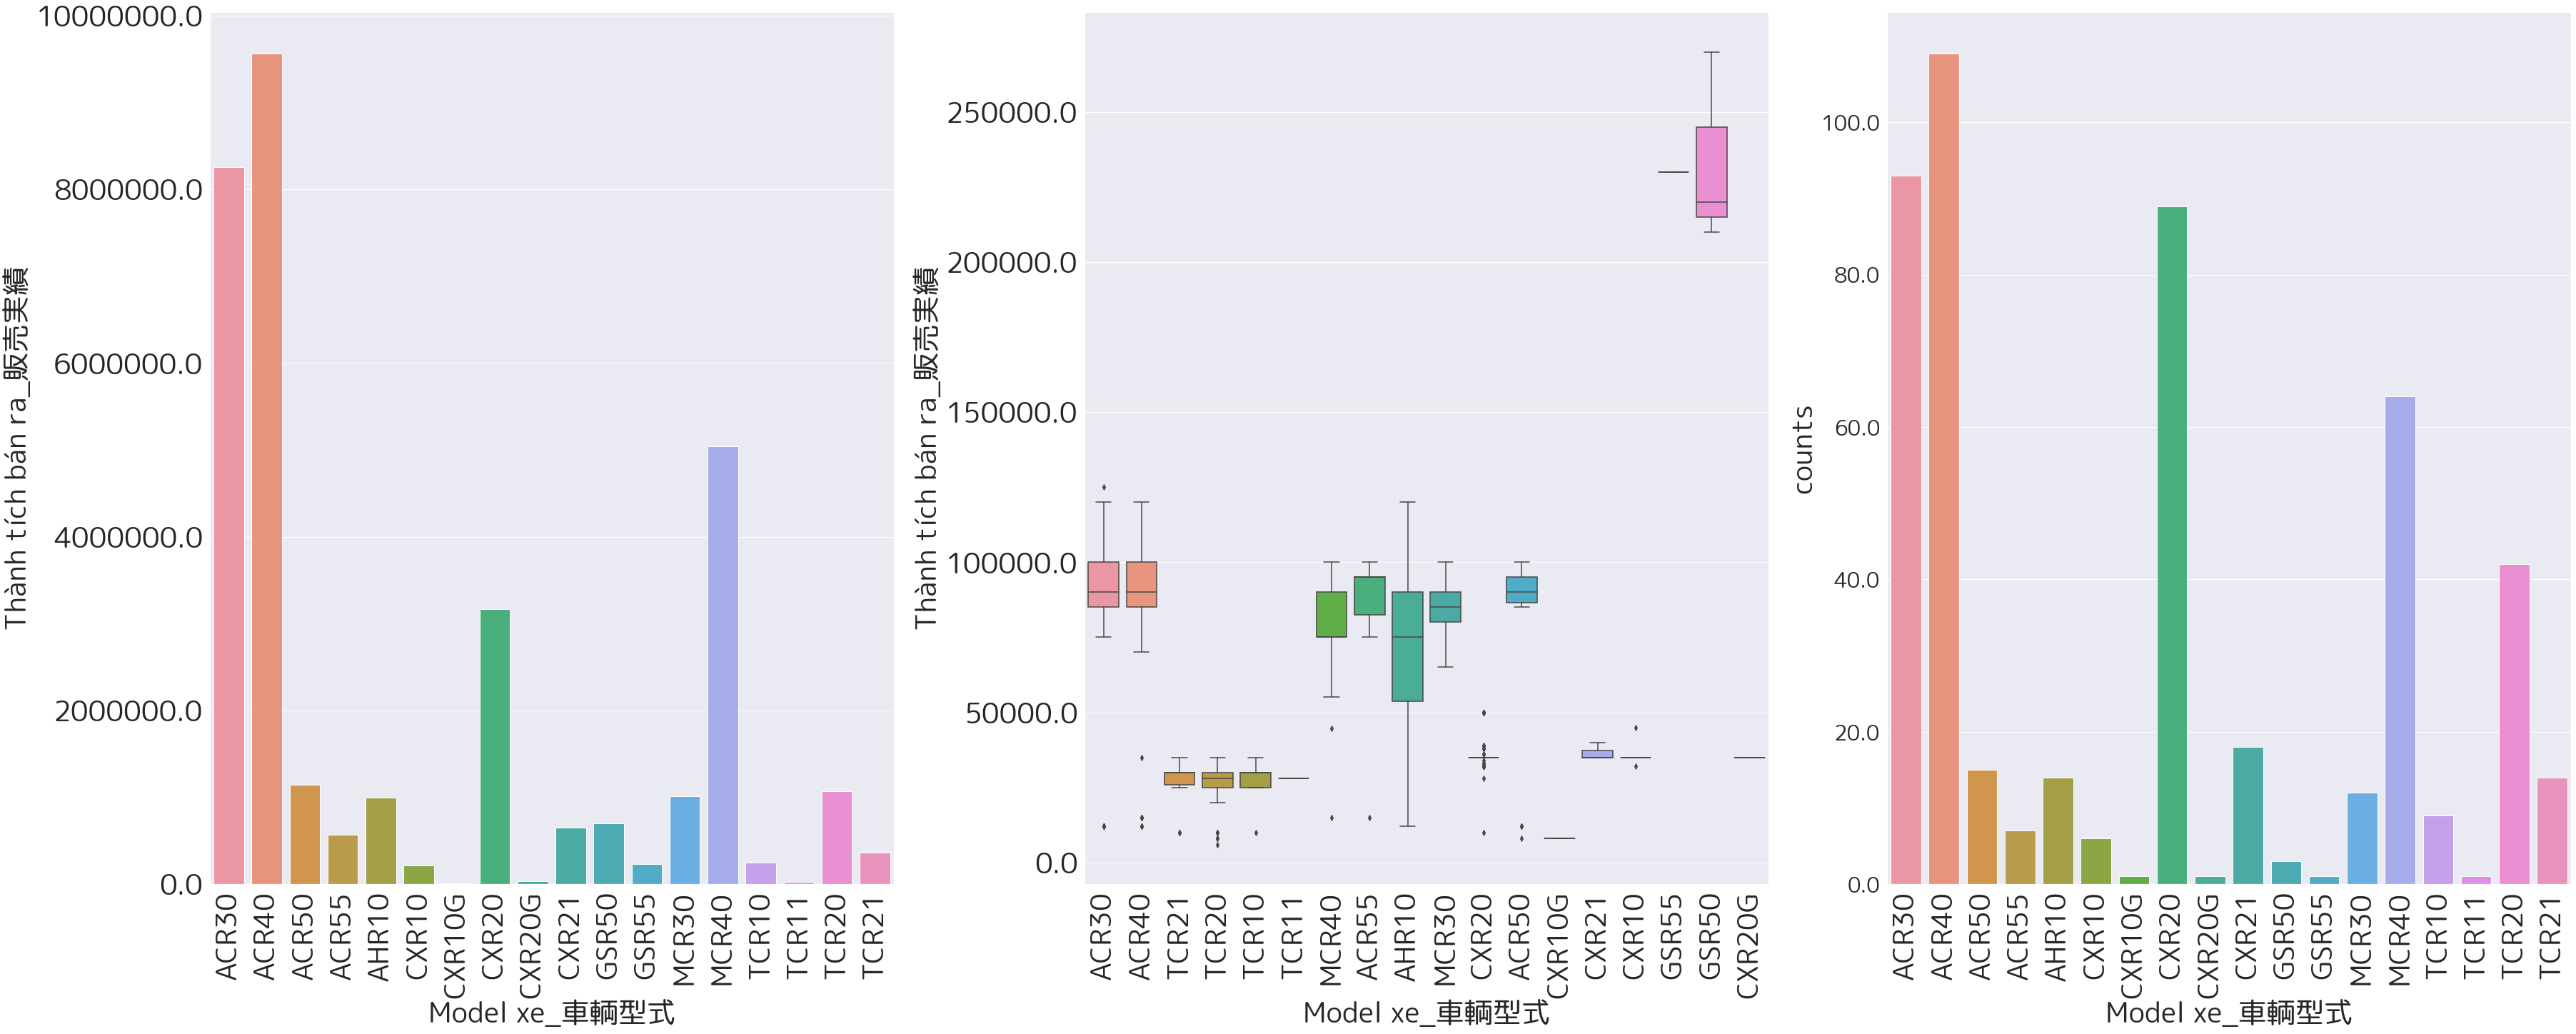

In [397]:
count_model = df_ｴｽﾃｨﾏ.groupby(['Model xe_車輌型式'])['Model xe_車輌型式'].count().reset_index(name='counts')
sum_model = df_ｴｽﾃｨﾏ.groupby(['Model xe_車輌型式'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
fig, axs = plt.subplots(1, 3, sharex=False, figsize=(50, 20),constrained_layout=True)
p = sns.barplot(x='Model xe_車輌型式',y='sum',data=sum_model,ax=axs[0],ci=None)
q = sns.boxplot(x='Model xe_車輌型式',y='Thành tích bán ra_販売実績',data=df_ｴｽﾃｨﾏ,ax=axs[1])
r = sns.barplot(x='Model xe_車輌型式',y='counts',data=count_model,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =40,rotation=90)
q.set_xticklabels(q.get_xticklabels(),size =40,rotation=90)
r.set_xticklabels(r.get_xticklabels(),size =40,rotation=90)
p.set_yticklabels(p.get_yticks(), size = 40)
q.set_yticklabels(q.get_yticks(), size = 40)
r.set_yticklabels(r.get_yticks(),size =30)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 40)
r.set_ylabel("counts",fontsize = 40)
p.set_xlabel("Model xe_車輌型式",fontsize = 40)
q.set_xlabel("Model xe_車輌型式",fontsize = 40)
r.set_xlabel("Model xe_車輌型式",fontsize = 40)

# Model xe = ACR40

In [679]:
df_ｴｽﾃｨﾏ_ACR40 = df_ｴｽﾃｨﾏ[ df_ｴｽﾃｨﾏ ['Model xe_車輌型式'] == 'ACR40']
for col in df_ｴｽﾃｨﾏ_ACR40.columns:
    print(str(col) + ": "+str(df_ｴｽﾃｨﾏ_ACR40[col].unique()))

Tên xe_車名: ['ｴｽﾃｨﾏ']
Model xe_車輌型式: ['ACR40']
Engine model_エンジン型式: ['2AZ-FE']
Truyền động 1_駆動1: ['FF']
Truyền động 2_駆動2: ['4WD' '2WD']
TM_TM: ['AT']
Năm sản xuất_年式: [2000 2002 2005 2003 2001 2004    0]
D/G_Ｄ／Ｇ: ['G']
Thành tích bán ra_販売実績: [100000.  90000.  12000.  85000.  80000.  70000.  15000.  75000.  35000.
  95000. 120000.]


In [680]:
sum_dt  = df_ｴｽﾃｨﾏ_ACR40['Thành tích bán ra_販売実績'].sum()
sum_dt

9561000.0

In [681]:
df_ｴｽﾃｨﾏ_ACR40 = df_ｴｽﾃｨﾏ_ACR40.groupby(['Engine model_エンジン型式','Truyền động 1_駆動1','Truyền động 2_駆動2','TM_TM','Năm sản xuất_年式']).agg(revenue = ('Thành tích bán ra_販売実績', 'sum'),count = ('TM_TM','count'))
df_ｴｽﾃｨﾏ_ACR40

revenue  \
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式              
2AZ-FE              FF                2WD               AT    2003               95000.0   
                                      4WD               AT    0                 100000.0   
                                                              2000             1827000.0   
                                                              2001             3217000.0   
                                                              2002             2185000.0   
                                                              2003             1190000.0   
                                                              2004              482000.0   
                                                              2005              465000.0   

                                                                               count  
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式         
2AZ-FE              FF                2WD               AT    2003                 1  
                                      4WD               AT    0                    1  
                                                              2000                21  
                                                              2001                35  
                                                              2002                25  
                                                              2003                13  
                                                              2004                 8  
                                                              2005                 5

In [682]:
# df_ｴｽﾃｨﾏ_ACR40_td2_nsx = df_ｴｽﾃｨﾏ_ACR40.groupby(['Truyền động 2_駆動2','Năm sản xuất_年式']).agg(revenue = ('Thành tích bán ra_販売実績', 'sum')).sort_values(by='revenue', ascending=True)
df_ｴｽﾃｨﾏ_ACR40_td2_nsx = df_ｴｽﾃｨﾏ_ACR40.groupby(['Truyền động 2_駆動2','Năm sản xuất_年式'])['revenue'].sum().reset_index(name='revenue')
df_ｴｽﾃｨﾏ_ACR40_td2_nsx['percent_value']  = round(df_ｴｽﾃｨﾏ_ACR40_td2_nsx['revenue']/sum_dt*100,2)
df_ｴｽﾃｨﾏ_ACR40_td2_nsx

,Truyền động 2_駆動2,Năm sản xuất_年式,revenue,percent_value
0,2WD,2003,95000.0,0.99
1,4WD,0,100000.0,1.05
2,4WD,2000,1827000.0,19.11
3,4WD,2001,3217000.0,33.65
4,4WD,2002,2185000.0,22.85
5,4WD,2003,1190000.0,12.45
6,4WD,2004,482000.0,5.04
7,4WD,2005,465000.0,4.86


<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

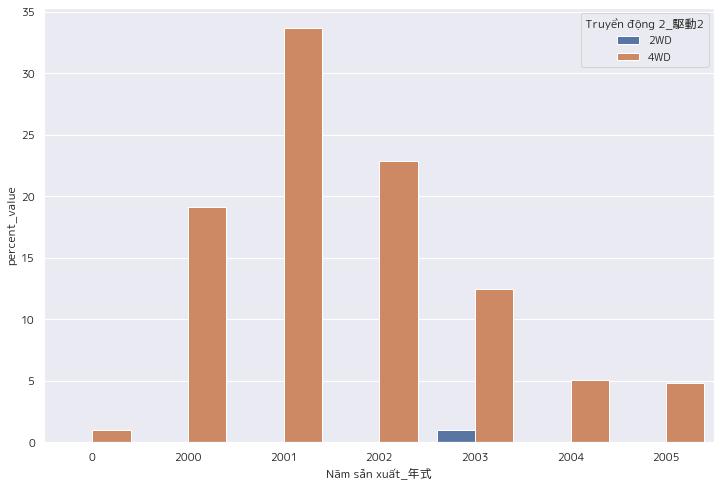

In [684]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',hue = 'Truyền động 2_駆動2',data=df_ｴｽﾃｨﾏ_ACR40_td2_nsx)

# Model xe = ACR30

In [403]:
df_ｴｽﾃｨﾏ_ACR30 = df_ｴｽﾃｨﾏ[ df_ｴｽﾃｨﾏ ['Model xe_車輌型式'] == 'ACR30']
for col in df_ｴｽﾃｨﾏ_ACR30.columns:
    print(str(col) + ": "+str(df_ｴｽﾃｨﾏ_ACR30[col].unique()))

Tên xe_車名: ['ｴｽﾃｨﾏ']
Model xe_車輌型式: ['ACR30']
Engine model_エンジン型式: ['2AZ-FE']
Truyền động 1_駆動1: ['FF']
Truyền động 2_駆動2: ['2WD']
TM_TM: ['AT']
Năm sản xuất_年式: [2003 2000 2002 2001 2004 2005]
D/G_Ｄ／Ｇ: ['G']
Thành tích bán ra_販売実績: [110000. 100000. 125000. 120000.  12000.  85000.  90000.  80000.  75000.
  88000. 105000.  95000.]


In [404]:
df_ｴｽﾃｨﾏ_ACR30 = df_ｴｽﾃｨﾏ_ACR30.groupby(['Engine model_エンジン型式','Truyền động 1_駆動1','Truyền động 2_駆動2','TM_TM','Năm sản xuất_年式']).agg(revenue = ('Thành tích bán ra_販売実績', 'sum'),count = ('TM_TM','count'))
df_ｴｽﾃｨﾏ_ACR30

revenue  \
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式              
2AZ-FE              FF                2WD               AT    2000             1928000.0   
                                                              2001             2057000.0   
                                                              2002             1951000.0   
                                                              2003             1372000.0   
                                                              2004              682000.0   
                                                              2005              265000.0   

                                                                               count  
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式         
2AZ-FE              FF                2WD               AT    2000                20  
                                                              2001                24  
                                                              2002                23  
                                                              2003                15  
                                                              2004                 8  
                                                              2005                 3

In [405]:
sum_dt  = df_ｴｽﾃｨﾏ_ACR30['revenue'].sum()
sum_dt

8255000.0

In [406]:
df_ｴｽﾃｨﾏ_ACR30_nsx = df_ｴｽﾃｨﾏ_ACR30.groupby(['Năm sản xuất_年式'])['revenue'].sum().reset_index(name='revenue')
df_ｴｽﾃｨﾏ_ACR30_nsx['percent_value']  = round(df_ｴｽﾃｨﾏ_ACR30_nsx['revenue']/sum_dt*100,2)
df_ｴｽﾃｨﾏ_ACR30_nsx

,Năm sản xuất_年式,revenue,percent_value
0,2000,1928000.0,23.36
1,2001,2057000.0,24.92
2,2002,1951000.0,23.63
3,2003,1372000.0,16.62
4,2004,682000.0,8.26
5,2005,265000.0,3.21


<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='revenue'>

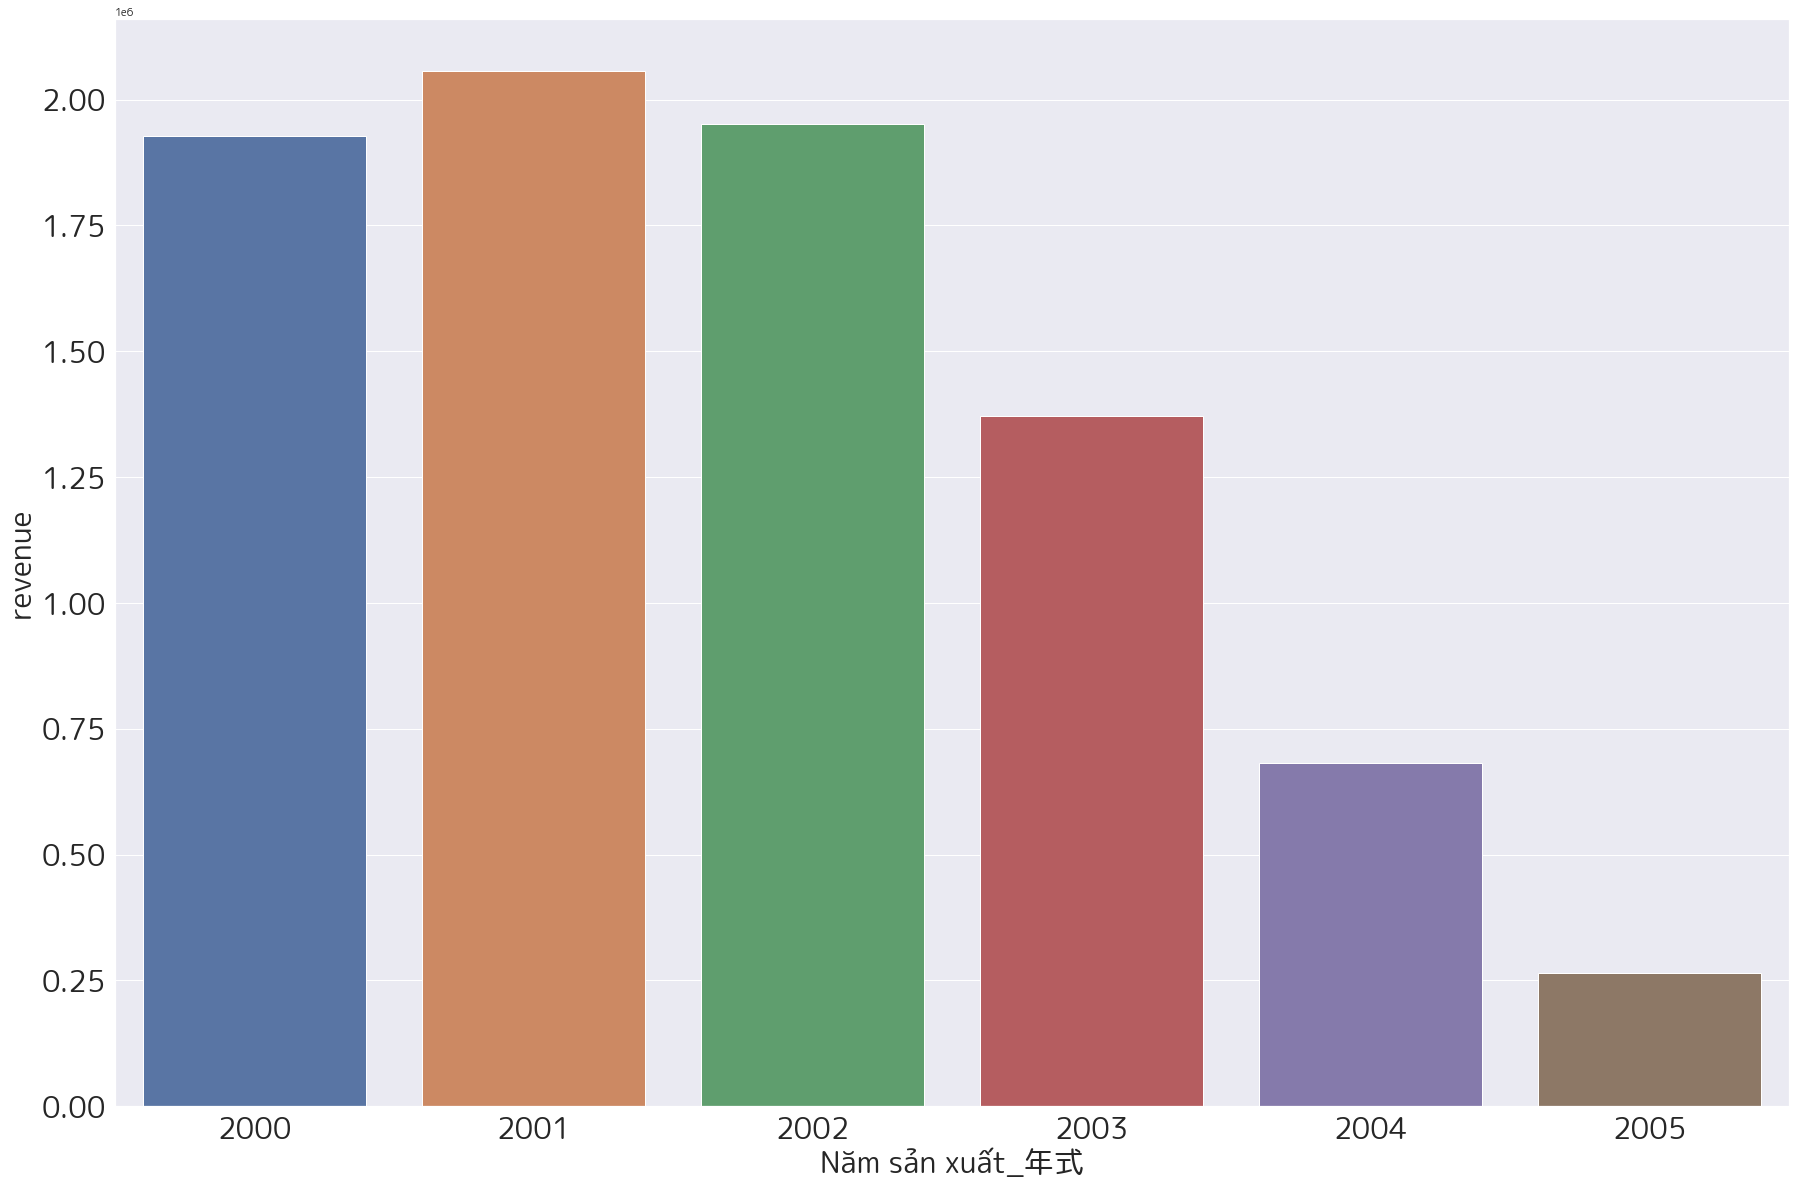

In [407]:
plt.figure(figsize=(30,20))
plt.xticks(fontsize = 30)
plt.xlabel(xlabel = 'Năm sản xuất_年式',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Thành tích bán ra_販売実績',fontsize = 30)
sns.barplot(y='revenue',x='Năm sản xuất_年式',data=df_ｴｽﾃｨﾏ_ACR30_nsx,ci=None)
# plt.legend(title='Năm sản xuất_年式', fontsize='25', title_fontsize='25',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Model xe = MCR40

In [408]:
df_ｴｽﾃｨﾏ_MCR40 = df_ｴｽﾃｨﾏ[ df_ｴｽﾃｨﾏ ['Model xe_車輌型式'] == 'MCR40']
for col in df_ｴｽﾃｨﾏ_MCR40.columns:
    print(str(col) + ": "+str(df_ｴｽﾃｨﾏ_MCR40[col].unique()))

Tên xe_車名: ['ｴｽﾃｨﾏ']
Model xe_車輌型式: ['MCR40']
Engine model_エンジン型式: ['1MZ-FE']
Truyền động 1_駆動1: ['FF']
Truyền động 2_駆動2: ['4WD']
TM_TM: ['AT']
Năm sản xuất_年式: [2000 2002 2003 2001 2005    0    2 2004]
D/G_Ｄ／Ｇ: ['G']
Thành tích bán ra_販売実績: [100000.  85000.  80000.  90000.  75000.  15000.  55000.  65000.  95000.
  70000.  44759.]


In [409]:
df_ｴｽﾃｨﾏ_MCR40 = df_ｴｽﾃｨﾏ_MCR40.groupby(['Engine model_エンジン型式','Truyền động 1_駆動1','Truyền động 2_駆動2','TM_TM','Năm sản xuất_年式']).agg(revenue = ('Thành tích bán ra_販売実績', 'sum'),count = ('TM_TM','count'))
df_ｴｽﾃｨﾏ_MCR40

revenue  \
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式              
1MZ-FE              FF                4WD               AT    0                  75000.0   
                                                              2                  75000.0   
                                                              2000             1590000.0   
                                                              2001             1704759.0   
                                                              2002              550000.0   
                                                              2003              735000.0   
                                                              2004              210000.0   
                                                              2005              100000.0   

                                                                               count  
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式         
1MZ-FE              FF                4WD               AT    0                    1  
                                                              2                    1  
                                                              2000                20  
                                                              2001                22  
                                                              2002                 7  
                                                              2003                 9  
                                                              2004                 3  
                                                              2005                 1

In [410]:
sum_dt  = df_ｴｽﾃｨﾏ_MCR40['revenue'].sum()
sum_dt

5039759.0

In [411]:
df_ｴｽﾃｨﾏ_MCR40_nsx = df_ｴｽﾃｨﾏ_MCR40.groupby(['Năm sản xuất_年式'])['revenue'].sum().reset_index(name='revenue')
df_ｴｽﾃｨﾏ_MCR40_nsx['percent_value']  = round(df_ｴｽﾃｨﾏ_MCR40_nsx['revenue']/sum_dt*100,2)
df_ｴｽﾃｨﾏ_MCR40_nsx

,Năm sản xuất_年式,revenue,percent_value
0,0,75000.0,1.49
1,2,75000.0,1.49
2,2000,1590000.0,31.55
3,2001,1704759.0,33.83
4,2002,550000.0,10.91
5,2003,735000.0,14.58
6,2004,210000.0,4.17
7,2005,100000.0,1.98


<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='revenue'>

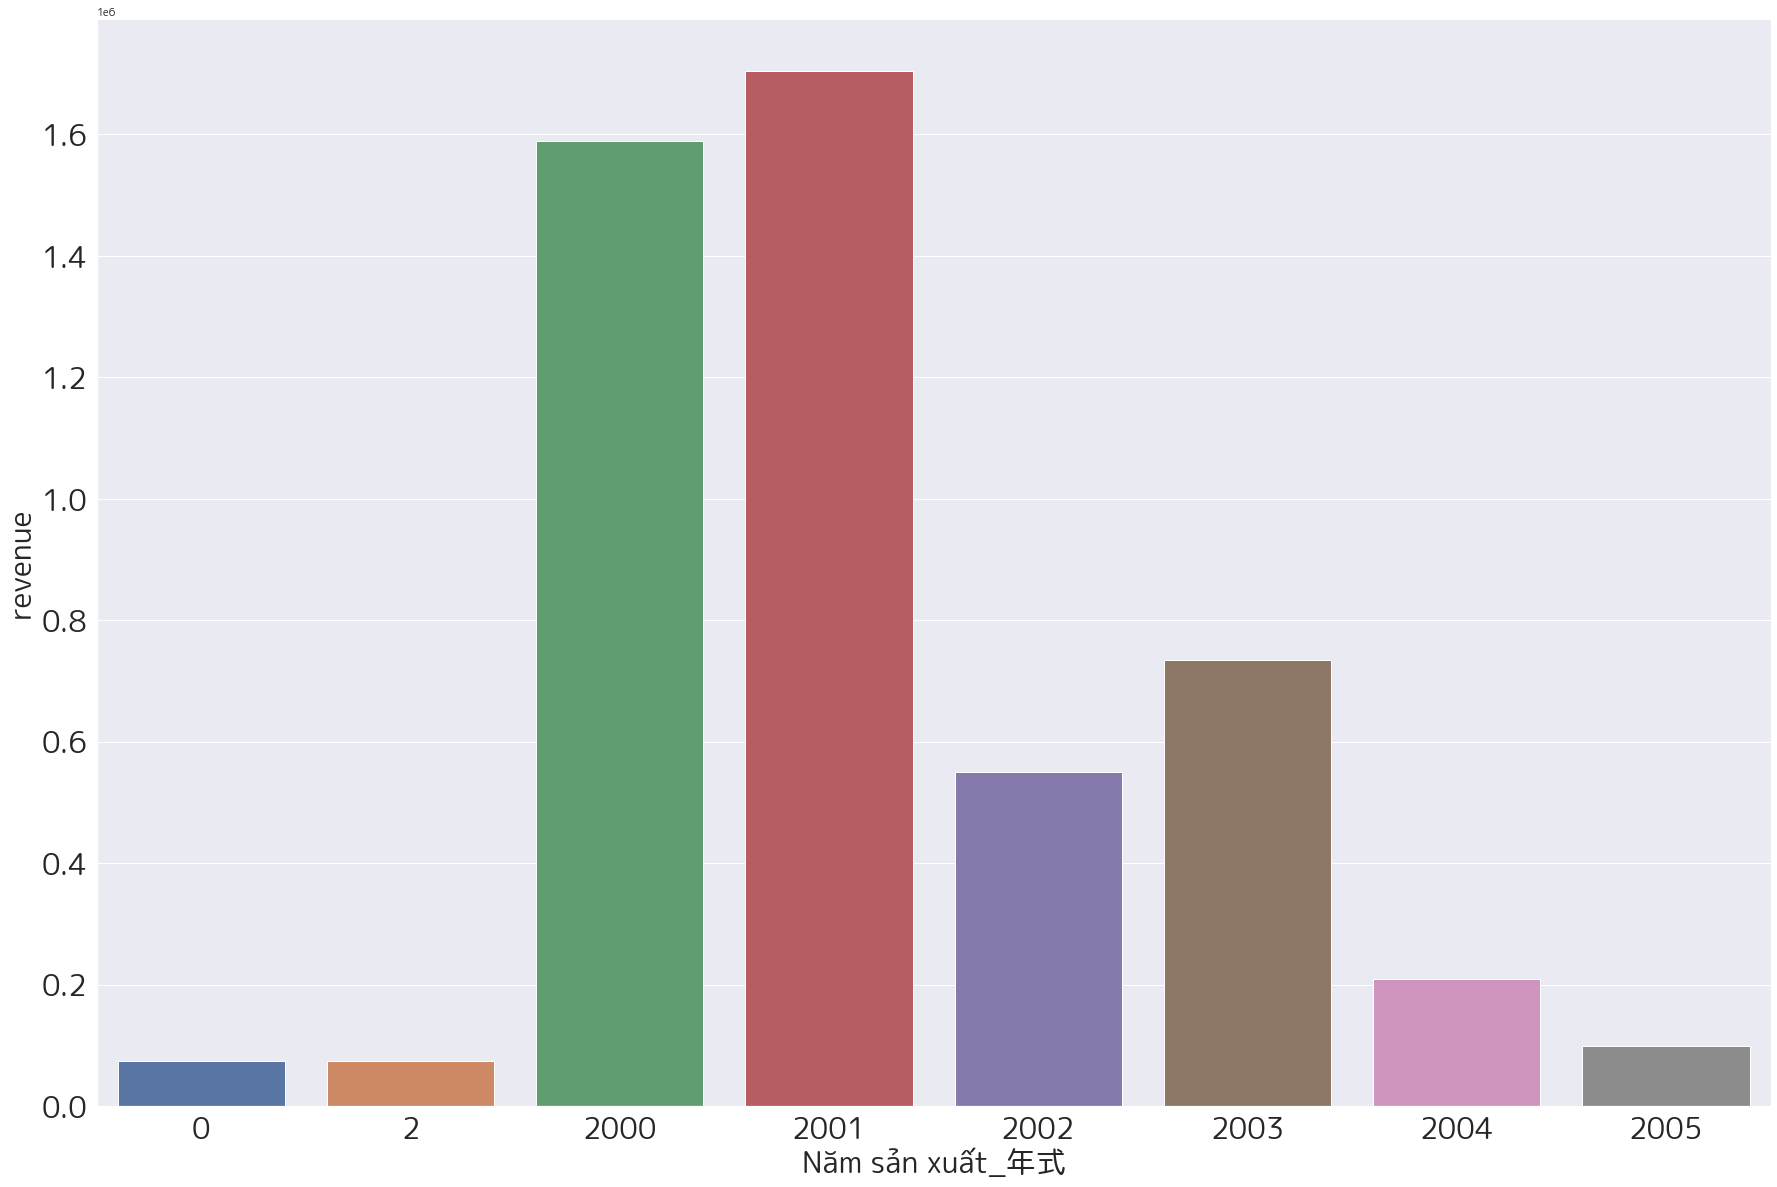

In [412]:
plt.figure(figsize=(30,20))
plt.xticks(fontsize = 30)
plt.xlabel(xlabel = 'Năm sản xuất_年式',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'revenue',fontsize = 30)
sns.barplot(y='revenue',x='Năm sản xuất_年式',data=df_ｴｽﾃｨﾏ_MCR40_nsx,ci=None)
# plt.legend(title='Năm sản xuất_年式', fontsize='25', title_fontsize='25',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Model xe = CXR20

In [413]:
df_ｴｽﾃｨﾏ_CXR20 = df_ｴｽﾃｨﾏ[ df_ｴｽﾃｨﾏ ['Model xe_車輌型式'] == 'CXR20']
for col in df_ｴｽﾃｨﾏ_CXR20.columns:
    print(str(col) + ": "+str(df_ｴｽﾃｨﾏ_CXR20[col].unique()))

Tên xe_車名: ['ｴｽﾃｨﾏ']
Model xe_車輌型式: ['CXR20']
Engine model_エンジン型式: ['3C-TE' '3C-T']
Truyền động 1_駆動1: ['FR']
Truyền động 2_駆動2: ['4WD' '2WD']
TM_TM: ['AT' 'MT']
Năm sản xuất_年式: [1996 1997 1994 1992 1998 1995 1993    0 1999]
D/G_Ｄ／Ｇ: ['D']
Thành tích bán ra_販売実績: [50000. 35000. 39000. 36000. 38000. 32000. 10000. 28000. 33000. 34000.]


In [414]:
sum_dt  = df_ｴｽﾃｨﾏ_CXR20['Thành tích bán ra_販売実績'].sum()
sum_dt

3169000.0

In [415]:
df_ｴｽﾃｨﾏ_CXR20_em_td2_nsx = df_ｴｽﾃｨﾏ_CXR20.groupby(['Engine model_エンジン型式','Truyền động 1_駆動1','Truyền động 2_駆動2','TM_TM','Năm sản xuất_年式']).agg(revenue = ('Thành tích bán ra_販売実績', 'sum'),count = ('TM_TM','count'))
df_ｴｽﾃｨﾏ_CXR20_em_td2_nsx

revenue  \
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式             
3C-T                FR                4WD               AT    0                 35000.0   
                                                              1992             155000.0   
                                                              1993             130000.0   
                                                              1995              35000.0   
                                                        MT    1992              35000.0   
                                                              1993              70000.0   
3C-TE               FR                2WD               AT    1995              32000.0   
                                      4WD               AT    1993             132000.0   
                                                              1994             482000.0   
                                                              1995             756000.0   
                                                              1996             759000.0   
                                                              1997             373000.0   
                                                              1998              70000.0   
                                                              1999              35000.0   
                                                        MT    1994              70000.0   

                                                                               count  
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式         
3C-T                FR                4WD               AT    0                    1  
                                                              1992                 4  
                                                              1993                 4  
                                                              1995                 1  
                                                        MT    1992                 1  
                                                              1993                 2  
3C-TE               FR                2WD               AT    1995                 1  
                                      4WD               AT    1993                 4  
                                                              1994                13  
                                                              1995                22  
                                                              1996                21  
                                                              1997                10  
                                                              1998                 2  
                                                              1999                 1  
                                                        MT    1994                 2

In [416]:
df_dt_em = df_ｴｽﾃｨﾏ_CXR20.groupby('Engine model_エンジン型式')['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
df_dt_em['percent_value']  = round(df_dt_em['sum']/sum_dt*100,2)
df_dt_em

,Engine model_エンジン型式,sum,percent_value
0,3C-T,460000.0,14.52
1,3C-TE,2709000.0,85.48


<AxesSubplot:xlabel='Engine model_エンジン型式', ylabel='percent_value'>

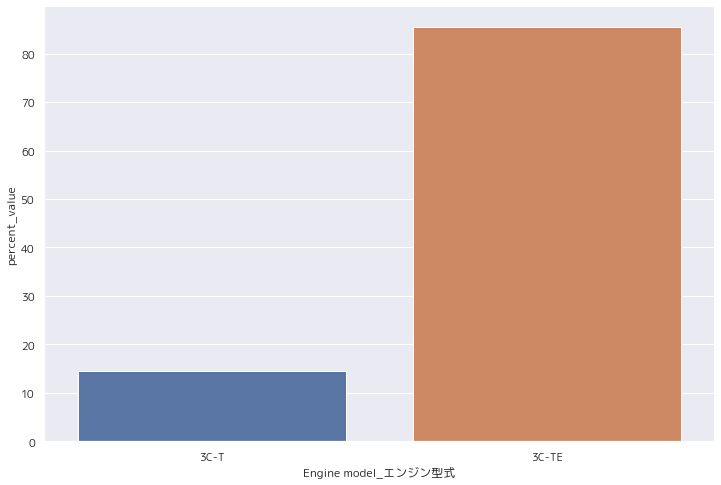

In [417]:
plt.figure(figsize=(12,8))
sns.barplot(x='Engine model_エンジン型式',y='percent_value',data=df_dt_em)

In [418]:
df_dt_em_td = df_ｴｽﾃｨﾏ_CXR20_em_td2_nsx.loc[('3C-T')]
df_tm = df_dt_em_td.groupby(['TM_TM'])['revenue'].sum().reset_index(name='sum')
df_tm['percent_value'] = round(df_tm['sum'] / df_dt_em_td['revenue'].sum()*100,2)
df_tm

,TM_TM,sum,percent_value
0,AT,355000.0,77.17
1,MT,105000.0,22.83


In [419]:
df_dt_em_td['percent_value'] = round(df_dt_em_td['revenue'] / df_dt_em_td['revenue'].sum()*100,2)
df_dt_em_td

<ipython-input-419-8b5a022a1b5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dt_em_td['percent_value'] = round(df_dt_em_td['revenue'] / df_dt_em_td['revenue'].sum()*100,2)


revenue  count  \
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                    
FR                4WD               AT    0                 35000.0      1   
                                          1992             155000.0      4   
                                          1993             130000.0      4   
                                          1995              35000.0      1   
                                    MT    1992              35000.0      1   
                                          1993              70000.0      2   

                                                           percent_value  
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                 
FR                4WD               AT    0                         7.61  
                                          1992                     33.70  
                                          1993                     28.26  
                                          1995                      7.61  
                                    MT    1992                      7.61  
                                          1993                     15.22

<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

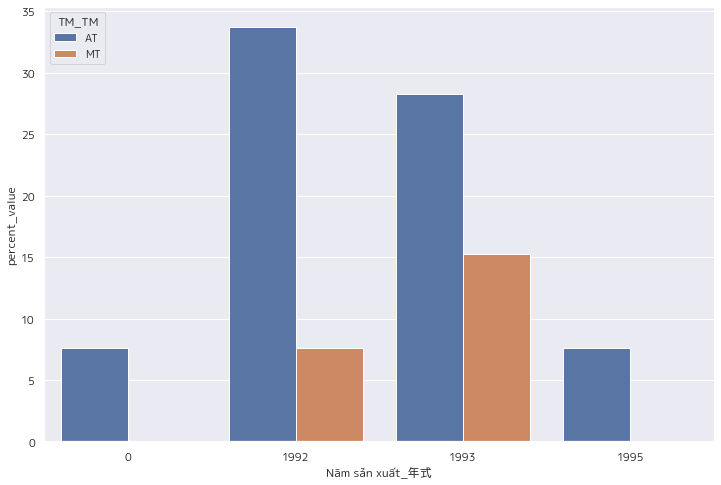

In [420]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',hue = 'TM_TM',data=df_dt_em_td.reset_index(),ci=None)

# Engine model 3C-TE

In [421]:
df_dt_em_td = df_ｴｽﾃｨﾏ_CXR20_em_td2_nsx.loc[('3C-TE')]
df_tm = df_dt_em_td.groupby(['TM_TM'])['revenue'].sum().reset_index(name='sum')
df_tm['percent_value'] = round(df_tm['sum'] / df_dt_em_td['revenue'].sum()*100,2)
df_tm

,TM_TM,sum,percent_value
0,AT,2639000.0,97.42
1,MT,70000.0,2.58


In [422]:
df_dt_em_td['percent_value'] = round(df_dt_em_td['revenue'] / df_dt_em_td['revenue'].sum()*100,2)
df_dt_em_td

<ipython-input-422-8b5a022a1b5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dt_em_td['percent_value'] = round(df_dt_em_td['revenue'] / df_dt_em_td['revenue'].sum()*100,2)


revenue  count  \
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                    
FR                2WD               AT    1995              32000.0      1   
                  4WD               AT    1993             132000.0      4   
                                          1994             482000.0     13   
                                          1995             756000.0     22   
                                          1996             759000.0     21   
                                          1997             373000.0     10   
                                          1998              70000.0      2   
                                          1999              35000.0      1   
                                    MT    1994              70000.0      2   

                                                           percent_value  
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                 
FR                2WD               AT    1995                      1.18  
                  4WD               AT    1993                      4.87  
                                          1994                     17.79  
                                          1995                     27.91  
                                          1996                     28.02  
                                          1997                     13.77  
                                          1998                      2.58  
                                          1999                      1.29  
                                    MT    1994                      2.58

In [423]:
df_td2 = df_dt_em_td.groupby(['Truyền động 2_駆動2'])['revenue'].sum().reset_index()
df_td2['percent_value'] = round(df_td2['revenue'] / df_td2['revenue'].sum()*100,2)
df_td2

,Truyền động 2_駆動2,revenue,percent_value
0,2WD,32000.0,1.18
1,4WD,2677000.0,98.82


<AxesSubplot:xlabel='Truyền động 2_駆動2', ylabel='percent_value'>

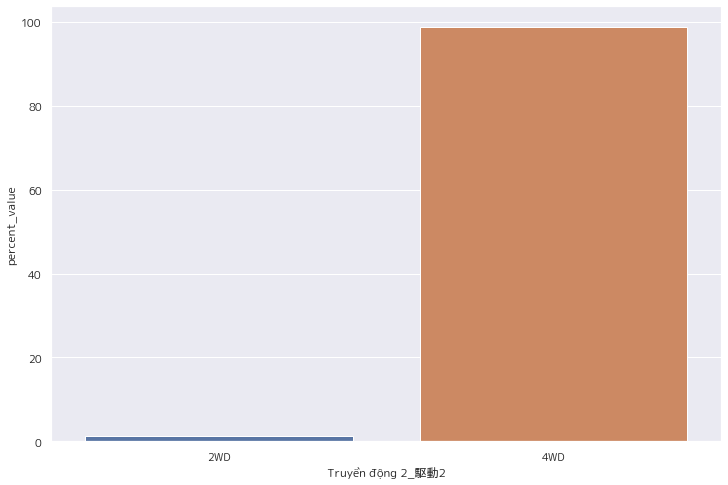

In [424]:
plt.figure(figsize=(12,8))
sns.barplot(x='Truyền động 2_駆動2',y='percent_value',data=df_td2.reset_index(),ci=None)

In [425]:
df_4wd = df_dt_em_td.loc[('FR','4WD')]
df_4wd ['percent_value'] = round(df_4wd['revenue'] / df_4wd['revenue'].sum()*100,2)
df_4wd

<ipython-input-425-4299a26c0059>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4wd ['percent_value'] = round(df_4wd['revenue'] / df_4wd['revenue'].sum()*100,2)


revenue  count  percent_value
TM_TM Năm sản xuất_年式                                
AT    1993             132000.0      4           4.93
      1994             482000.0     13          18.01
      1995             756000.0     22          28.24
      1996             759000.0     21          28.35
      1997             373000.0     10          13.93
      1998              70000.0      2           2.61
      1999              35000.0      1           1.31
MT    1994              70000.0      2           2.61

<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

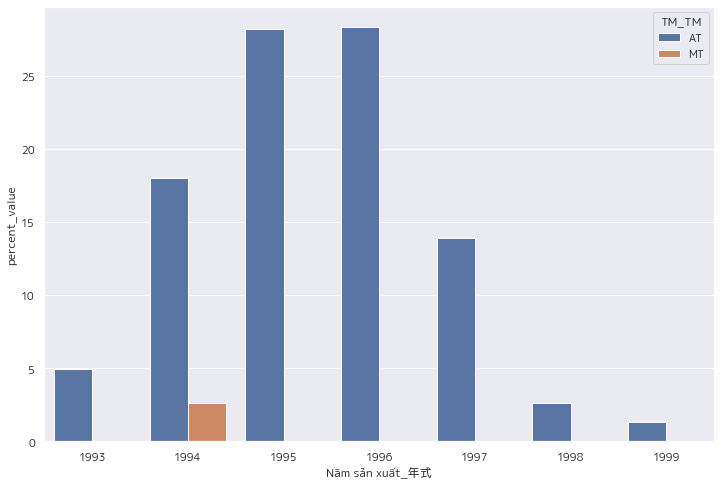

In [426]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',hue = 'TM_TM',data=df_4wd.reset_index(),ci=None)

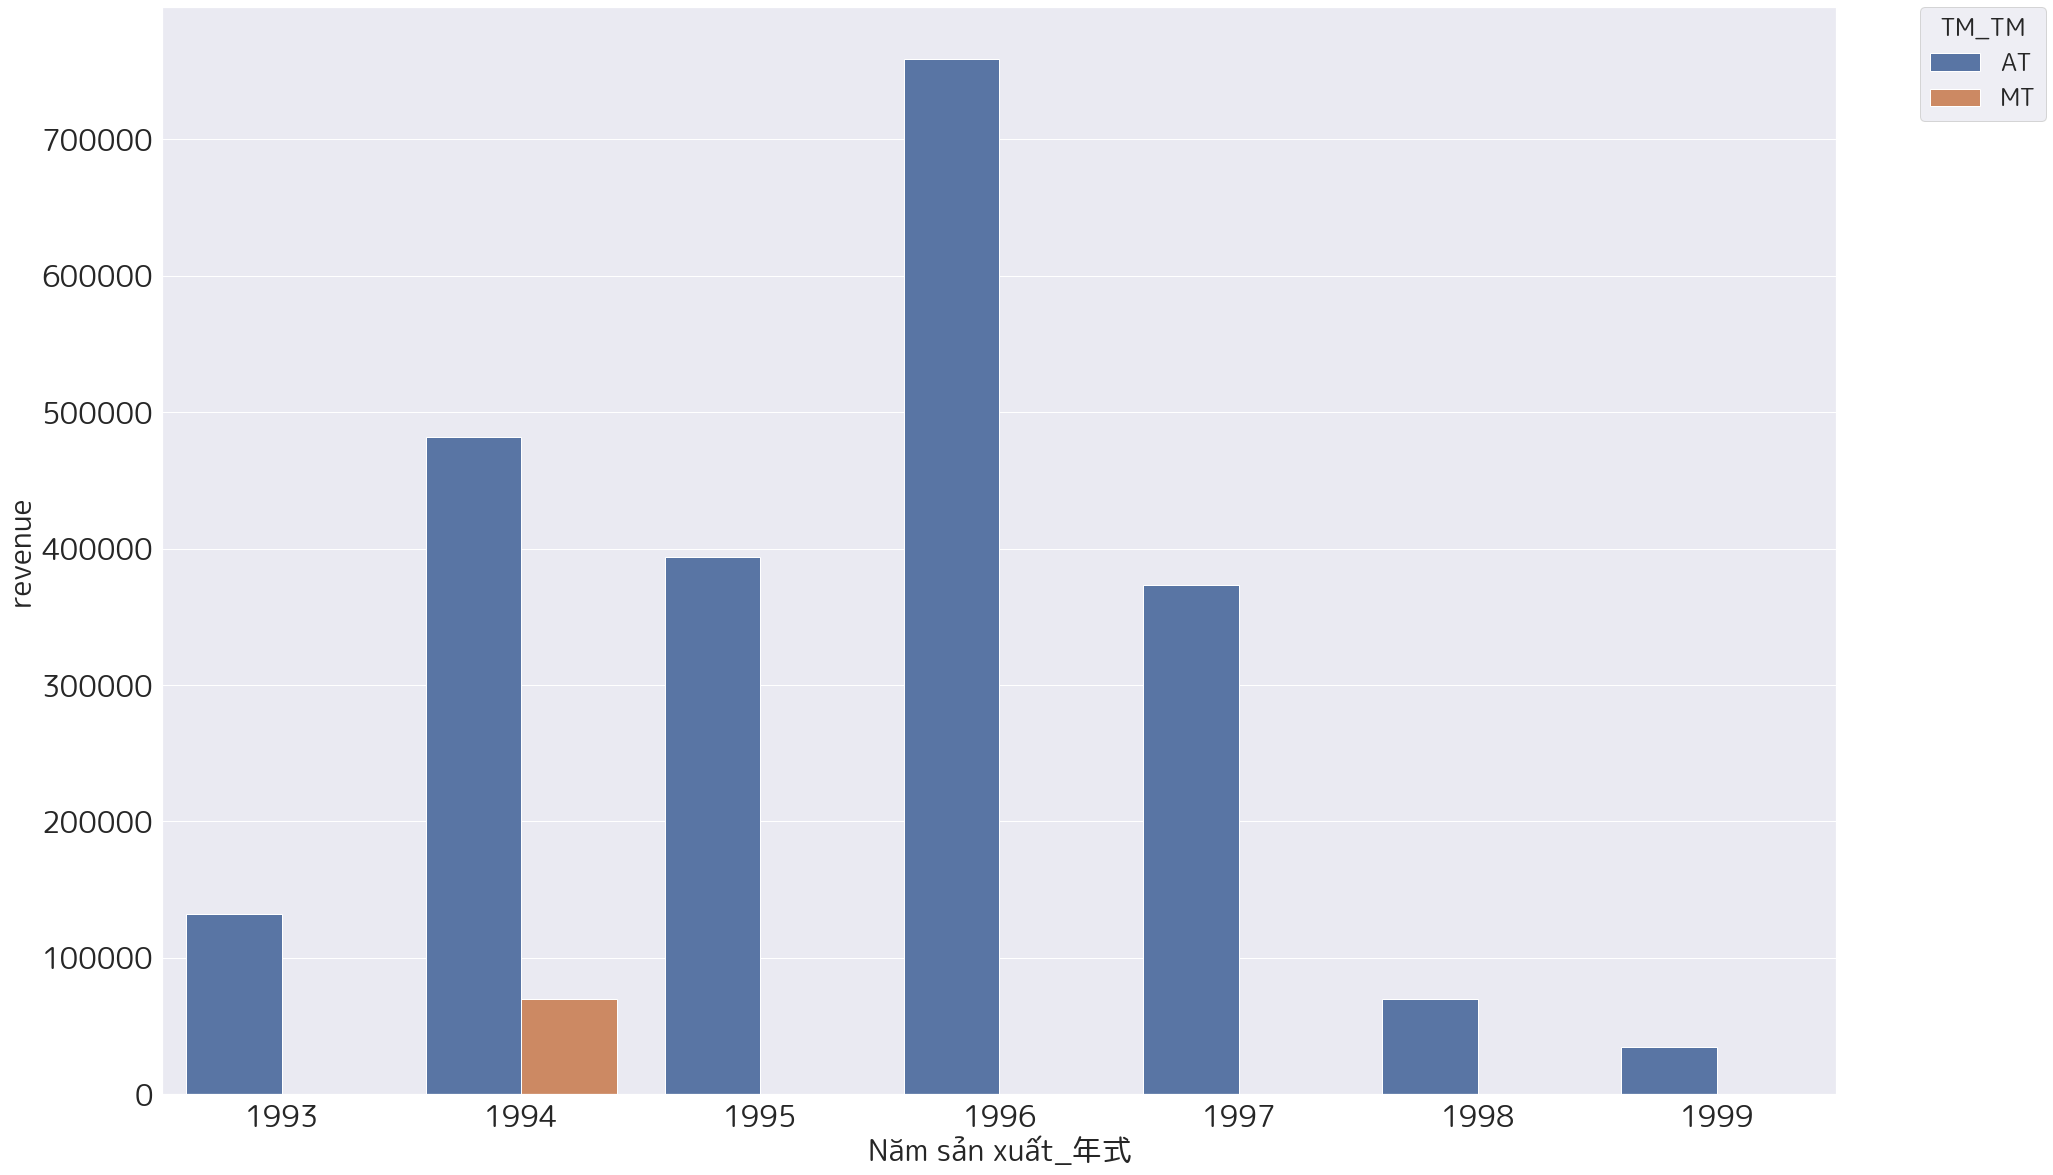

In [427]:
plt.figure(figsize=(30,20))
plt.xticks(fontsize = 30)
plt.xlabel(xlabel = 'Năm sản xuất_年式',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'revenue',fontsize = 30)
sns.barplot(y='revenue',x='Năm sản xuất_年式',data=df_dt_em_td.reset_index(), hue = 'TM_TM',ci=None)
plt.legend(title='TM_TM', fontsize='25', title_fontsize='25',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Tên  xe  = レガシィ	

In [428]:
df_レガシィ = df_spec[df_spec['Tên xe_車名'] == 'レガシィ']
df_レガシィ.nunique()

Tên xe_車名                  1
Model xe_車輌型式             26
Engine model_エンジン型式        8
Truyền động 1_駆動1          3
Truyền động 2_駆動2          4
TM_TM                      4
Năm sản xuất_年式           22
D/G_Ｄ／Ｇ                    1
Thành tích bán ra_販売実績    34
dtype: int64

In [429]:
for col in df_レガシィ.columns:
    print(str(col) + ": "+str(df_レガシィ[col].unique()))

Tên xe_車名: ['レガシィ']
Model xe_車輌型式: ['BH9' 'BG5' 'BP5' 'BP9' 'BH5' 'BL5' 'BG3' 'BEE' 'BPE' 'BHE' 'BE5' 'BLE'
 'BG9' 'BL9' 'BD9' 'BE9' 'BG7' 'BD3' 'BD5' 'BM9' 'BR9' 'BF5' 'BC3' 'BD2'
 'BC5' 'BHC']
Engine model_エンジン型式: ['EJ25' 'EJ20' 'EJ20-T' 'EJ20-TT' 'EJ18' 'EZ30' 'EJ22' 'EJ25-T']
Truyền động 1_駆動1: ['FF' 'W/O' 'FR']
Truyền động 2_駆動2: ['4WD' 'W/O' 0 '2WD']
TM_TM: ['AT' 'MT' 'W/O' 0]
Năm sản xuất_年式: [1999 1997 2003 2005 2004 1998 2001 2009 2002 2000 1996 2008 2007 2006
 1994    0 1995 2011 1992 1993 2010 2012]
D/G_Ｄ／Ｇ: ['G']
Thành tích bán ra_販売実績: [ 35000.  30000.  10000.  45000.  25000.  27778.  40000.  50000.  28000.
  12000.  33000.  55000.  60000.  85000. 110000.   8000.  20000.  27000.
  31000.  15000. 120000.  13000.  65000. 160000. 130000. 140000.  63000.
  23000.   9000.  90000.  11350.  38000.  32000.   7000.]


In [430]:
sum_dt  = df_レガシィ['Thành tích bán ra_販売実績'].sum()
sum_dt

20895128.0

<ipython-input-431-d1021a817821>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 50)
<ipython-input-431-d1021a817821>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 50)
<ipython-input-431-d1021a817821>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticks(),size =50)


Text(0.5, 0, 'Model xe_車輌型式')

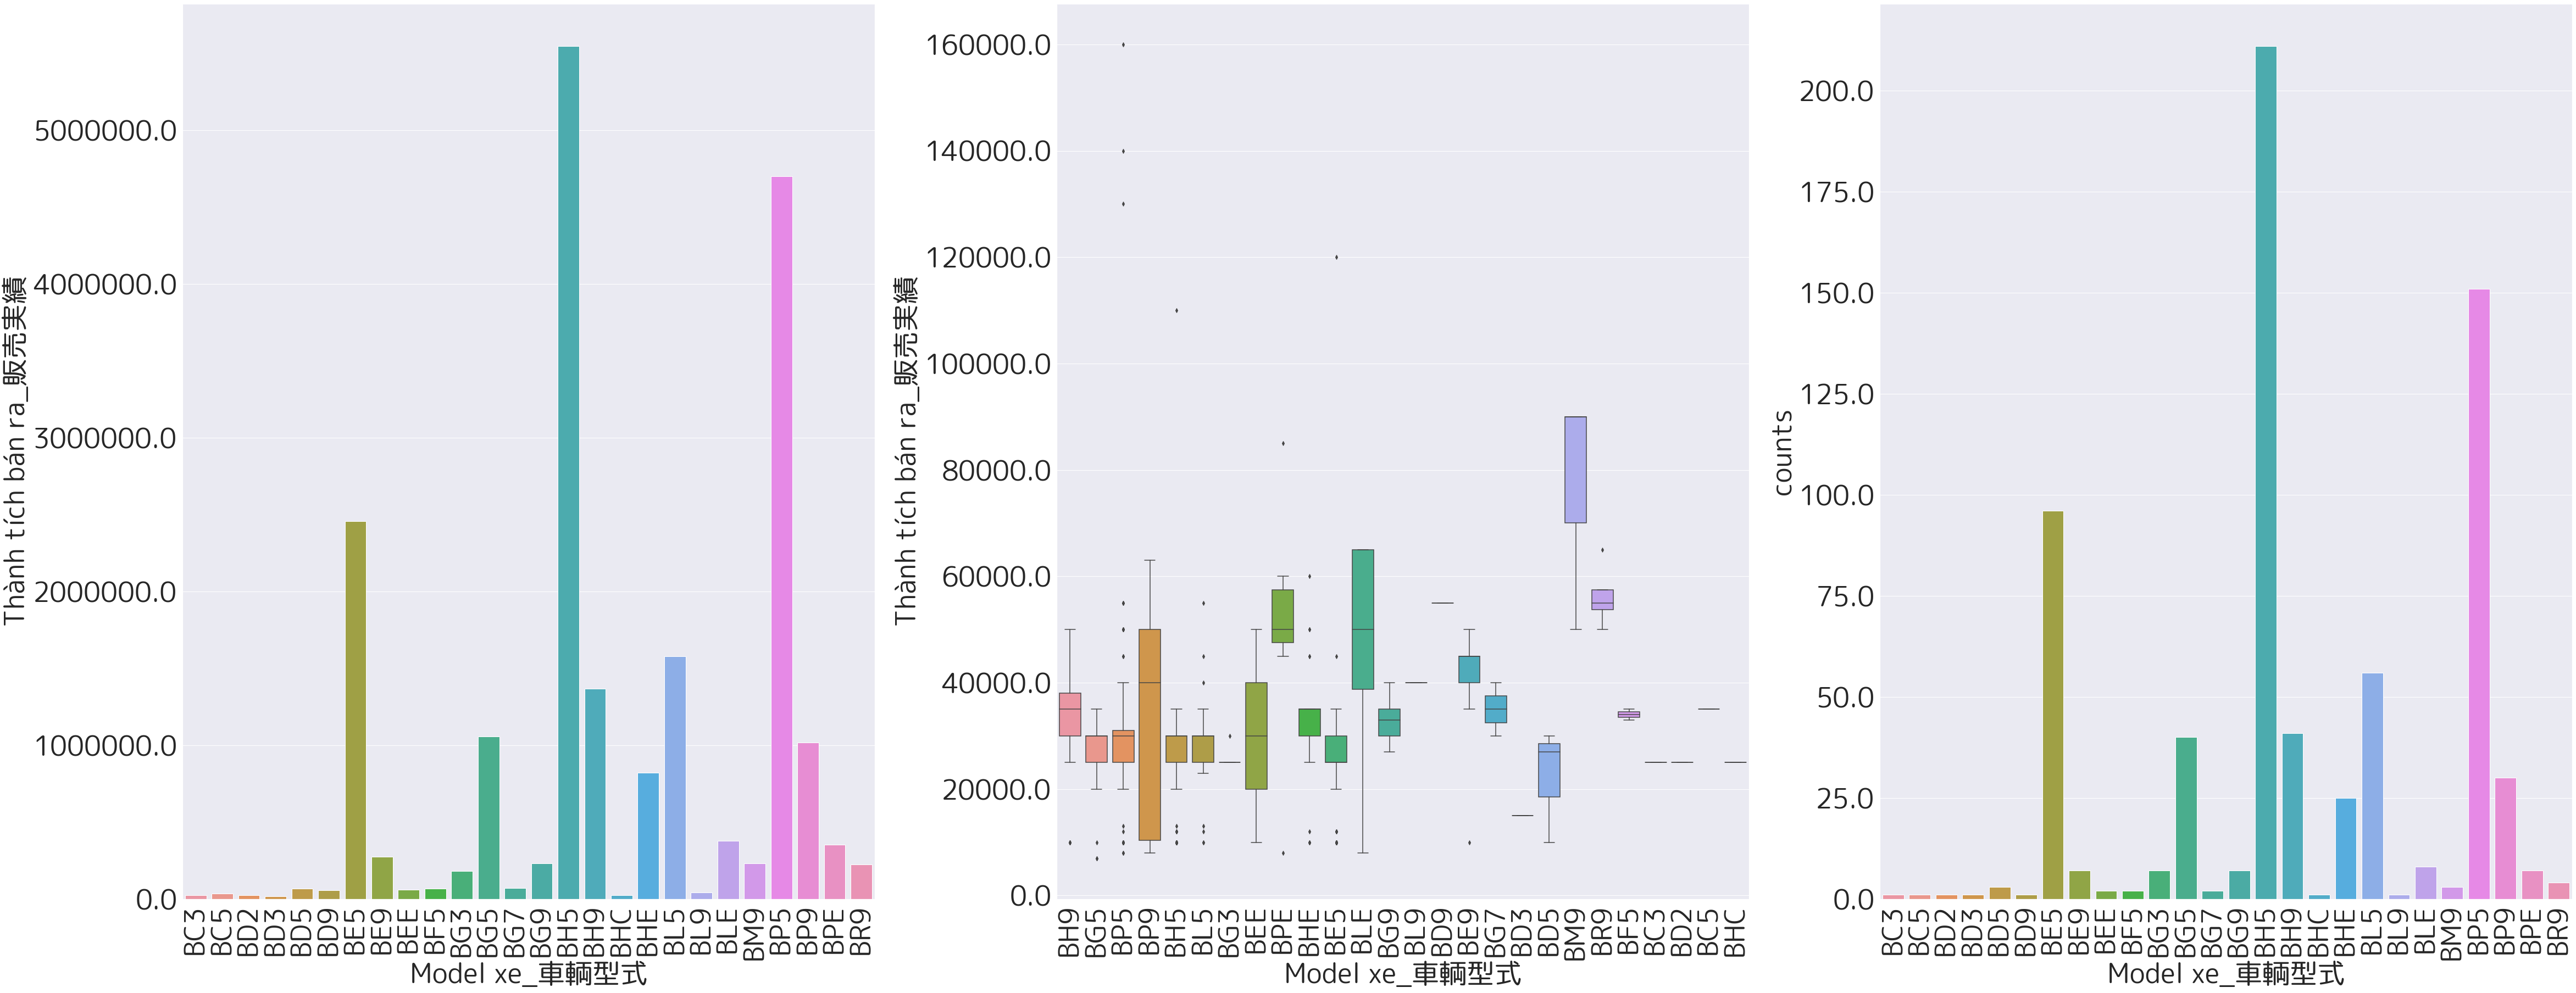

In [431]:
count_model = df_レガシィ.groupby(['Model xe_車輌型式'])['Model xe_車輌型式'].count().reset_index(name='counts')
sum_model = df_レガシィ.groupby(['Model xe_車輌型式'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
fig, axs = plt.subplots(1, 3, sharex=False, figsize=(65, 25),constrained_layout=True)
p = sns.barplot(x='Model xe_車輌型式',y='sum',data=sum_model,ax=axs[0],ci=None)
q = sns.boxplot(x='Model xe_車輌型式',y='Thành tích bán ra_販売実績',data=df_レガシィ,ax=axs[1])
r = sns.barplot(x='Model xe_車輌型式',y='counts',data=count_model,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =50,rotation=90)
q.set_xticklabels(q.get_xticklabels(),size =50,rotation=90)
r.set_xticklabels(r.get_xticklabels(),size =50,rotation=90)
p.set_yticklabels(p.get_yticks(), size = 50)
q.set_yticklabels(q.get_yticks(), size = 50)
r.set_yticklabels(r.get_yticks(),size =50)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 50)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 50)
r.set_ylabel("counts",fontsize = 50)
p.set_xlabel("Model xe_車輌型式",fontsize = 50)
q.set_xlabel("Model xe_車輌型式",fontsize = 50)
r.set_xlabel("Model xe_車輌型式",fontsize = 50)

# Model xe =  BH5

In [603]:
df_BH5 = df_レガシィ[df_レガシィ['Model xe_車輌型式'] == 'BH5']
for col in df_BH5.columns:
    print(str(col) + ": "+str(df_BH5[col].unique()))

Tên xe_車名: ['レガシィ']
Model xe_車輌型式: ['BH5']
Engine model_エンジン型式: ['EJ20' 'EJ20-TT' 'EJ20-T']
Truyền động 1_駆動1: ['FF' 'W/O' 'FR']
Truyền động 2_駆動2: ['4WD' 'W/O' 0 '2WD']
TM_TM: ['AT' 'MT' 'W/O' 0]
Năm sản xuất_年式: [1998 2001 2000 1999 2003 2002 2007    0 2004]
D/G_Ｄ／Ｇ: ['G']
Thành tích bán ra_販売実績: [ 30000.  10000.  25000.  28000. 110000.  27000.  20000.  12000.  35000.
  13000.  33000.  32000.]


In [604]:
df_group = df_BH5.groupby(['Engine model_エンジン型式','Truyền động 1_駆動1','Truyền động 2_駆動2','TM_TM','Năm sản xuất_年式']).agg(revenue = ('Thành tích bán ra_販売実績', 'sum'),count = ('Engine model_エンジン型式','count'))
df_group

revenue  \
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式             
EJ20                FF                2WD               AT    1998              30000.0   
                                                              2000              30000.0   
                                                              2001              30000.0   
                                      4WD               AT    1998             325000.0   
                                                              1999             340000.0   
                                                              2000             198000.0   
                                                              2001             601000.0   
                                                              2002             723000.0   
                                                              2003             180000.0   
                                                        MT    1998              90000.0   
                                                              1999              42000.0   
                                                              2000              25000.0   
                                                              2001              25000.0   
                                                              2002              30000.0   
                                                              2003              30000.0   
                                                              2004              30000.0   
                    FR                4WD               AT    2000              25000.0   
                                                              2007              30000.0   
                    W/O               W/O               W/O   2001              25000.0   
                                                              2002              30000.0   
EJ20-T              FF                4WD               AT    1998              10000.0   
                                                              1999              33000.0   
EJ20-TT             FF                4WD               AT    0                 30000.0   
                                                              1998             254000.0   
                                                              1999             222000.0   
                                                              2000             388000.0   
                                                              2001             638000.0   
                                                              2002             360000.0   
                                                              2003              55000.0   
                                                        MT    1999              80000.0   
                                                              2000             115000.0   
                                                              2001             203000.0   
                                                              2002              55000.0   
                                                              2003              50000.0   
                    FR                2WD               MT    2003             110000.0   
                                      4WD               AT    2004              25000.0   
                                                        MT    1999              27000.0   
                    W/O               0                 0     2001              25000.0   
                                      W/O               W/O   1999              25000.0   

                                                                               count  
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式         
EJ20                FF                2WD               AT    1998                 1  
                                                              2000                 1  


In [605]:
df_dt_em = df_BH5.groupby('Engine model_エンジン型式')['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
df_dt_em['percent_value']  = round(df_dt_em['sum']/df_BH5['Thành tích bán ra_販売実績'].sum()*100,2)
df_dt_em

,Engine model_エンジン型式,sum,percent_value
0,EJ20,2839000.0,51.21
1,EJ20-T,43000.0,0.78
2,EJ20-TT,2662000.0,48.02


<AxesSubplot:xlabel='Engine model_エンジン型式', ylabel='percent_value'>

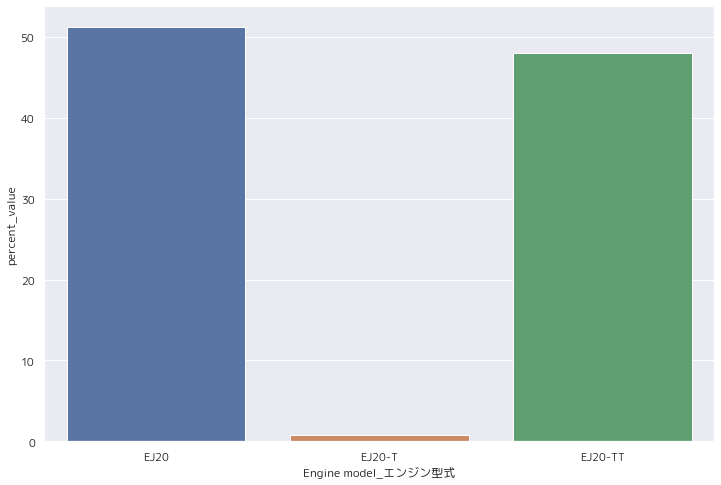

In [606]:
plt.figure(figsize=(12,8))
sns.barplot(x='Engine model_エンジン型式',y='percent_value',data=df_dt_em)

# Engine Model = EJ20

In [607]:
df_EJ20 = df_group.loc[('EJ20')]
df_EJ20

revenue  count
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                 
FF                2WD               AT    1998              30000.0      1
                                          2000              30000.0      1
                                          2001              30000.0      1
                  4WD               AT    1998             325000.0     11
                                          1999             340000.0     15
                                          2000             198000.0      7
                                          2001             601000.0     25
                                          2002             723000.0     27
                                          2003             180000.0      7
                                    MT    1998              90000.0      3
                                          1999              42000.0      2
                                          2000              25000.0      1
                                          2001              25000.0      1
                                          2002              30000.0      1
                                          2003              30000.0      1
                                          2004              30000.0      1
FR                4WD               AT    2000              25000.0      1
                                          2007              30000.0      1
W/O               W/O               W/O   2001              25000.0      1
                                          2002              30000.0      1

In [608]:
df_td1  = df_EJ20.groupby(['Truyền động 1_駆動1'])['revenue'].sum().reset_index()
df_td1['percent_value'] = round(df_td1['revenue']/df_td1['revenue'].sum()*100,2)
df_td1

,Truyền động 1_駆動1,revenue,percent_value
0,FF,2729000.0,96.13
1,FR,55000.0,1.94
2,W/O,55000.0,1.94


<AxesSubplot:xlabel='Truyền động 1_駆動1', ylabel='percent_value'>

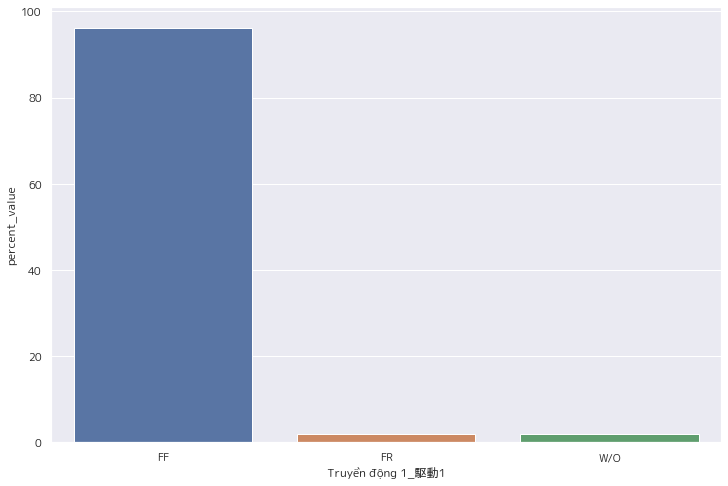

In [609]:
plt.figure(figsize=(12,8))
sns.barplot(x='Truyền động 1_駆動1',y='percent_value',data=df_td1)

In [610]:
df_EJ20_FF = df_EJ20.loc[('FF')]
df_EJ20_FF

revenue  count
Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                 
2WD               AT    1998              30000.0      1
                        2000              30000.0      1
                        2001              30000.0      1
4WD               AT    1998             325000.0     11
                        1999             340000.0     15
                        2000             198000.0      7
                        2001             601000.0     25
                        2002             723000.0     27
                        2003             180000.0      7
                  MT    1998              90000.0      3
                        1999              42000.0      2
                        2000              25000.0      1
                        2001              25000.0      1
                        2002              30000.0      1
                        2003              30000.0      1
                        2004              30000.0      1

In [611]:
df_dt_tm = df_EJ20_FF.groupby('Truyền động 2_駆動2')['revenue'].sum().reset_index(name='sum')
df_dt_tm['percent_value'] = round(df_dt_tm['sum']/df_dt_tm['sum'].sum()*100,2)
df_dt_tm

,Truyền động 2_駆動2,sum,percent_value
0,2WD,90000.0,3.3
1,4WD,2639000.0,96.7


<AxesSubplot:xlabel='Truyền động 2_駆動2', ylabel='percent_value'>

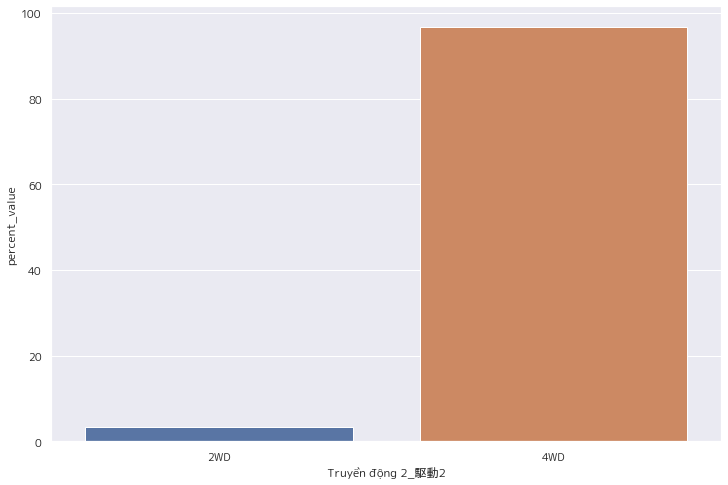

In [612]:
plt.figure(figsize=(12,8))
sns.barplot(x='Truyền động 2_駆動2',y='percent_value',data=df_dt_tm)

In [613]:
df_EJ20_FF_4WD = df_EJ20.loc[('FF','4WD')]
df_EJ20_FF_4WD

revenue  count
TM_TM Năm sản xuất_年式                 
AT    1998             325000.0     11
      1999             340000.0     15
      2000             198000.0      7
      2001             601000.0     25
      2002             723000.0     27
      2003             180000.0      7
MT    1998              90000.0      3
      1999              42000.0      2
      2000              25000.0      1
      2001              25000.0      1
      2002              30000.0      1
      2003              30000.0      1
      2004              30000.0      1

In [614]:
df_dt_tm = df_EJ20_FF_4WD.groupby('TM_TM')['revenue'].sum().reset_index(name='sum')
df_dt_tm['percent_value'] = round(df_dt_tm['sum']/df_dt_tm['sum'].sum()*100,2)
df_dt_tm

,TM_TM,sum,percent_value
0,AT,2367000.0,89.69
1,MT,272000.0,10.31


<AxesSubplot:xlabel='TM_TM', ylabel='percent_value'>

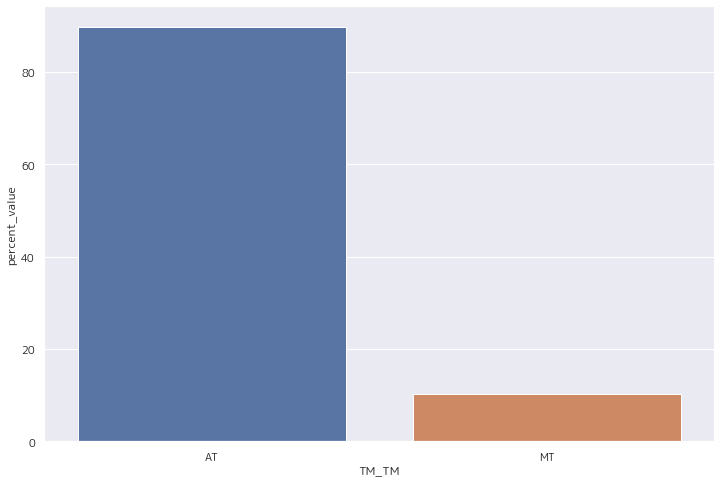

In [615]:
plt.figure(figsize=(12,8))
sns.barplot(x='TM_TM',y='percent_value',data=df_dt_tm)

In [616]:
df_AT = df_EJ20_FF_4WD.loc[('AT')].reset_index()
df_AT['percent_value'] = round(df_AT['revenue']/df_AT['revenue'].sum()*100,2)
df_AT

,Năm sản xuất_年式,revenue,count,percent_value
0,1998,325000.0,11,13.73
1,1999,340000.0,15,14.36
2,2000,198000.0,7,8.37
3,2001,601000.0,25,25.39
4,2002,723000.0,27,30.54
5,2003,180000.0,7,7.60


<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

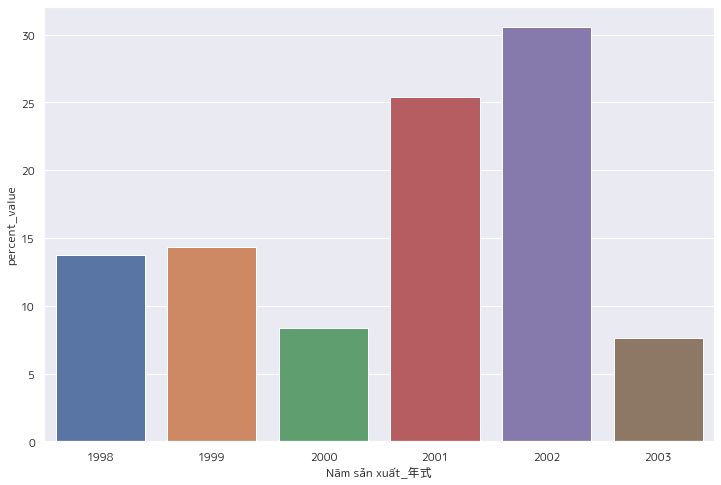

In [617]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_AT)

In [618]:
df_MT = df_EJ20_FF_4WD.loc[('MT')].reset_index()
df_MT['percent_value'] = round(df_MT['revenue']/df_MT['revenue'].sum()*100,2)
df_MT

,Năm sản xuất_年式,revenue,count,percent_value
0,1998,90000.0,3,33.09
1,1999,42000.0,2,15.44
2,2000,25000.0,1,9.19
3,2001,25000.0,1,9.19
4,2002,30000.0,1,11.03
5,2003,30000.0,1,11.03
6,2004,30000.0,1,11.03


<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

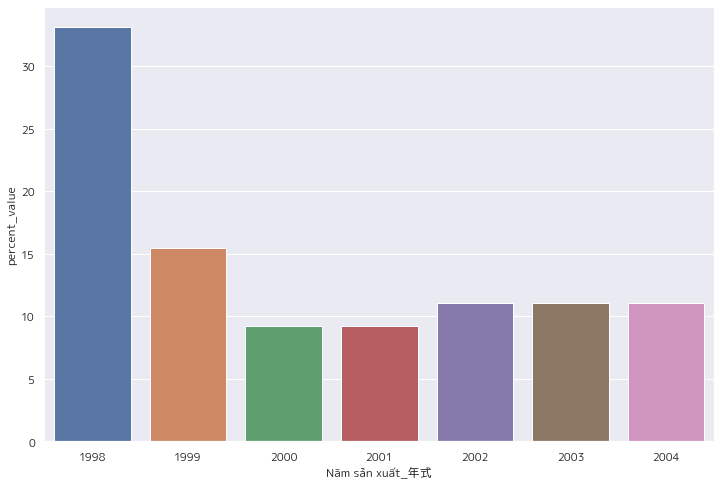

In [619]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_MT)

# Engine Model = EJ20-TT

In [620]:
df_EJ20_TT = df_group.loc[('EJ20-TT')]
df_EJ20_TT

revenue  count
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                 
FF                4WD               AT    0                 30000.0      1
                                          1998             254000.0     10
                                          1999             222000.0      8
                                          2000             388000.0     15
                                          2001             638000.0     25
                                          2002             360000.0     16
                                          2003              55000.0      2
                                    MT    1999              80000.0      3
                                          2000             115000.0      4
                                          2001             203000.0      7
                                          2002              55000.0      2
                                          2003              50000.0      2
FR                2WD               MT    2003             110000.0      1
                  4WD               AT    2004              25000.0      1
                                    MT    1999              27000.0      1
W/O               0                 0     2001              25000.0      1
                  W/O               W/O   1999              25000.0      1

In [621]:
df_td1  = df_EJ20_TT.groupby(['Truyền động 1_駆動1'])['revenue'].sum().reset_index()
df_td1['percent_value'] = round(df_td1['revenue']/df_td1['revenue'].sum()*100,2)
df_td1

,Truyền động 1_駆動1,revenue,percent_value
0,FF,2450000.0,92.04
1,FR,162000.0,6.09
2,W/O,50000.0,1.88


<AxesSubplot:xlabel='Truyền động 1_駆動1', ylabel='percent_value'>

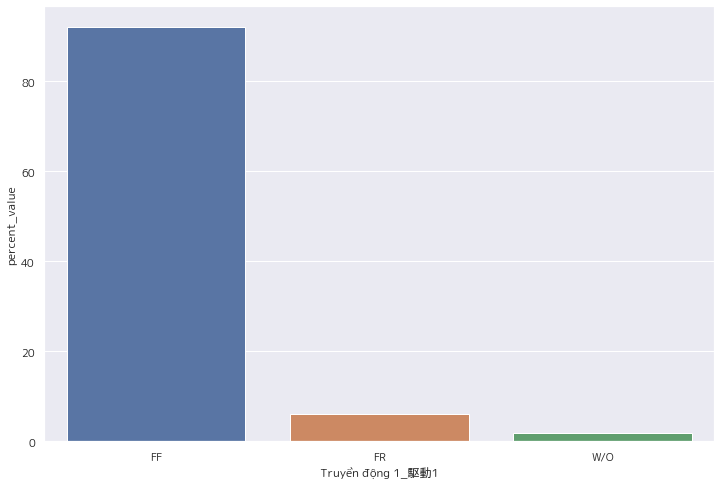

In [623]:
plt.figure(figsize=(12,8))
sns.barplot(x='Truyền động 1_駆動1',y='percent_value',data=df_td1)

In [448]:
df_td2 = df_EJ20_TT.loc[('FF','4WD')]
df_td2

revenue  count
TM_TM Năm sản xuất_年式                 
AT    0                 30000.0      1
      1998             254000.0     10
      1999             222000.0      8
      2000             388000.0     15
      2001             638000.0     25
      2002             360000.0     16
      2003              55000.0      2
MT    1999              80000.0      3
      2000             115000.0      4
      2001             203000.0      7
      2002              55000.0      2
      2003              50000.0      2

In [449]:
df_dt_tm  = df_td2.groupby(['TM_TM'])['revenue'].sum().reset_index()
df_dt_tm['percent_value'] = round(df_dt_tm['revenue']/df_dt_tm['revenue'].sum()*100,2)
df_dt_tm

,TM_TM,revenue,percent_value
0,AT,1947000.0,79.47
1,MT,503000.0,20.53


<AxesSubplot:xlabel='TM_TM', ylabel='percent_value'>

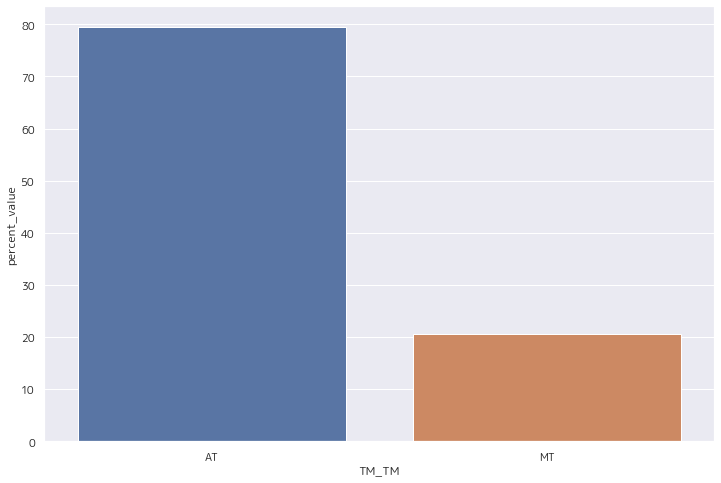

In [450]:
plt.figure(figsize=(12,8))
sns.barplot(x='TM_TM',y='percent_value',data=df_dt_tm)

In [451]:
df_AT = df_td2.loc[('AT')].reset_index()
df_AT['percent_value'] = round(df_AT['revenue']/df_AT['revenue'].sum()*100,2)
df_AT

,Năm sản xuất_年式,revenue,count,percent_value
0,0,30000.0,1,1.54
1,1998,254000.0,10,13.05
2,1999,222000.0,8,11.40
3,2000,388000.0,15,19.93
4,2001,638000.0,25,32.77
5,2002,360000.0,16,18.49
6,2003,55000.0,2,2.82


<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

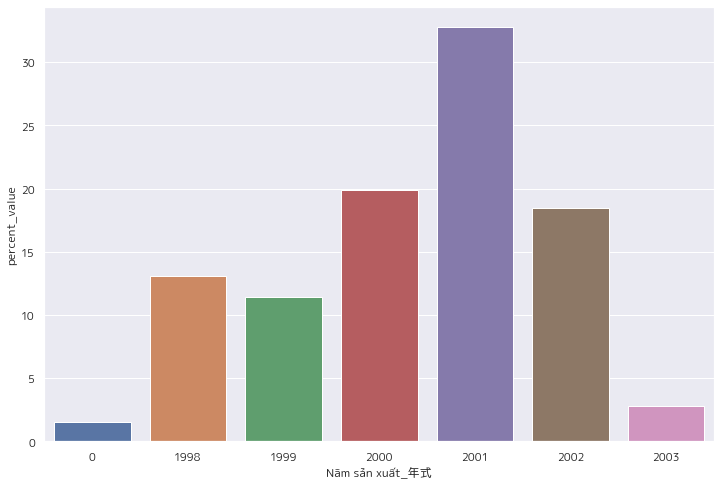

In [452]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_AT)

In [453]:
df_MT = df_td2.loc[('MT')].reset_index()
df_MT['percent_value'] = round(df_MT['revenue']/df_MT['revenue'].sum()*100,2)
df_MT

,Năm sản xuất_年式,revenue,count,percent_value
0,1999,80000.0,3,15.90
1,2000,115000.0,4,22.86
2,2001,203000.0,7,40.36
3,2002,55000.0,2,10.93
4,2003,50000.0,2,9.94


<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

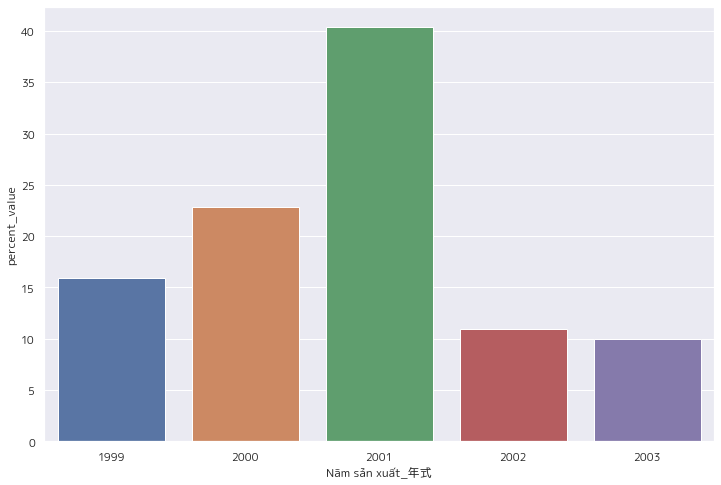

In [454]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_MT)

In [455]:
df_FR = df_EJ20_TT.reset_index()[df_EJ20_TT.reset_index()['Truyền động 1_駆動1'] == 'FR']
df_FR

,Truyền động 1_駆動1,Truyền động 2_駆動2,TM_TM,Năm sản xuất_年式,revenue,count
12,FR,2WD,MT,2003,110000.0,1
13,FR,4WD,AT,2004,25000.0,1
14,FR,4WD,MT,1999,27000.0,1


In [456]:
df_dt_FR = df_FR.groupby(['Truyền động 2_駆動2']).agg(count = ('Truyền động 2_駆動2','count'),sum=('revenue','sum')).reset_index()
df_dt_FR['percent_value'] = round(df_dt_FR['sum']/df_dt_FR['sum'].sum()*100,2)
df_dt_FR

,Truyền động 2_駆動2,count,sum,percent_value
0,2WD,1,110000.0,67.9
1,4WD,2,52000.0,32.1


<AxesSubplot:xlabel='Truyền động 2_駆動2', ylabel='percent_value'>

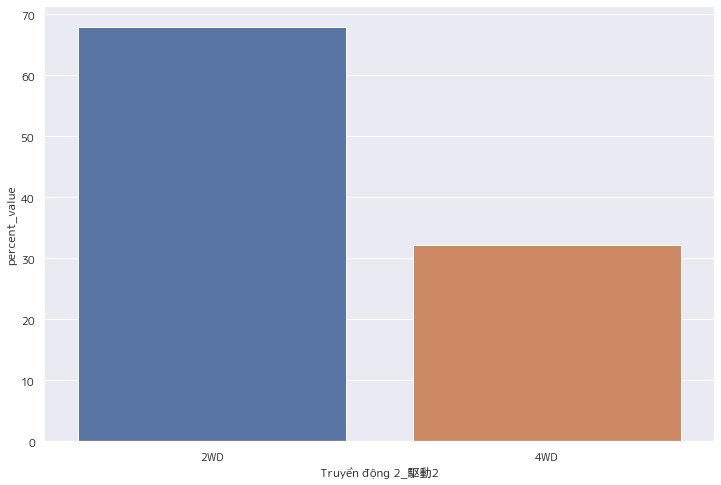

In [457]:
plt.figure(figsize=(12,8))
sns.barplot(x='Truyền động 2_駆動2',y='percent_value',data=df_dt_FR)

# Model xe =  BP5

In [624]:
df_BP5 = df_レガシィ[df_レガシィ['Model xe_車輌型式'] == 'BP5']
for col in df_BP5.columns:
    print(str(col) + ": "+str(df_BP5[col].unique()))

Tên xe_車名: ['レガシィ']
Model xe_車輌型式: ['BP5']
Engine model_エンジン型式: ['EJ20' 'EJ20-T' 'EJ18']
Truyền động 1_駆動1: ['FF' 'W/O' 'FR']
Truyền động 2_駆動2: ['4WD' 'W/O' '2WD' 0]
TM_TM: ['AT' 'W/O' 'MT' 0]
Năm sản xuất_年式: [2003 2004 2005 2008 2007 2006 2000    0 2002]
D/G_Ｄ／Ｇ: ['G']
Thành tích bán ra_販売実績: [ 30000.  10000.  25000.  27778.  50000.  35000.  55000.  12000.  45000.
  20000.  28000.  40000. 160000. 130000.  33000. 140000.  13000.   8000.
  32000.]


In [625]:
df_group = df_BP5.groupby(['Engine model_エンジン型式','Truyền động 1_駆動1','Truyền động 2_駆動2','TM_TM','Năm sản xuất_年式']).agg(revenue = ('Thành tích bán ra_販売実績', 'sum'),count = ('Engine model_エンジン型式','count'))
df_group

revenue  \
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式             
EJ18                FF                4WD               AT    2003              25000.0   
EJ20                FF                2WD               AT    2004              10000.0   
                                      4WD               AT    2000              25000.0   
                                                              2002             140000.0   
                                                              2003             792000.0   
                                                              2004             667000.0   
                                                              2005             622778.0   
                                                              2006             367000.0   
                                                              2007              75000.0   
                                                              2008             168000.0   
                                                        MT    2003              70000.0   
                                                              2004              35000.0   
                                                              2005              80000.0   
                                                              2006              25000.0   
                    FR                4WD               MT    2004              35000.0   
                    W/O               0                 0     2004              30000.0   
                                      W/O               W/O   2004              25000.0   
EJ20-T              FF                4WD               AT    2000              30000.0   
                                                              2003             613000.0   
                                                              2004             175000.0   
                                                              2005             160000.0   
                                                              2007             140000.0   
                                                        MT    0                 50000.0   
                                                              2003              45000.0   
                                                              2004             210000.0   
                                                              2005              85000.0   

                                                                               count  
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式         
EJ18                FF                4WD               AT    2003                 1  
EJ20                FF                2WD               AT    2004                 1  
                                      4WD               AT    2000                 1  
                                                              2002                 1  
                                                              2003                28  
                                                              2004                23  
                                                              2005                22  
                                                              2006                13  
                                                              2007                 4  
                                                              2008                 6  
                                                        MT    2003                 3  
                                                              2004                 2  
                                                              2005                 3  
                                                              2006                 1  
                    FR                4WD               MT    2004                 1  
                    W/O               0             

In [626]:
df_dt_em = df_BP5.groupby('Engine model_エンジン型式')['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
df_dt_em['percent_value']  = round(df_dt_em['sum']/df_BP5['Thành tích bán ra_販売実績'].sum()*100,2)
df_dt_em

,Engine model_エンジン型式,sum,percent_value
0,EJ18,25000.0,0.53
1,EJ20,3166778.0,67.38
2,EJ20-T,1508000.0,32.09


<AxesSubplot:xlabel='Engine model_エンジン型式', ylabel='percent_value'>

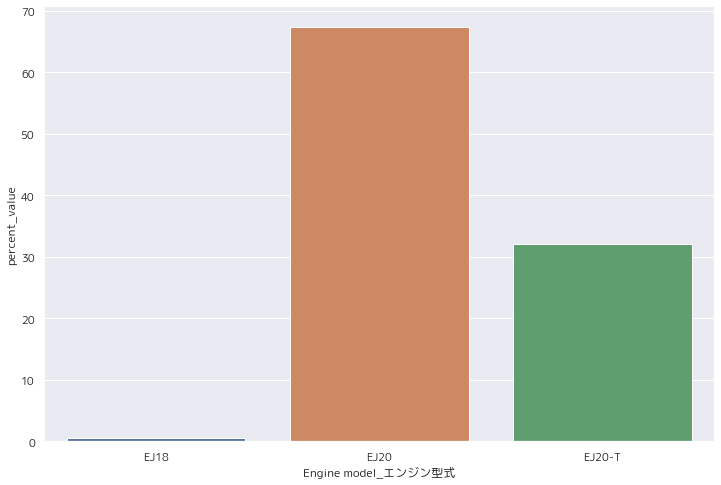

In [627]:
plt.figure(figsize=(12,8))
sns.barplot(x='Engine model_エンジン型式',y='percent_value',data=df_dt_em)

# Engine Model = EJ20

In [628]:
df_EJ20 = df_group.loc[('EJ20')]
df_EJ20

revenue  count
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                 
FF                2WD               AT    2004              10000.0      1
                  4WD               AT    2000              25000.0      1
                                          2002             140000.0      1
                                          2003             792000.0     28
                                          2004             667000.0     23
                                          2005             622778.0     22
                                          2006             367000.0     13
                                          2007              75000.0      4
                                          2008             168000.0      6
                                    MT    2003              70000.0      3
                                          2004              35000.0      2
                                          2005              80000.0      3
                                          2006              25000.0      1
FR                4WD               MT    2004              35000.0      1
W/O               0                 0     2004              30000.0      1
                  W/O               W/O   2004              25000.0      1

In [629]:
df_td1  = df_EJ20.groupby(['Truyền động 1_駆動1'])['revenue'].sum().reset_index()
df_td1['percent_value'] = round(df_td1['revenue']/df_td1['revenue'].sum()*100,2)
df_td1

,Truyền động 1_駆動1,revenue,percent_value
0,FF,3076778.0,97.16
1,FR,35000.0,1.11
2,W/O,55000.0,1.74


<AxesSubplot:xlabel='Truyền động 1_駆動1', ylabel='percent_value'>

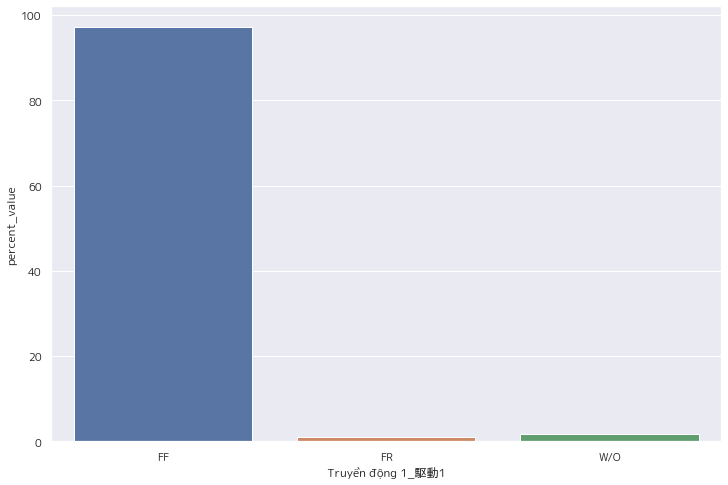

In [463]:
plt.figure(figsize=(12,8))
sns.barplot(x='Truyền động 1_駆動1',y='percent_value',data=df_td1)

In [632]:
df_EJ20_FF = df_EJ20.loc[('FF')]
df_EJ20_FF

revenue  count
Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                 
2WD               AT    2004              10000.0      1
4WD               AT    2000              25000.0      1
                        2002             140000.0      1
                        2003             792000.0     28
                        2004             667000.0     23
                        2005             622778.0     22
                        2006             367000.0     13
                        2007              75000.0      4
                        2008             168000.0      6
                  MT    2003              70000.0      3
                        2004              35000.0      2
                        2005              80000.0      3
                        2006              25000.0      1

In [633]:
df_dt_tm = df_EJ20_FF.groupby('Truyền động 2_駆動2')['revenue'].sum().reset_index(name='sum')
df_dt_tm['percent_value'] = round(df_dt_tm['sum']/df_dt_tm['sum'].sum()*100,2)
df_dt_tm

,Truyền động 2_駆動2,sum,percent_value
0,2WD,10000.0,0.33
1,4WD,3066778.0,99.67


<AxesSubplot:xlabel='Truyền động 2_駆動2', ylabel='percent_value'>

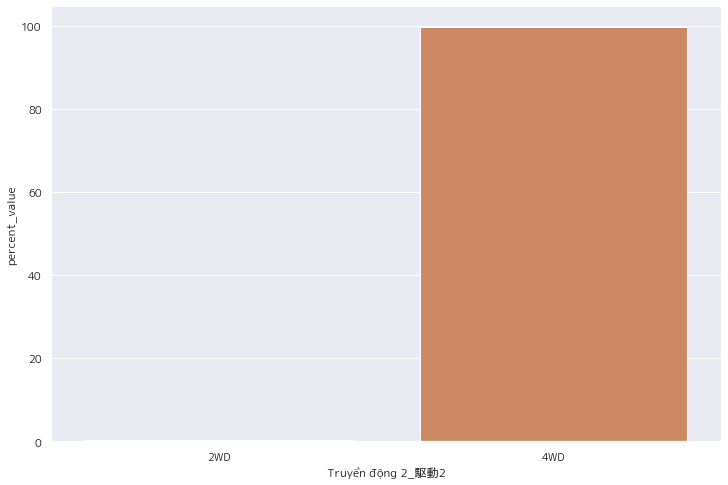

In [634]:
plt.figure(figsize=(12,8))
sns.barplot(x='Truyền động 2_駆動2',y='percent_value',data=df_dt_tm)

In [464]:
df_EJ20_FF_4WD = df_EJ20.loc[('FF','4WD')]
df_EJ20_FF_4WD

revenue  count
TM_TM Năm sản xuất_年式                 
AT    2000              25000.0      1
      2002             140000.0      1
      2003             792000.0     28
      2004             667000.0     23
      2005             622778.0     22
      2006             367000.0     13
      2007              75000.0      4
      2008             168000.0      6
MT    2003              70000.0      3
      2004              35000.0      2
      2005              80000.0      3
      2006              25000.0      1

In [465]:
df_dt_tm = df_EJ20_FF_4WD.groupby('TM_TM')['revenue'].sum().reset_index(name='sum')
df_dt_tm['percent_value'] = round(df_dt_tm['sum']/df_dt_tm['sum'].sum()*100,2)
df_dt_tm

,TM_TM,sum,percent_value
0,AT,2856778.0,93.15
1,MT,210000.0,6.85


<AxesSubplot:xlabel='TM_TM', ylabel='percent_value'>

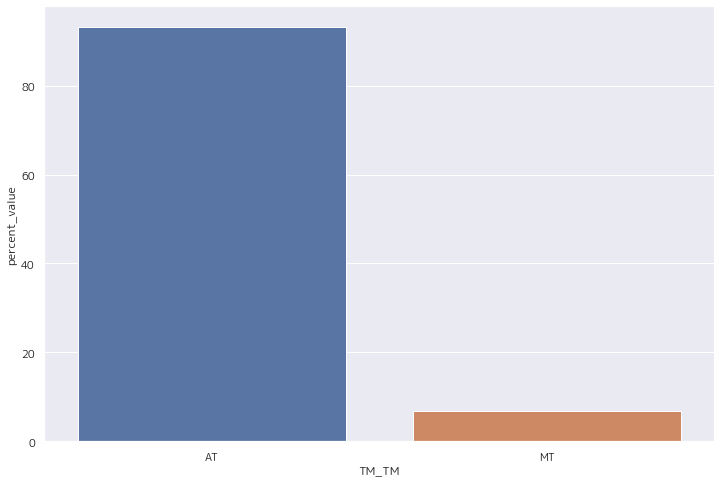

In [466]:
plt.figure(figsize=(12,8))
sns.barplot(x='TM_TM',y='percent_value',data=df_dt_tm)

In [467]:
df_AT = df_td2.loc[('AT')].reset_index()
df_AT['percent_value'] = round(df_AT['revenue']/df_AT['revenue'].sum()*100,2)
df_AT

,Năm sản xuất_年式,revenue,count,percent_value
0,0,30000.0,1,1.54
1,1998,254000.0,10,13.05
2,1999,222000.0,8,11.40
3,2000,388000.0,15,19.93
4,2001,638000.0,25,32.77
5,2002,360000.0,16,18.49
6,2003,55000.0,2,2.82


<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

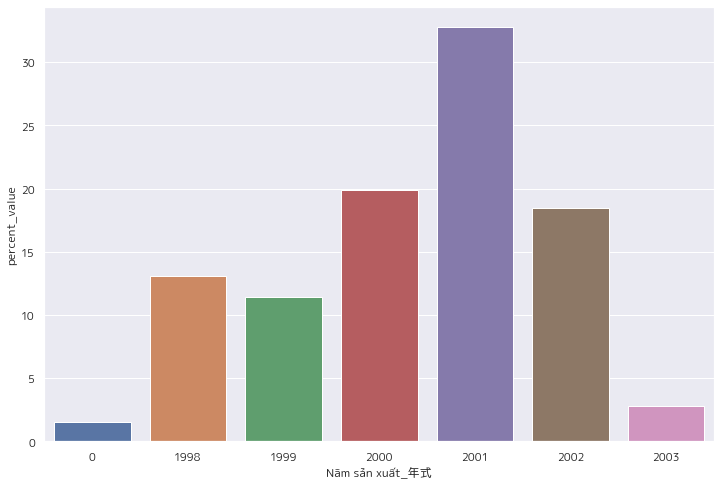

In [468]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_AT) 

In [469]:
df_MT = df_td2.loc[('MT')].reset_index()
df_MT['percent_value'] = round(df_MT['revenue']/df_MT['revenue'].sum()*100,2)
df_MT

,Năm sản xuất_年式,revenue,count,percent_value
0,1999,80000.0,3,15.90
1,2000,115000.0,4,22.86
2,2001,203000.0,7,40.36
3,2002,55000.0,2,10.93
4,2003,50000.0,2,9.94


<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

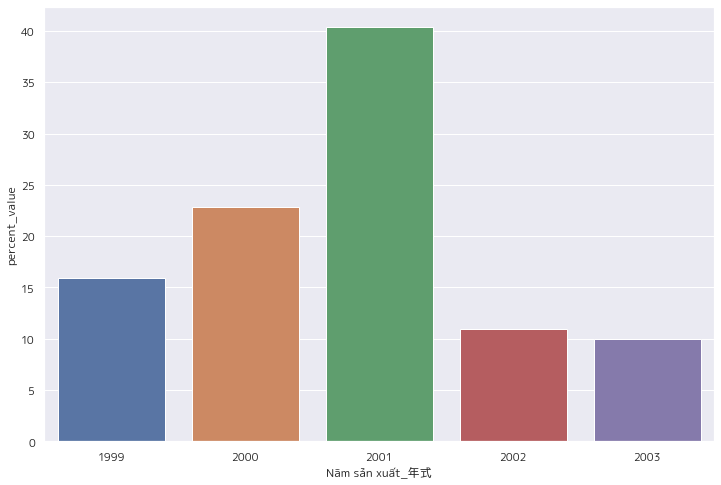

In [470]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_MT) 

# Engine Model = EJ20-T


In [471]:
df_EJ20_T = df_group.loc[('EJ20-T')]
df_EJ20_T

revenue  count
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                 
FF                4WD               AT    2000              30000.0      1
                                          2003             613000.0     17
                                          2004             175000.0      5
                                          2005             160000.0      6
                                          2007             140000.0      4
                                    MT    0                 50000.0      1
                                          2003              45000.0      1
                                          2004             210000.0      2
                                          2005              85000.0      2

In [472]:
df_at_mt = df_EJ20_T.loc[('FF','4WD','AT')]

In [473]:
df_tm  = df_EJ20_T.groupby(['TM_TM'])['revenue','count'].sum().reset_index()
df_tm['percent_value'] = round(df_tm['revenue']/df_tm['revenue'].sum()*100,2)
df_tm

<ipython-input-473-b058e033e653>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_tm  = df_EJ20_T.groupby(['TM_TM'])['revenue','count'].sum().reset_index()


,TM_TM,revenue,count,percent_value
0,AT,1118000.0,33,74.14
1,MT,390000.0,6,25.86


<AxesSubplot:xlabel='TM_TM', ylabel='percent_value'>

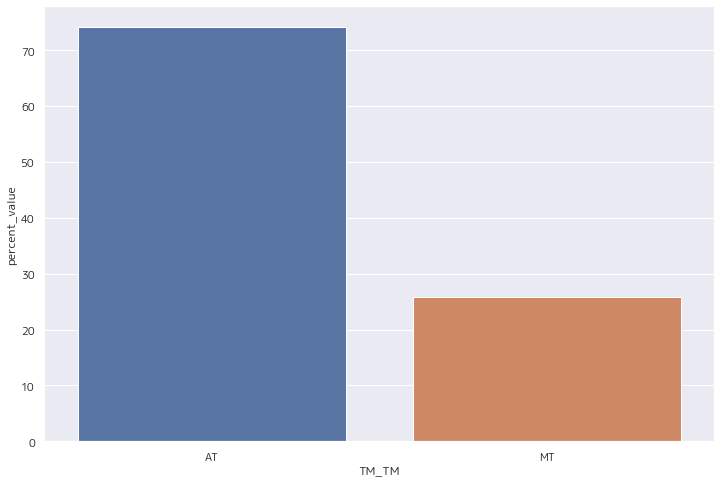

In [474]:
plt.figure(figsize=(12,8))
sns.barplot(x='TM_TM',y='percent_value',data=df_tm)

In [475]:
df_AT = df_EJ20_T.loc[('FF','4WD','AT')].reset_index()
df_AT['percent_value'] = round(df_AT['revenue']/df_AT['revenue'].sum()*100,2)
df_AT

,Năm sản xuất_年式,revenue,count,percent_value
0,2000,30000.0,1,2.68
1,2003,613000.0,17,54.83
2,2004,175000.0,5,15.65
3,2005,160000.0,6,14.31
4,2007,140000.0,4,12.52


<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

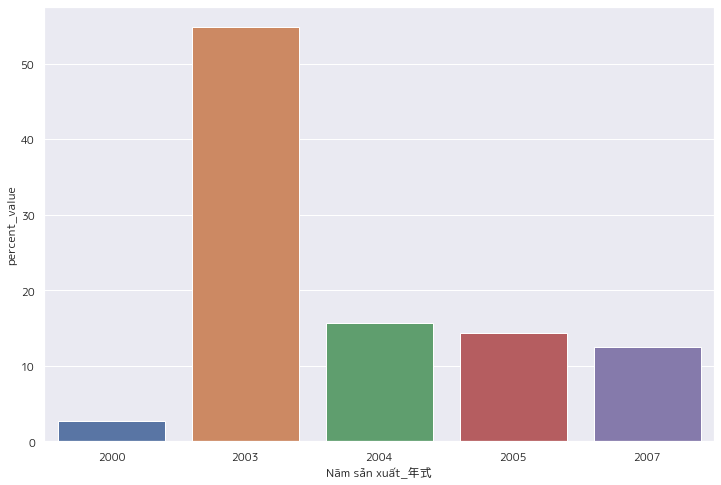

In [476]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_AT) 

In [477]:
df_MT = df_EJ20_T.loc[('FF','4WD','MT')].reset_index()
df_MT['percent_value'] = round(df_MT['revenue']/df_MT['revenue'].sum()*100,2)
df_MT

,Năm sản xuất_年式,revenue,count,percent_value
0,0,50000.0,1,12.82
1,2003,45000.0,1,11.54
2,2004,210000.0,2,53.85
3,2005,85000.0,2,21.79


<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

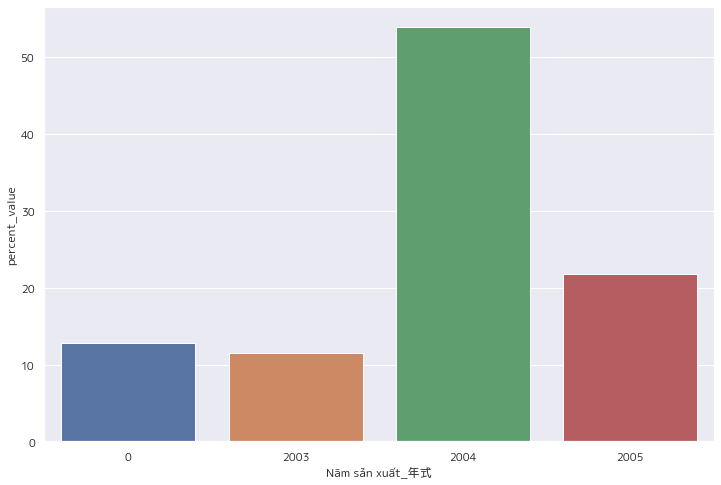

In [478]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_MT) 

# Model xe = BE5

In [479]:
df_BE5 = df_レガシィ[df_レガシィ['Model xe_車輌型式'] == 'BE5']
for col in df_BE5.columns:
    print(str(col) + ": "+str(df_BE5[col].unique()))

Tên xe_車名: ['レガシィ']
Model xe_車輌型式: ['BE5']
Engine model_エンジン型式: ['EJ20' 'EJ20-TT' 'EJ20-T']
Truyền động 1_駆動1: ['FF' 'W/O']
Truyền động 2_駆動2: ['4WD' 0 '2WD']
TM_TM: ['AT' 'MT' 0]
Năm sản xuất_年式: [2000 1999 2001 2002 1998 2003    0]
D/G_Ｄ／Ｇ: ['G']
Thành tích bán ra_販売実績: [ 10000.  30000.  25000.  28000.  12000.  20000.  35000. 120000.  45000.
  27000.]


In [480]:
df_group = df_BE5.groupby(['Engine model_エンジン型式','Truyền động 1_駆動1','Truyền động 2_駆動2','TM_TM','Năm sản xuất_年式']).agg(revenue = ('Thành tích bán ra_販売実績', 'sum'),count = ('Engine model_エンジン型式','count'))
df_group

revenue  \
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式             
EJ20                FF                2WD               AT    2001              25000.0   
                                                              2002              10000.0   
                                      4WD               AT    1999             157000.0   
                                                              2000             160000.0   
                                                              2001             165000.0   
                                                              2002             123000.0   
                                                              2003             122000.0   
                                                        MT    2000              12000.0   
                                                              2001              90000.0   
                                                              2002              65000.0   
                    W/O               0                 0     2000              25000.0   
EJ20-T              FF                4WD               MT    2001              35000.0   
                                                              2003              10000.0   
EJ20-TT             FF                4WD               AT    1999             389000.0   
                                                              2000             165000.0   
                                                              2001             205000.0   
                                                              2002             105000.0   
                                                        MT    0                 30000.0   
                                                              1998             150000.0   
                                                              1999              30000.0   
                                                              2000             157000.0   
                                                              2001             175000.0   
                                                              2002              50000.0   

                                                                               count  
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式         
EJ20                FF                2WD               AT    2001                 1  
                                                              2002                 1  
                                      4WD               AT    1999                 6  
                                                              2000                 7  
                                                              2001                 7  
                                                              2002                 4  
                                                              2003                 5  
                                                        MT    2000                 1  
                                                              2001                 3  
                                                              2002                 3  
                    W/O               0                 0     2000                 1  
EJ20-T              FF                4WD               MT    2001                 1  
                                                              2003                 1  
EJ20-TT             FF                4WD               AT    1999                16  
                                                              2000                 8  
                                                              2001                 8  
                                                              2002                 5  
                                                        MT    0                    1  
                                                              19

In [481]:
df_dt_em = df_BE5.groupby('Engine model_エンジン型式')['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
df_dt_em['percent_value']  = round(df_dt_em['sum']/df_BE5['Thành tích bán ra_販売実績'].sum()*100,2)
df_dt_em

,Engine model_エンジン型式,sum,percent_value
0,EJ20,954000.0,38.86
1,EJ20-T,45000.0,1.83
2,EJ20-TT,1456000.0,59.31


<AxesSubplot:xlabel='Engine model_エンジン型式', ylabel='percent_value'>

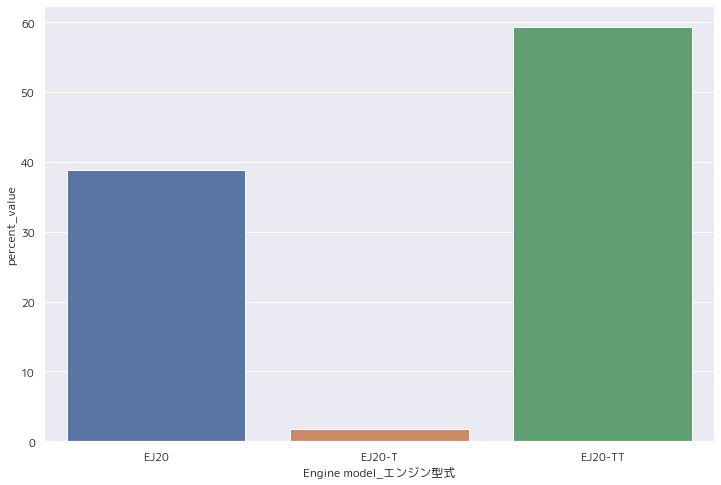

In [482]:
plt.figure(figsize=(12,8))
sns.barplot(x='Engine model_エンジン型式',y='percent_value',data=df_dt_em) 

# Engine model = EJ20

In [483]:
df_EJ20 = df_group.loc[('EJ20')]
df_EJ20

revenue  count
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                 
FF                2WD               AT    2001              25000.0      1
                                          2002              10000.0      1
                  4WD               AT    1999             157000.0      6
                                          2000             160000.0      7
                                          2001             165000.0      7
                                          2002             123000.0      4
                                          2003             122000.0      5
                                    MT    2000              12000.0      1
                                          2001              90000.0      3
                                          2002              65000.0      3
W/O               0                 0     2000              25000.0      1

In [484]:
df_td1  = df_EJ20.groupby(['Truyền động 1_駆動1'])['revenue'].sum().reset_index()
df_td1['percent_value'] = round(df_td1['revenue']/df_td1['revenue'].sum()*100,2)
df_td1

,Truyền động 1_駆動1,revenue,percent_value
0,FF,929000.0,97.38
1,W/O,25000.0,2.62


<AxesSubplot:xlabel='Truyền động 1_駆動1', ylabel='percent_value'>

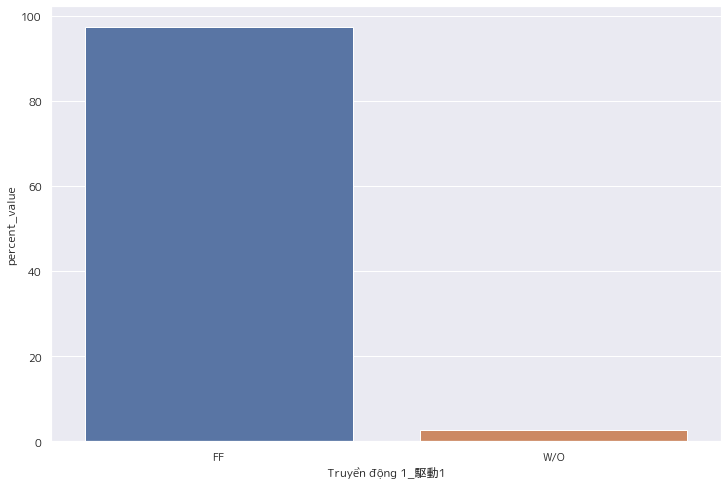

In [485]:
plt.figure(figsize=(12,8))
sns.barplot(x='Truyền động 1_駆動1',y='percent_value',data=df_td1) 

In [486]:
df_EJ20_FF = df_EJ20.loc[('FF')]
df_EJ20_FF

revenue  count
Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                 
2WD               AT    2001              25000.0      1
                        2002              10000.0      1
4WD               AT    1999             157000.0      6
                        2000             160000.0      7
                        2001             165000.0      7
                        2002             123000.0      4
                        2003             122000.0      5
                  MT    2000              12000.0      1
                        2001              90000.0      3
                        2002              65000.0      3

In [487]:
df_td2 = df_EJ20_FF.groupby(['Truyền động 2_駆動2'])['revenue','count'].sum().reset_index()
df_td2['percent_value'] = round(df_td2['revenue']/df_td2['revenue'].sum()*100,2)
df_td2

<ipython-input-487-75bf7fdae2a3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_td2 = df_EJ20_FF.groupby(['Truyền động 2_駆動2'])['revenue','count'].sum().reset_index()


,Truyền động 2_駆動2,revenue,count,percent_value
0,2WD,35000.0,2,3.77
1,4WD,894000.0,36,96.23


<AxesSubplot:xlabel='Truyền động 2_駆動2', ylabel='percent_value'>

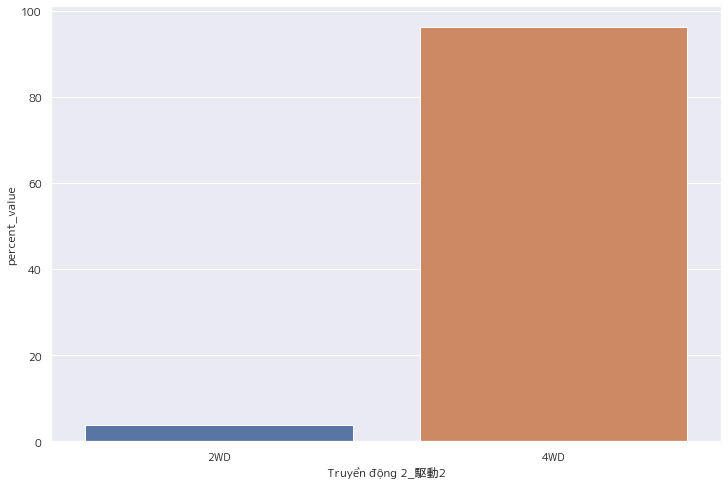

In [488]:
plt.figure(figsize=(12,8))
sns.barplot(x='Truyền động 2_駆動2',y='percent_value',data=df_td2)

In [489]:
df_4WD = df_EJ20_FF.loc[('4WD')]
df_tm = df_4WD.groupby(['TM_TM'])['revenue','count'].sum().reset_index()
df_tm['percent_value'] = round(df_tm['revenue']/df_tm['revenue'].sum()*100,2)
df_tm

<ipython-input-489-3b3623de9d66>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_tm = df_4WD.groupby(['TM_TM'])['revenue','count'].sum().reset_index()


,TM_TM,revenue,count,percent_value
0,AT,727000.0,29,81.32
1,MT,167000.0,7,18.68


<AxesSubplot:xlabel='TM_TM', ylabel='percent_value'>

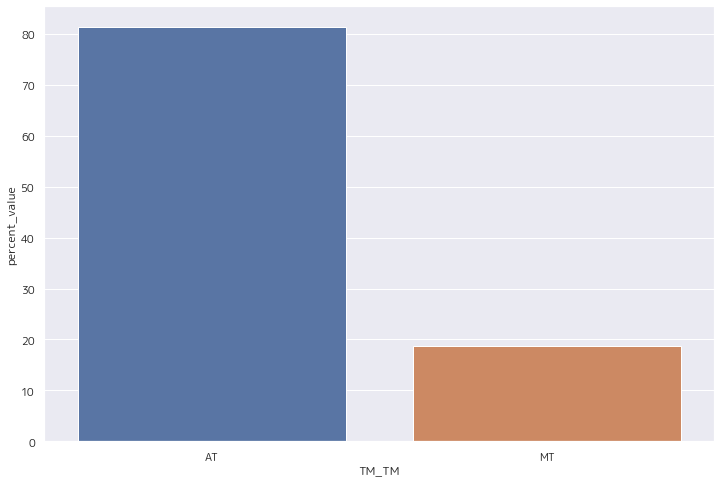

In [490]:
plt.figure(figsize=(12,8))
sns.barplot(x='TM_TM',y='percent_value',data=df_tm)

In [491]:
df_AT = df_EJ20_FF.loc[('4WD','AT')].reset_index()
df_AT['percent_value'] = round(df_AT['revenue']/df_AT['revenue'].sum()*100,2)
df_AT

,Năm sản xuất_年式,revenue,count,percent_value
0,1999,157000.0,6,21.60
1,2000,160000.0,7,22.01
2,2001,165000.0,7,22.70
3,2002,123000.0,4,16.92
4,2003,122000.0,5,16.78


<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

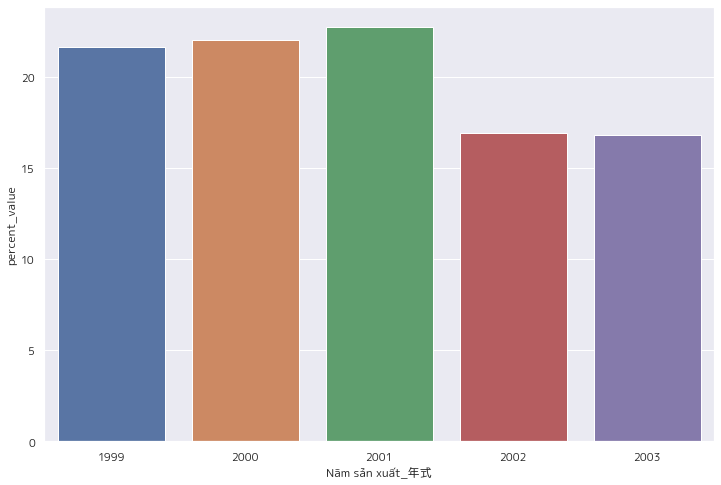

In [492]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_AT) 

In [493]:
df_MT = df_EJ20_FF.loc[('4WD','MT')].reset_index()
df_MT['percent_value'] = round(df_MT['revenue']/df_MT['revenue'].sum()*100,2)
df_MT

,Năm sản xuất_年式,revenue,count,percent_value
0,2000,12000.0,1,7.19
1,2001,90000.0,3,53.89
2,2002,65000.0,3,38.92


<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

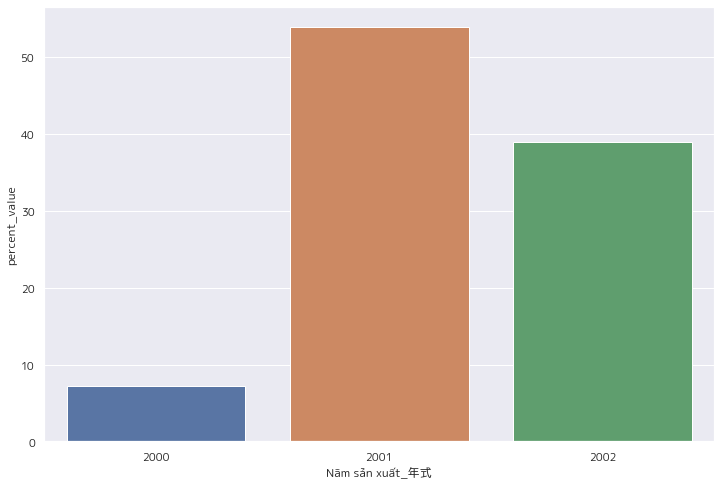

In [494]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_MT) 

# Engine Module = EJ20-TT

In [495]:
df_EJ20_TT = df_group.loc[('EJ20-TT')]
df_EJ20_TT

revenue  count
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                 
FF                4WD               AT    1999             389000.0     16
                                          2000             165000.0      8
                                          2001             205000.0      8
                                          2002             105000.0      5
                                    MT    0                 30000.0      1
                                          1998             150000.0      2
                                          1999              30000.0      1
                                          2000             157000.0      6
                                          2001             175000.0      6
                                          2002              50000.0      2

In [496]:
df_td1  = df_EJ20_TT.groupby(['TM_TM'])['revenue','count'].sum().reset_index()
df_td1['percent_value'] = round(df_td1['revenue']/df_td1['revenue'].sum()*100,2)
df_td1

<ipython-input-496-10ca1022d86f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_td1  = df_EJ20_TT.groupby(['TM_TM'])['revenue','count'].sum().reset_index()


,TM_TM,revenue,count,percent_value
0,AT,864000.0,37,59.34
1,MT,592000.0,18,40.66


<AxesSubplot:xlabel='TM_TM', ylabel='percent_value'>

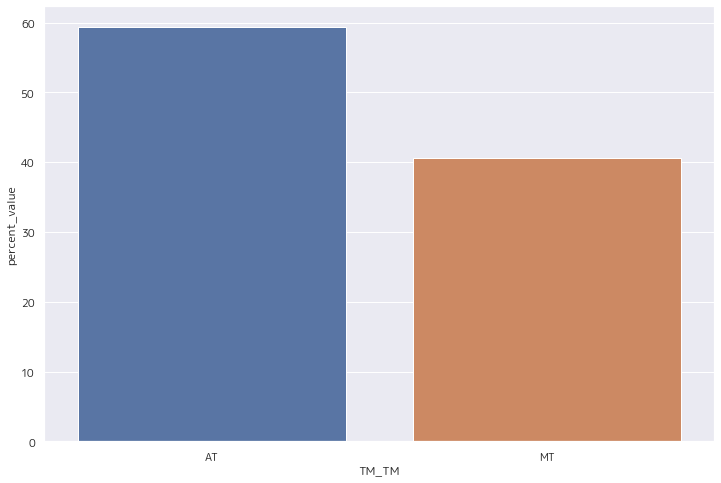

In [497]:
plt.figure(figsize=(12,8))
sns.barplot(x='TM_TM',y='percent_value',data=df_td1) 

In [498]:
df_AT = df_EJ20_TT.loc[('FF','4WD','AT')].reset_index()
df_AT['percent_value'] = round(df_AT['revenue']/df_AT['revenue'].sum()*100,2)
df_AT

,Năm sản xuất_年式,revenue,count,percent_value
0,1999,389000.0,16,45.02
1,2000,165000.0,8,19.10
2,2001,205000.0,8,23.73
3,2002,105000.0,5,12.15


<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

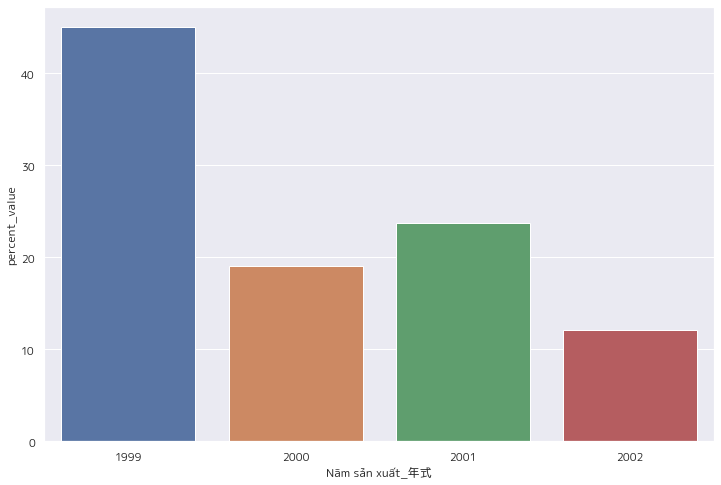

In [499]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_AT) 

In [500]:
df_MT = df_EJ20_TT.loc[('FF','4WD','MT')].reset_index()
df_MT['percent_value'] = round(df_MT['revenue']/df_MT['revenue'].sum()*100,2)
df_MT

,Năm sản xuất_年式,revenue,count,percent_value
0,0,30000.0,1,5.07
1,1998,150000.0,2,25.34
2,1999,30000.0,1,5.07
3,2000,157000.0,6,26.52
4,2001,175000.0,6,29.56
5,2002,50000.0,2,8.45


<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

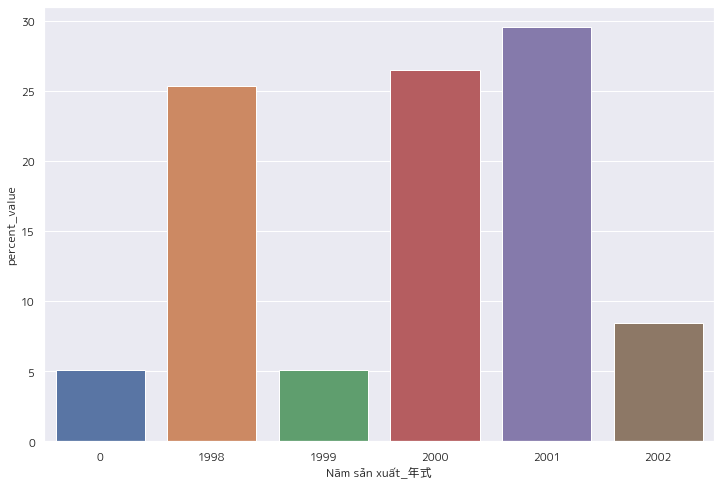

In [501]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_MT) 

# Tên xe =  カルディナ

In [502]:
df_カルディナ = df_spec[df_spec['Tên xe_車名'] == 'カルディナ']
df_カルディナ.nunique()

Tên xe_車名                  1
Model xe_車輌型式             20
Engine model_エンジン型式       13
Truyền động 1_駆動1          2
Truyền động 2_駆動2          3
TM_TM                      3
Năm sản xuất_年式           17
D/G_Ｄ／Ｇ                    2
Thành tích bán ra_販売実績    50
dtype: int64

In [503]:
for col in df_カルディナ.columns:
    print(str(col) + ": "+str(df_カルディナ[col].unique()))

Tên xe_車名: ['カルディナ']
Model xe_車輌型式: ['AT211' 'ST215' 'ST210' 'ST198' 'CT197' 'ST195' 'CT190' 'ST190' 'AZT241'
 'CT198' 'AT191' 'AZT246' 'ST191' 'ZZT241' 'ET196' 'CT196' 'ST246'
 'CT196V' 'ET196V' 'CT195']
Engine model_エンジン型式: ['7A-FE ' '3S-FE' '3S-GTE' '3C-E' '3S-GE' '7A-FE' '2C' '4S-FE' '1AZ-FSE'
 '1ZZ-FE' '5E-FE' '2C-V' '2C-T']
Truyền động 1_駆動1: ['FF' 'W/O']
Truyền động 2_駆動2: ['2WD' '4WD' 0]
TM_TM: ['MT' 'AT' 0]
Năm sản xuất_年式: [1999 1997 2000 2001 1996 2002 1994 1998 1995 2003 2006 1993 2004 2005
    0 1992 2011]
D/G_Ｄ／Ｇ: ['G' 'D']
Thành tích bán ra_販売実績: [ 30000.  10000.  35000. 140000.  50000.  75000. 110000.  40000. 100000.
  45000.  33000. 120000.  15000.   5000.   8000.  38000. 130000.  48000.
 160000.  55000.  80000.  85000.  25000.  28000.  20000.  70000.  12000.
  34000.  90000. 138000.  82950. 118200. 118000. 140200. 135000.  65000.
 161500. 145000. 180833. 170000. 125000.  23000. 210000.   3000.  19000.
   9000.   4000.   6000. 158000.  68000.]


<ipython-input-504-0c7fa4b6701e>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 50)
<ipython-input-504-0c7fa4b6701e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 50)
<ipython-input-504-0c7fa4b6701e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticks(),size =50)


Text(0.5, 0, 'Model xe_車輌型式')

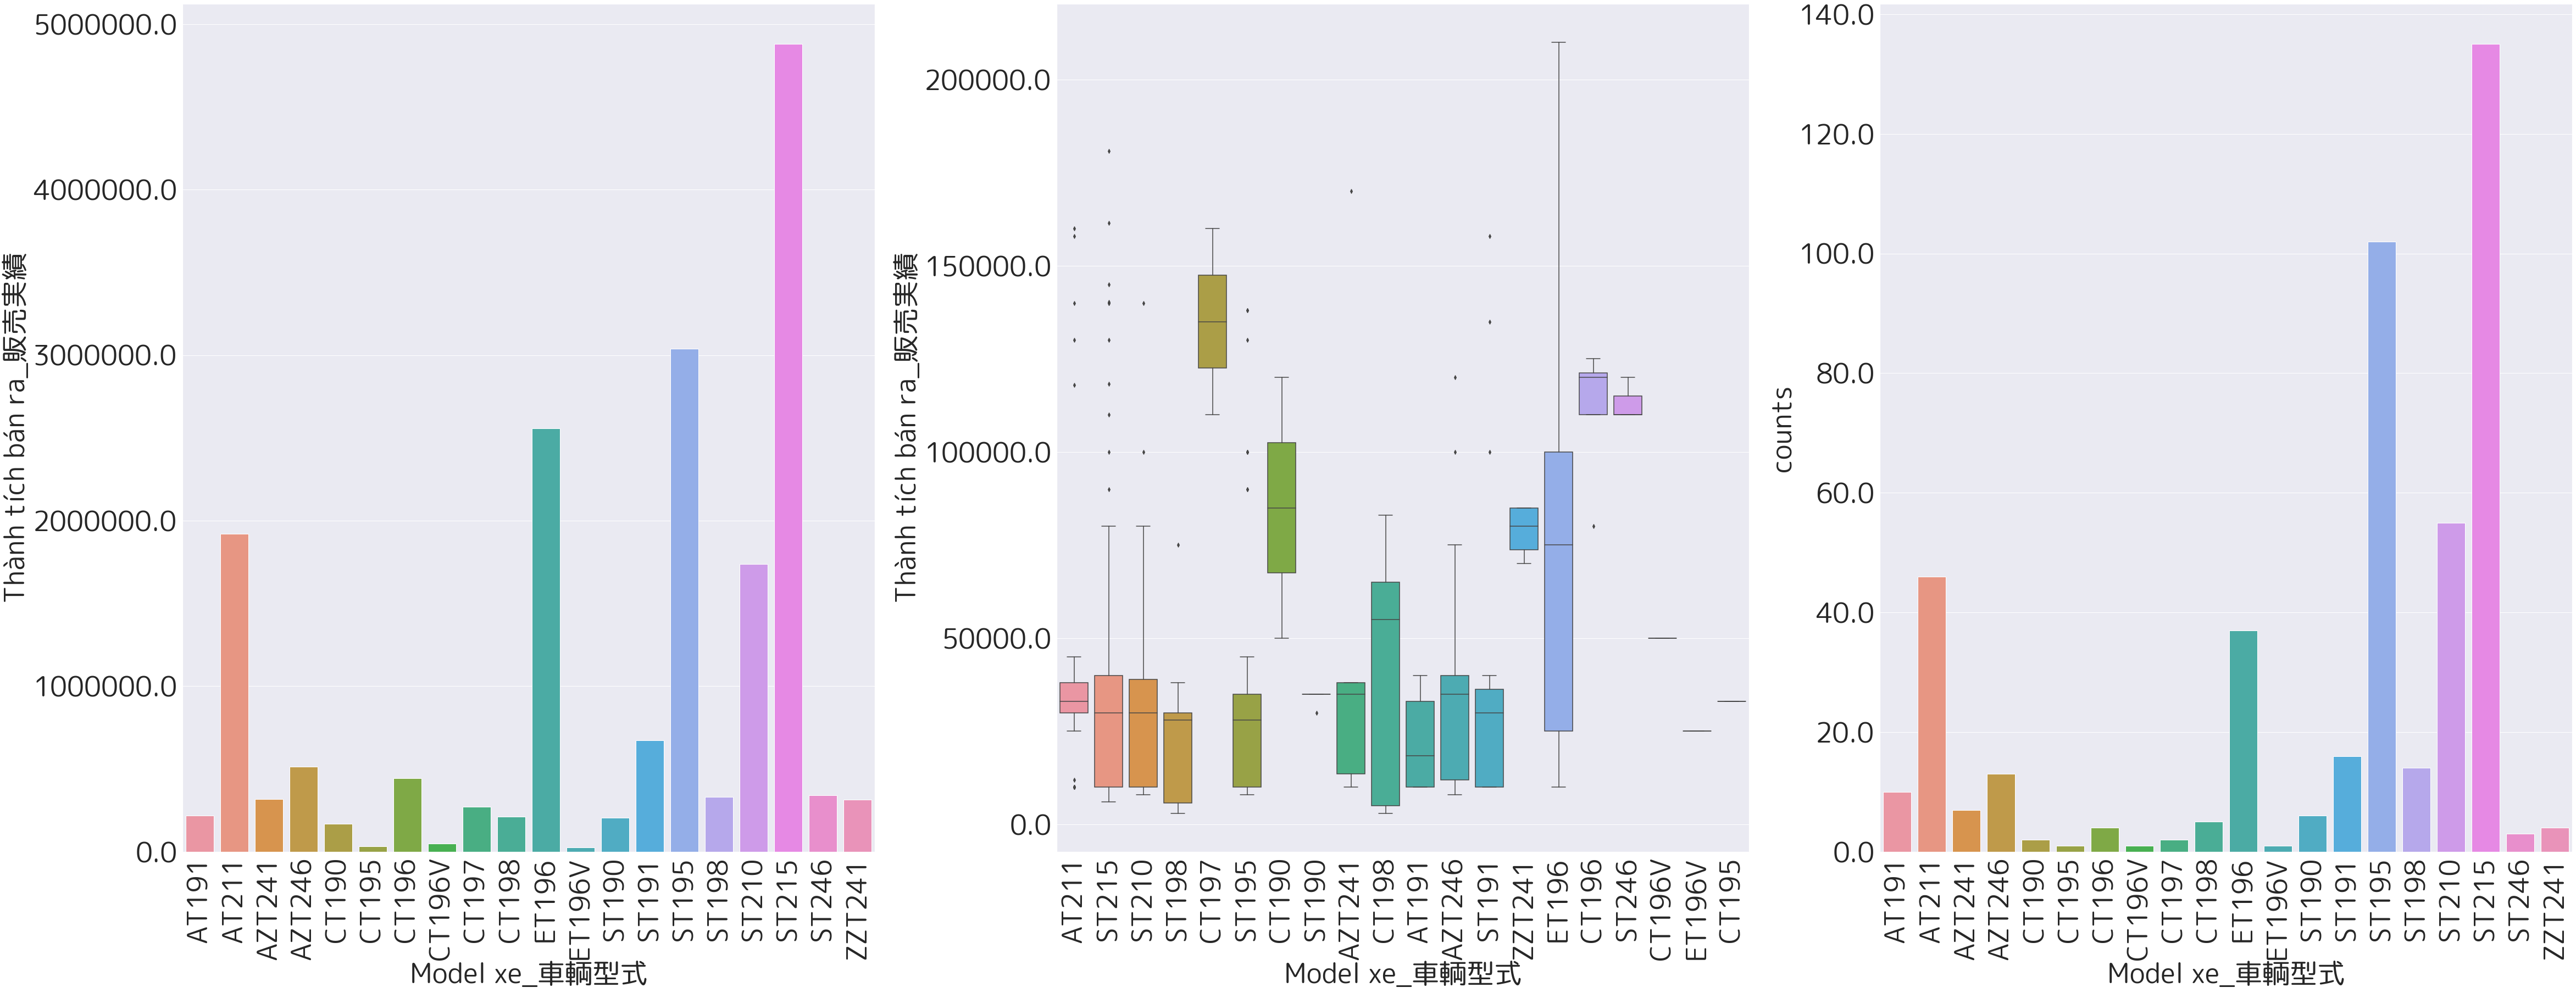

In [504]:
count_model =df_カルディナ.groupby(['Model xe_車輌型式'])['Model xe_車輌型式'].count().reset_index(name='counts')
sum_model = df_カルディナ.groupby(['Model xe_車輌型式'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
fig, axs = plt.subplots(1, 3, sharex=False, figsize=(65, 25),constrained_layout=True)
p = sns.barplot(x='Model xe_車輌型式',y='sum',data=sum_model,ax=axs[0],ci=None)
q = sns.boxplot(x='Model xe_車輌型式',y='Thành tích bán ra_販売実績',data=df_カルディナ,ax=axs[1])
r = sns.barplot(x='Model xe_車輌型式',y='counts',data=count_model,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =50,rotation=90)
q.set_xticklabels(q.get_xticklabels(),size =50,rotation=90)
r.set_xticklabels(r.get_xticklabels(),size =50,rotation=90)
p.set_yticklabels(p.get_yticks(), size = 50)
q.set_yticklabels(q.get_yticks(), size = 50)
r.set_yticklabels(r.get_yticks(),size =50)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 50)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 50)
r.set_ylabel("counts",fontsize = 50)
p.set_xlabel("Model xe_車輌型式",fontsize = 50)
q.set_xlabel("Model xe_車輌型式",fontsize = 50)
r.set_xlabel("Model xe_車輌型式",fontsize = 50)

# Model xe =  ST215

In [636]:
df_ST215 = df_カルディナ[df_カルディナ['Model xe_車輌型式'] == 'ST215']
for col in df_ST215.columns:
    print(str(col) + ": "+str(df_ST215[col].unique()))

Tên xe_車名: ['カルディナ']
Model xe_車輌型式: ['ST215']
Engine model_エンジン型式: ['3S-FE' '3S-GTE' '3S-GE']
Truyền động 1_駆動1: ['FF']
Truyền động 2_駆動2: ['4WD']
TM_TM: ['AT' 'MT']
Năm sản xuất_年式: [1997 2000 1999 2002 1998 2001 2006 2011]
D/G_Ｄ／Ｇ: ['G']
Thành tích bán ra_販売実績: [ 35000. 140000.  50000.  10000.  75000.  40000.  45000. 130000.  48000.
  25000.   8000.  28000. 100000.  20000.  12000.  90000.  30000. 118200.
 140200. 161500. 145000. 180833.  70000.  38000. 110000.  55000.   6000.
  33000.  80000.  68000.]


In [637]:
df_group = df_ST215.groupby(['Engine model_エンジン型式','Truyền động 1_駆動1','Truyền động 2_駆動2','TM_TM','Năm sản xuất_年式']).agg(revenue = ('Thành tích bán ra_販売実績', 'sum'),count = ('Engine model_エンジン型式','count'))
df_group

revenue  \
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式             
3S-FE               FF                4WD               AT    1997             223200.0   
                                                              1998             489200.0   
                                                              1999             582833.0   
                                                              2000             361000.0   
                                                              2001             429500.0   
                                                              2002             163000.0   
                                                              2006             145000.0   
                                                              2011              35000.0   
                                                        MT    1997             130000.0   
                                                              1998              40000.0   
                                                              1999              70000.0   
                                                              2001              87000.0   
                                                              2002              10000.0   
3S-GE               FF                4WD               AT    1997             322000.0   
                                                              1998             336000.0   
                                                              1999              95000.0   
                                                              2000             150000.0   
                                                              2001              70000.0   
3S-GTE              FF                4WD               AT    1997             248000.0   
                                                              1998             196000.0   
                                                              1999             420000.0   
                                                              2000               8000.0   
                                                        MT    1998             108000.0   
                                                              2000             160000.0   

                                                                               count  
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式         
3S-FE               FF                4WD               AT    1997                 6  
                                                              1998                14  
                                                              1999                15  
                                                              2000                15  
                                                              2001                12  
                                                              2002                 5  
                                                              2006                 1  
                                                              2011                 1  
                                                        MT    1997                 1  
                                                              1998                 1  
                                                              1999                 2  
                                                              2001                 4  
                                                              2002                 1  
3S-GE               FF                4WD               AT    1997                14  
                                                              1998                 7  
                                                              1999                 3  
                                                              2000                 5  
                                                            

In [638]:
df_dt_em = df_ST215.groupby('Engine model_エンジン型式')['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
df_dt_em['percent_value']  = round(df_dt_em['sum']/df_ST215['Thành tích bán ra_販売実績'].sum()*100,2)
df_dt_em

,Engine model_エンジン型式,sum,percent_value
0,3S-FE,2765733.0,56.69
1,3S-GE,973000.0,19.94
2,3S-GTE,1140000.0,23.37


<AxesSubplot:xlabel='Engine model_エンジン型式', ylabel='percent_value'>

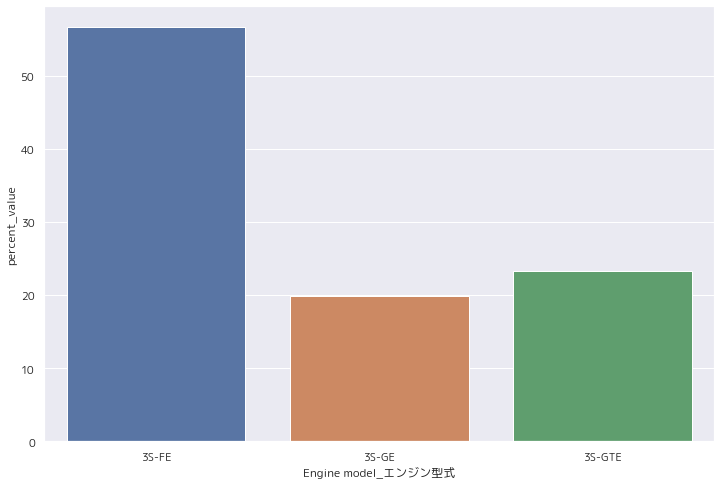

In [639]:
plt.figure(figsize=(12,8))
sns.barplot(x='Engine model_エンジン型式',y='percent_value',data=df_dt_em) 

# Engine model = 3S-FE

In [640]:
df_3S_FE = df_group.loc[('3S-FE')]
df_3S_FE

revenue  count
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                 
FF                4WD               AT    1997             223200.0      6
                                          1998             489200.0     14
                                          1999             582833.0     15
                                          2000             361000.0     15
                                          2001             429500.0     12
                                          2002             163000.0      5
                                          2006             145000.0      1
                                          2011              35000.0      1
                                    MT    1997             130000.0      1
                                          1998              40000.0      1
                                          1999              70000.0      2
                                          2001              87000.0      4
                                          2002              10000.0      1

In [641]:
df_tm = df_3S_FE.groupby(['TM_TM'])['revenue','count'].sum().reset_index()
df_tm['percent_value'] = round(df_tm['revenue'] / df_tm['revenue'].sum()*100 ,2)
df_tm

<ipython-input-641-a6eeba90d0a0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_tm = df_3S_FE.groupby(['TM_TM'])['revenue','count'].sum().reset_index()


,TM_TM,revenue,count,percent_value
0,AT,2428733.0,69,87.82
1,MT,337000.0,9,12.18


<AxesSubplot:xlabel='TM_TM', ylabel='percent_value'>

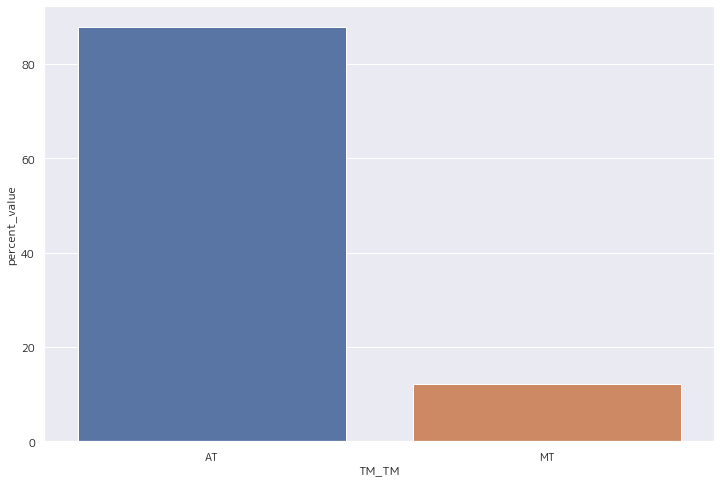

In [642]:
plt.figure(figsize=(12,8))
sns.barplot(x='TM_TM',y='percent_value',data=df_tm) 

In [643]:
df_AT = df_3S_FE.loc[('FF','4WD','AT')].reset_index()
df_AT['percent_value']  = round(df_AT['revenue']/df_AT['revenue'].sum()*100,2)
df_AT

,Năm sản xuất_年式,revenue,count,percent_value
0,1997,223200.0,6,9.19
1,1998,489200.0,14,20.14
2,1999,582833.0,15,24.00
3,2000,361000.0,15,14.86
4,2001,429500.0,12,17.68
5,2002,163000.0,5,6.71
6,2006,145000.0,1,5.97
7,2011,35000.0,1,1.44


<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

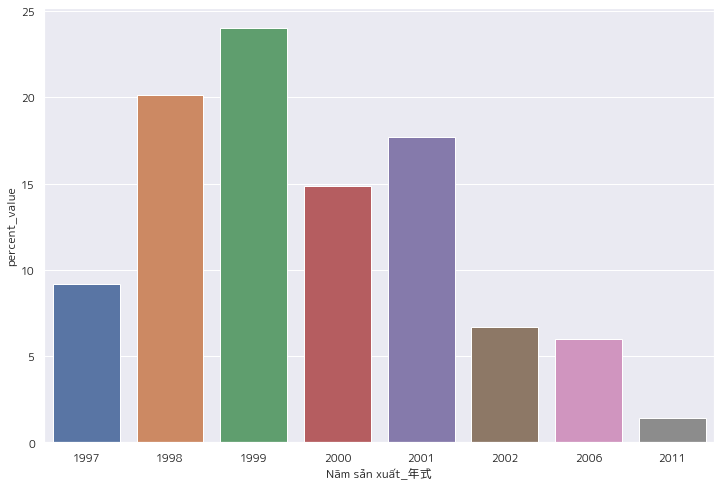

In [644]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_AT) 

In [645]:
df_MT = df_3S_FE.loc[('FF','4WD','MT')].reset_index()
df_MT['percent_value']  = round(df_MT['revenue']/df_MT['revenue'].sum()*100,2)
df_MT

,Năm sản xuất_年式,revenue,count,percent_value
0,1997,130000.0,1,38.58
1,1998,40000.0,1,11.87
2,1999,70000.0,2,20.77
3,2001,87000.0,4,25.82
4,2002,10000.0,1,2.97


<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

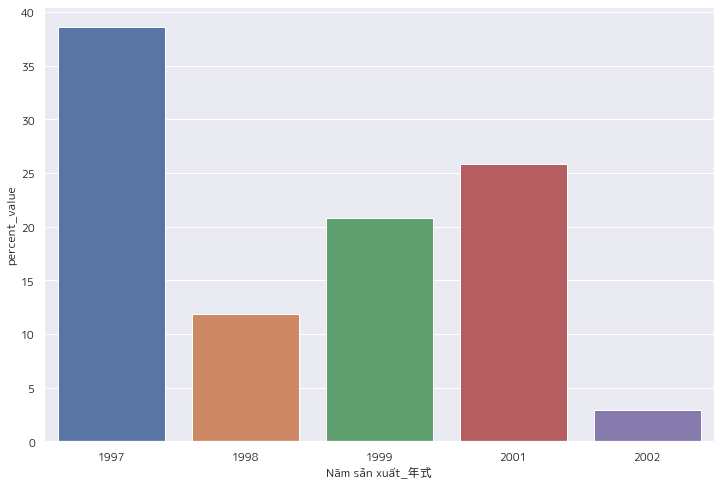

In [646]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_MT) 

# Engine model  = 3S-GE

In [647]:
df_3S_GE = df_group.loc[('3S-GE')]

In [648]:
df_3S_GE['percent_value'] = round(df_3S_GE['revenue']/df_3S_GE['revenue'].sum()*100,2)
df_3S_GE

<ipython-input-648-ff75820e84ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3S_GE['percent_value'] = round(df_3S_GE['revenue']/df_3S_GE['revenue'].sum()*100,2)


revenue  count  \
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                    
FF                4WD               AT    1997             322000.0     14   
                                          1998             336000.0      7   
                                          1999              95000.0      3   
                                          2000             150000.0      5   
                                          2001              70000.0      2   

                                                           percent_value  
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                 
FF                4WD               AT    1997                     33.09  
                                          1998                     34.53  
                                          1999                      9.76  
                                          2000                     15.42  
                                          2001                      7.19

<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

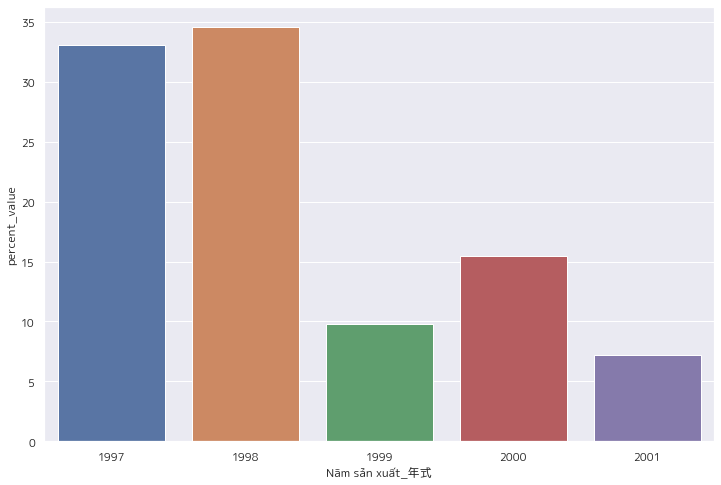

In [649]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_3S_GE.reset_index()) 

# Engine model =  3S-GTE

In [650]:
df_3S_GTE = df_group.loc[('3S-GTE')]
df_3S_GTE['percent_value'] = round(df_3S_GTE['revenue']/df_3S_GTE['revenue'].sum()*100,2)
df_3S_GTE

<ipython-input-650-cfc62ce8d3af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3S_GTE['percent_value'] = round(df_3S_GTE['revenue']/df_3S_GTE['revenue'].sum()*100,2)


revenue  count  \
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                    
FF                4WD               AT    1997             248000.0      6   
                                          1998             196000.0      4   
                                          1999             420000.0      9   
                                          2000               8000.0      1   
                                    MT    1998             108000.0      3   
                                          2000             160000.0      3   

                                                           percent_value  
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                 
FF                4WD               AT    1997                     21.75  
                                          1998                     17.19  
                                          1999                     36.84  
                                          2000                      0.70  
                                    MT    1998                      9.47  
                                          2000                     14.04

In [663]:
df_dt_em = df_3S_GTE.loc[('FF','4WD')].groupby('TM_TM')['revenue'].sum().reset_index(name='sum')
df_dt_em['percent_value']  = round(df_dt_em['sum']/df_3S_GTE['revenue'].sum()*100,2)
df_dt_em

KeyError: 'FF'

<AxesSubplot:xlabel='TM_TM', ylabel='percent_value'>

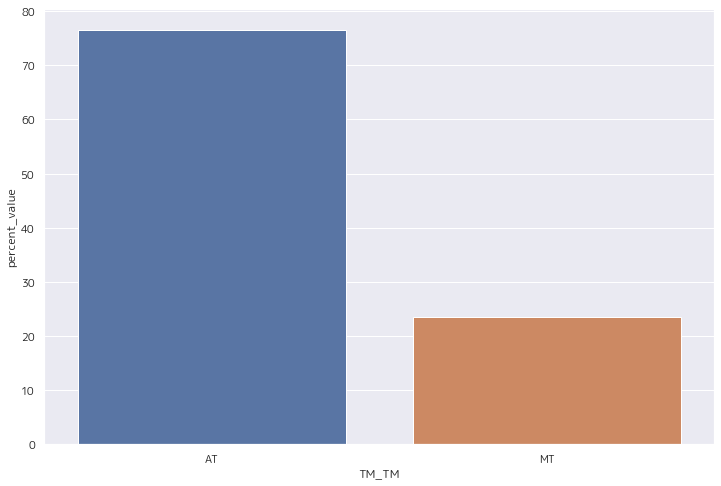

In [652]:
plt.figure(figsize=(12,8))
sns.barplot(x='TM_TM',y='percent_value',data=df_dt_em.reset_index()) 

In [520]:
df_AT = df_3S_GTE.loc[('FF','4WD','AT')].reset_index()
df_AT['percent_value']  = round(df_AT['revenue']/df_AT['revenue'].sum()*100,2)
df_AT

,Năm sản xuất_年式,revenue,count,percent_value
0,1997,248000.0,6,28.44
1,1998,196000.0,4,22.48
2,1999,420000.0,9,48.17
3,2000,8000.0,1,0.92


<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

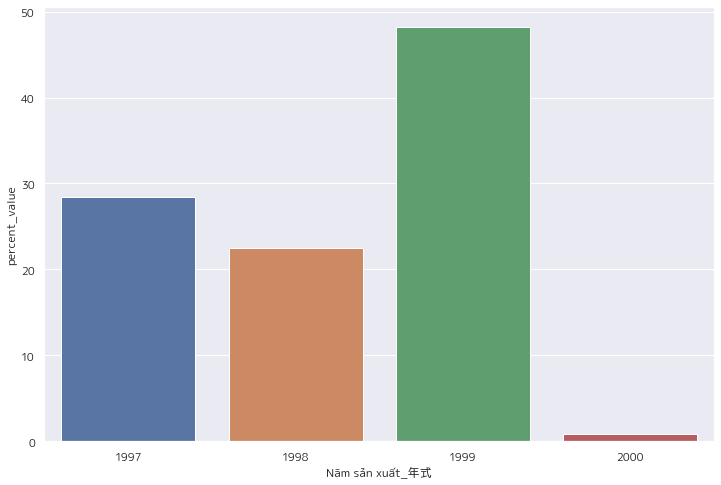

In [521]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_AT)

In [522]:
df_MT = df_3S_GTE.loc[('FF','4WD','MT')].reset_index()
df_MT['percent_value']  = round(df_MT['revenue']/df_MT['revenue'].sum()*100,2)
df_MT

,Năm sản xuất_年式,revenue,count,percent_value
0,1998,108000.0,3,40.3
1,2000,160000.0,3,59.7


<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

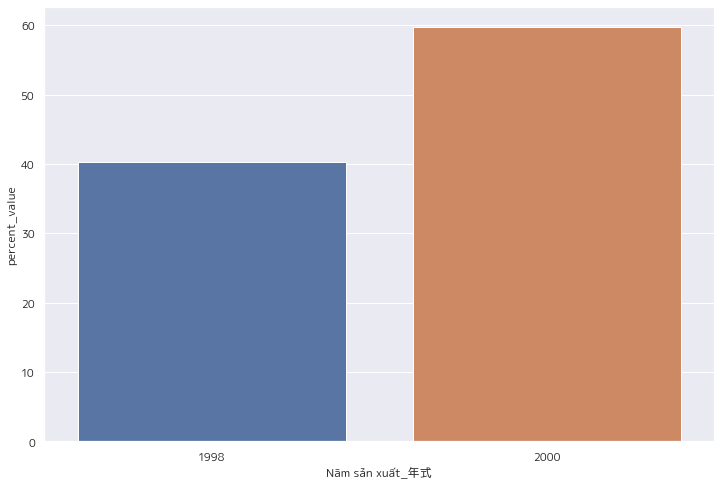

In [523]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_MT)

# Model xe =  ST195

In [655]:
df_ST195 = df_カルディナ[df_カルディナ['Model xe_車輌型式'] == 'ST195']
for col in df_ST215.columns:
    print(str(col) + ": "+str(df_ST195[col].unique()))

Tên xe_車名: ['カルディナ']
Model xe_車輌型式: ['ST195']
Engine model_エンジン型式: ['3S-GE' '3S-FE']
Truyền động 1_駆動1: ['FF']
Truyền động 2_駆動2: ['4WD' '2WD']
TM_TM: ['AT' 'MT']
Năm sản xuất_年式: [1996 1994 1995 1997 1993    0]
D/G_Ｄ／Ｇ: ['G']
Thành tích bán ra_販売実績: [ 35000.  10000. 100000.  25000.  20000.  30000. 138000.  90000. 130000.
  38000.  45000.   8000.  28000.  40000.  33000.]


In [656]:
df_group = df_ST195.groupby(['Engine model_エンジン型式','Truyền động 1_駆動1','Truyền động 2_駆動2','TM_TM','Năm sản xuất_年式']).agg(revenue = ('Thành tích bán ra_販売実績', 'sum'),count = ('Engine model_エンジン型式','count'))
df_group

revenue  \
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式             
3S-FE               FF                2WD               AT    1994              30000.0   
                                      4WD               AT    0                  8000.0   
                                                              1993              50000.0   
                                                              1994             366000.0   
                                                              1995             474000.0   
                                                              1996             997000.0   
                                                              1997             368000.0   
                                                        MT    1994              48000.0   
                                                              1996              40000.0   
                                                              1997              10000.0   
3S-GE               FF                4WD               AT    1995              88000.0   
                                                              1996             441000.0   
                                                              1997              30000.0   
                                                        MT    1996              90000.0   

                                                                               count  
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式         
3S-FE               FF                2WD               AT    1994                 1  
                                      4WD               AT    0                    1  
                                                              1993                 3  
                                                              1994                13  
                                                              1995                19  
                                                              1996                31  
                                                              1997                12  
                                                        MT    1994                 2  
                                                              1996                 2  
                                                              1997                 1  
3S-GE               FF                4WD               AT    1995                 4  
                                                              1996                11  
                                                              1997                 1  
                                                        MT    1996                 1

In [657]:
df_dt_em = df_ST195.groupby('Engine model_エンジン型式')['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
df_dt_em['percent_value']  = round(df_dt_em['sum']/df_ST195['Thành tích bán ra_販売実績'].sum()*100,2)
df_dt_em

,Engine model_エンジン型式,sum,percent_value
0,3S-FE,2391000.0,78.65
1,3S-GE,649000.0,21.35


<AxesSubplot:xlabel='Engine model_エンジン型式', ylabel='percent_value'>

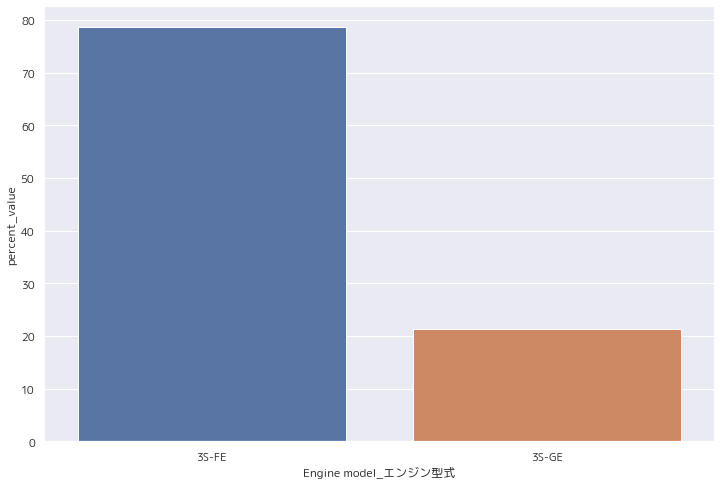

In [658]:
plt.figure(figsize=(12,8))
sns.barplot(x='Engine model_エンジン型式',y='percent_value',data=df_dt_em)

# Engine Model  = 3S-FE

In [659]:
df_3S_FE = df_group.loc[('3S-FE')]
df_3S_FE

revenue  count
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                 
FF                2WD               AT    1994              30000.0      1
                  4WD               AT    0                  8000.0      1
                                          1993              50000.0      3
                                          1994             366000.0     13
                                          1995             474000.0     19
                                          1996             997000.0     31
                                          1997             368000.0     12
                                    MT    1994              48000.0      2
                                          1996              40000.0      2
                                          1997              10000.0      1

In [660]:
df_td2  = df_3S_FE.groupby(['Truyền động 2_駆動2'])['revenue'].sum().reset_index()
df_td2['percent_value']  = round(df_td2['revenue'] / df_td2['revenue'].sum()*100,2)
df_td2

,Truyền động 2_駆動2,revenue,percent_value
0,2WD,30000.0,1.25
1,4WD,2361000.0,98.75


<AxesSubplot:xlabel='Truyền động 2_駆動2', ylabel='percent_value'>

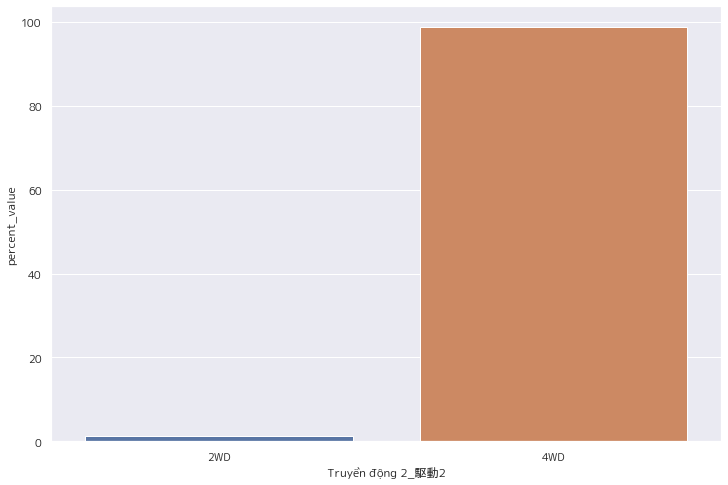

In [530]:
plt.figure(figsize=(12,8))
sns.barplot(x='Truyền động 2_駆動2',y='percent_value',data=df_td2)

In [662]:
df_dt_em = df_3S_FE.groupby('Engine model_エンジン型式')['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
df_dt_em['percent_value']  = round(df_dt_em['sum']/df_ST195['Thành tích bán ra_販売実績'].sum()*100,2)
df_dt_em

<ipython-input-662-26326e26eb34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3S_GTE['percent_value']  = round(df_3S_GTE['revenue']/df_3S_GTE['revenue'].sum()*100,2)


revenue  count  percent_value
TM_TM Năm sản xuất_年式                                
AT    0                  8000.0      1           0.34
      1993              50000.0      3           2.12
      1994             366000.0     13          15.50
      1995             474000.0     19          20.08
      1996             997000.0     31          42.23
      1997             368000.0     12          15.59
MT    1994              48000.0      2           2.03
      1996              40000.0      2           1.69
      1997              10000.0      1           0.42

In [669]:
df_AT = df_3S_FE.loc[('FF','4WD')]
df_dt = df_3S_FE.groupby(['TM_TM'])['revenue'].sum().reset_index()
df_dt['percent_value']  = round(df_dt['revenue']/df_dt['revenue'].sum()*100,2)
df_dt

,TM_TM,revenue,percent_value
0,AT,2293000.0,95.9
1,MT,98000.0,4.1


<AxesSubplot:xlabel='TM_TM', ylabel='percent_value'>

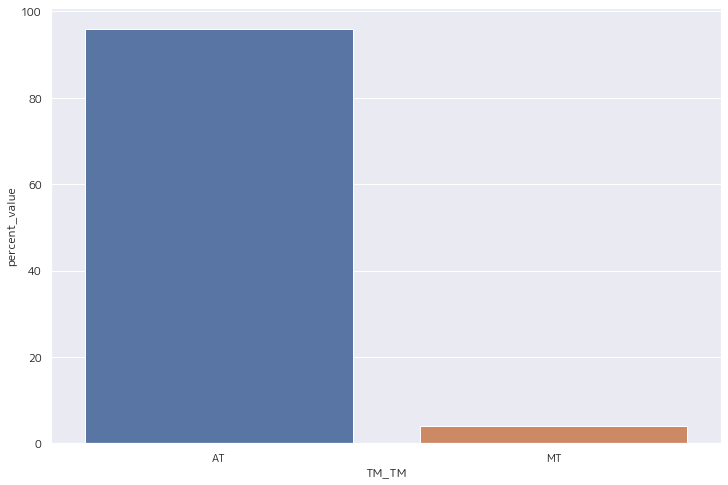

In [670]:
plt.figure(figsize=(12,8))
sns.barplot(x='TM_TM',y='percent_value',data=df_dt)

In [671]:
df_AT = df_3S_FE.loc[('FF','4WD','AT')].reset_index()
df_AT['percent_value']  = round(df_AT['revenue']/df_AT['revenue'].sum()*100,2)
df_AT

,Năm sản xuất_年式,revenue,count,percent_value
0,0,8000.0,1,0.35
1,1993,50000.0,3,2.21
2,1994,366000.0,13,16.17
3,1995,474000.0,19,20.95
4,1996,997000.0,31,44.06
5,1997,368000.0,12,16.26


<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

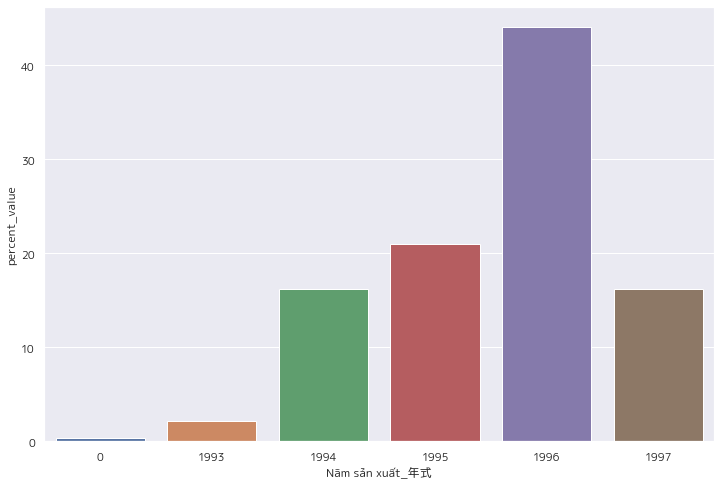

In [672]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_AT)

In [533]:
df_MT = df_3S_FE.loc[('FF','4WD','MT')].reset_index()
df_MT['percent_value']  = round(df_MT['revenue']/df_MT['revenue'].sum()*100,2)
df_MT

,Năm sản xuất_年式,revenue,count,percent_value
0,1994,48000.0,2,48.98
1,1996,40000.0,2,40.82
2,1997,10000.0,1,10.20


<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

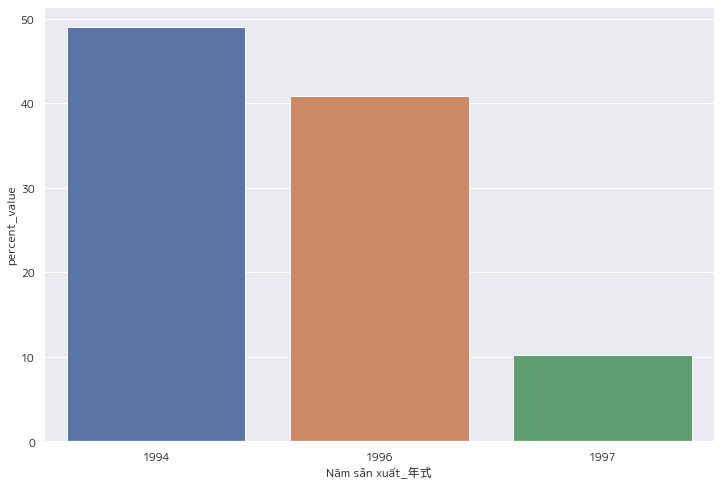

In [534]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_MT)

# Engine Model  = 3S-GE

In [535]:
df_3S_GE = df_group.loc[('3S-GE')]
df_3S_GE['percent_value']  = round(df_3S_GE['revenue']/df_3S_GE['revenue'].sum()*100,2)
df_3S_GE

<ipython-input-535-bfa9e5a22b99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3S_GE['percent_value']  = round(df_3S_GE['revenue']/df_3S_GE['revenue'].sum()*100,2)


revenue  count  \
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                    
FF                4WD               AT    1995              88000.0      4   
                                          1996             441000.0     11   
                                          1997              30000.0      1   
                                    MT    1996              90000.0      1   

                                                           percent_value  
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                 
FF                4WD               AT    1995                     13.56  
                                          1996                     67.95  
                                          1997                      4.62  
                                    MT    1996                     13.87

<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

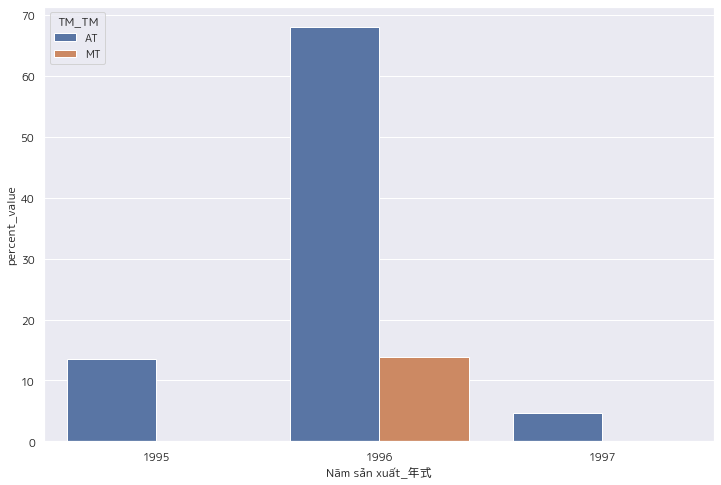

In [536]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',hue ='TM_TM',data=df_3S_GE.reset_index(),ci = None)

# Engine model =  3S-GTE

In [537]:
# df_3S_GTE = df_group.loc[('3S-GTE')]
# df_3S_GTE['percent_value']  = round(df_3S_GTE['revenue']/df_3S_GTE['revenue'].sum()*100,2)
# df_3S_GTE

<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

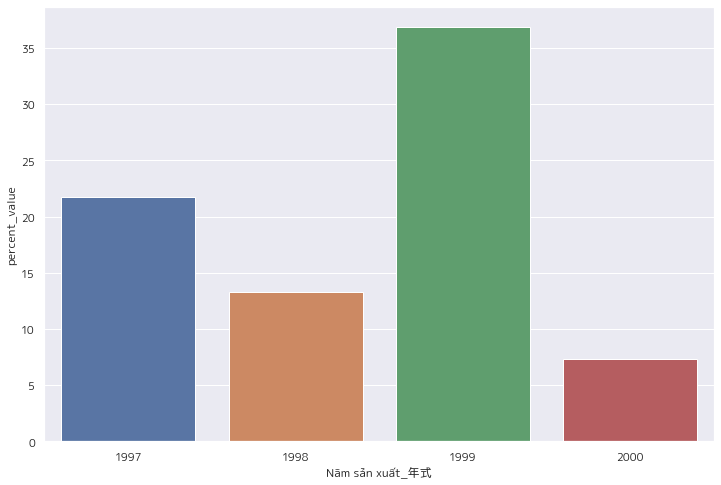

In [538]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_3S_GTE.reset_index(), ci= None)

# Model xe = ET196

In [673]:
df_ET196 = df_カルディナ[df_カルディナ['Model xe_車輌型式'] == 'ET196']
for col in df_ET196.columns:
    print(str(col) + ": "+str(df_ET196[col].unique()))

Tên xe_車名: ['カルディナ']
Model xe_車輌型式: ['ET196']
Engine model_エンジン型式: ['5E-FE']
Truyền động 1_駆動1: ['FF']
Truyền động 2_駆動2: ['2WD']
TM_TM: ['AT' 'MT']
Năm sản xuất_年式: [1999 1994 1996 1993 2000 1995 1997 1998 1992 2001]
D/G_Ｄ／Ｇ: ['G']
Thành tích bán ra_販売実績: [ 75000.  25000.  70000. 110000. 100000.  10000.  45000.  23000.  50000.
 210000.  80000.  35000.  90000.]


In [677]:
df_group = df_ET196.groupby(['Engine model_エンジン型式','Truyền động 1_駆動1','Truyền động 2_駆動2','TM_TM','Năm sản xuất_年式']).agg(revenue = ('Thành tích bán ra_販売実績', 'sum'),count = ('Engine model_エンジン型式','count'))
df_group ['percent_value']  = round(df_group['revenue']/df_group['revenue'].sum()*100,2)
df_group

revenue  \
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式             
5E-FE               FF                2WD               AT    1992             210000.0   
                                                              1993              48000.0   
                                                              1994             400000.0   
                                                              1995             210000.0   
                                                              1996             360000.0   
                                                              1997             125000.0   
                                                              1998             440000.0   
                                                              1999             270000.0   
                                                              2000             215000.0   
                                                              2001              90000.0   
                                                        MT    1996              80000.0   
                                                              1997             110000.0   

                                                                               count  \
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式          
5E-FE               FF                2WD               AT    1992                 1   
                                                              1993                 2   
                                                              1994                 5   
                                                              1995                 3   
                                                              1996                 5   
                                                              1997                 2   
                                                              1998                 8   
                                                              1999                 5   
                                                              2000                 3   
                                                              2001                 1   
                                                        MT    1996                 1   
                                                              1997                 1   

                                                                               percent_value  
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                 
5E-FE               FF                2WD               AT    1992                      8.21  
                                                              1993                      1.88  
                                                              1994                     15.64  
                                                              1995                      8.21  
                                                              1996                     14.07  
                                                              1997                      4.89  
                                                              1998                     17.20  
                                                              1999                     10.56  
                                                              2000                      8.41  
                                                              2001                      3.52  
                                                        MT    1996                      3.13  
                                                              1997                      4.30

In [675]:
df_AT = df_group.loc[('5E-FE','FF','2WD','AT')].reset_index()
df_AT['percent_value']  = round(df_AT['revenue']/df_AT['revenue'].sum()*100,2)
df_AT

,Năm sản xuất_年式,revenue,count,percent_value
0,1992,210000.0,1,8.87
1,1993,48000.0,2,2.03
2,1994,400000.0,5,16.89
3,1995,210000.0,3,8.87
4,1996,360000.0,5,15.20
5,1997,125000.0,2,5.28
6,1998,440000.0,8,18.58
7,1999,270000.0,5,11.40
8,2000,215000.0,3,9.08
9,2001,90000.0,1,3.80


<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

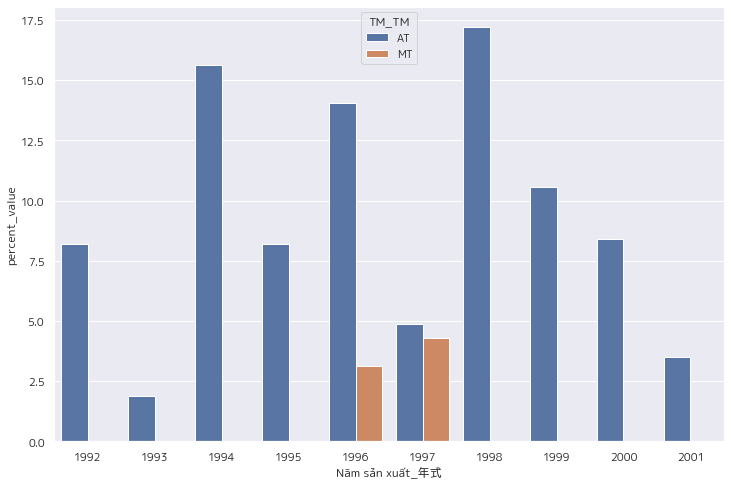

In [678]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',hue ='TM_TM',data=df_group.reset_index(),ci = None)

<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

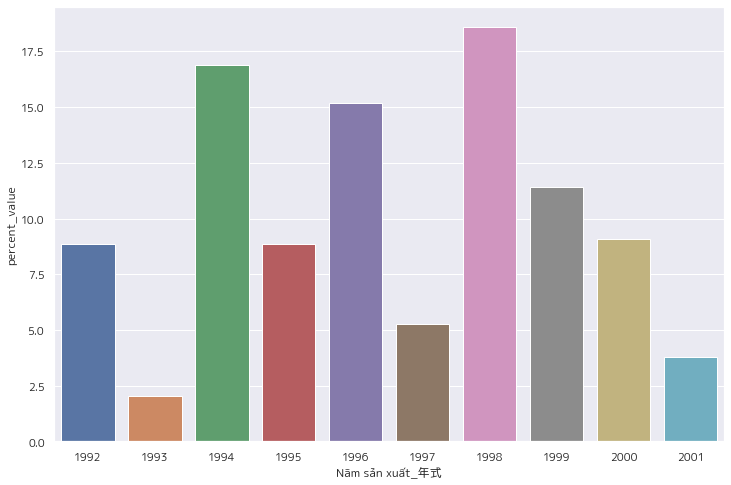

In [542]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_AT, ci= None)

In [543]:
df_MT = df_group.loc[('5E-FE','FF','2WD','MT')].reset_index()
df_MT['percent_value']  = round(df_MT['revenue']/df_MT['revenue'].sum()*100,2)
df_MT

,Năm sản xuất_年式,revenue,count,percent_value
0,1996,80000.0,1,42.11
1,1997,110000.0,1,57.89


<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

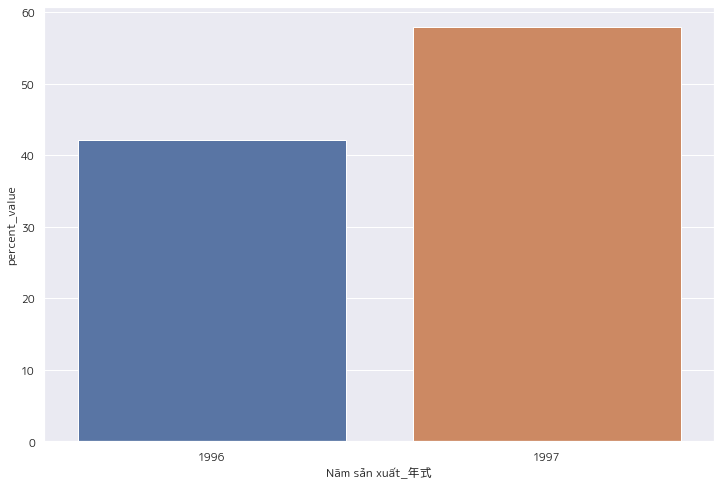

In [544]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_MT, ci= None)

# Model xe = AT211

In [545]:
df_AT211 = df_カルディナ[df_カルディナ['Model xe_車輌型式'] == 'AT211']
for col in df_AT211.columns:
    print(str(col) + ": "+str(df_AT211[col].unique()))

Tên xe_車名: ['カルディナ']
Model xe_車輌型式: ['AT211']
Engine model_エンジン型式: ['7A-FE ' '7A-FE']
Truyền động 1_駆動1: ['FF']
Truyền động 2_駆動2: ['2WD']
TM_TM: ['MT' 'AT']
Năm sản xuất_年式: [1999 2002 1998 2001 2000 1997    0]
D/G_Ｄ／Ｇ: ['G']
Thành tích bán ra_販売実績: [ 30000.  10000.  35000.  33000.  45000.  25000.  38000. 118000. 130000.
 160000. 140000. 158000.  12000.]


In [546]:
df_group = df_AT211.groupby(['Engine model_エンジン型式','Truyền động 1_駆動1','Truyền động 2_駆動2','TM_TM','Năm sản xuất_年式']).agg(revenue = ('Thành tích bán ra_販売実績', 'sum'),count = ('Engine model_エンジン型式','count'))
df_group = df_group.reset_index()
df_group

,Engine model_エンジン型式,Truyền động 1_駆動1,Truyền động 2_駆動2,TM_TM,Năm sản xuất_年式,revenue,count
0,7A-FE,FF,2WD,AT,0,130000.0,1
1,7A-FE,FF,2WD,AT,1997,120000.0,3
2,7A-FE,FF,2WD,AT,1998,460000.0,11
3,7A-FE,FF,2WD,AT,1999,289000.0,6
4,7A-FE,FF,2WD,AT,2000,484000.0,10
5,7A-FE,FF,2WD,AT,2001,176000.0,6
6,7A-FE,FF,2WD,AT,2002,141000.0,4
7,7A-FE,FF,2WD,MT,1999,45000.0,2
8,7A-FE,FF,2WD,AT,2000,35000.0,1
9,7A-FE,FF,2WD,MT,1999,40000.0,2


In [547]:
df_AT = df_group[df_group['TM_TM'] == 'AT']
df_AT['percent_value']  = round(df_AT['revenue']/df_AT['revenue'].sum()*100,2)
df_AT

<ipython-input-547-6be32043de0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AT['percent_value']  = round(df_AT['revenue']/df_AT['revenue'].sum()*100,2)


,Engine model_エンジン型式,Truyền động 1_駆動1,Truyền động 2_駆動2,TM_TM,Năm sản xuất_年式,revenue,count,percent_value
0,7A-FE,FF,2WD,AT,0,130000.0,1,7.08
1,7A-FE,FF,2WD,AT,1997,120000.0,3,6.54
2,7A-FE,FF,2WD,AT,1998,460000.0,11,25.07
3,7A-FE,FF,2WD,AT,1999,289000.0,6,15.75
4,7A-FE,FF,2WD,AT,2000,484000.0,10,26.38
5,7A-FE,FF,2WD,AT,2001,176000.0,6,9.59
6,7A-FE,FF,2WD,AT,2002,141000.0,4,7.68
8,7A-FE,FF,2WD,AT,2000,35000.0,1,1.91


<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

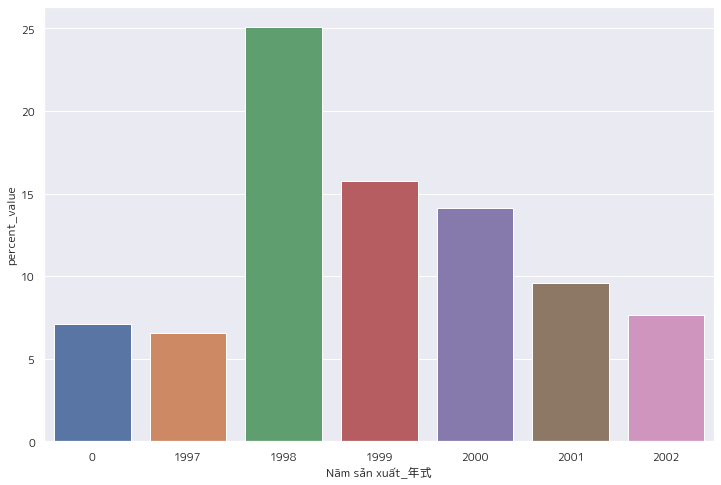

In [548]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_AT, ci= None)

In [549]:
df_MT = df_group[df_group['TM_TM'] == 'MT']
df_MT['percent_value']  = round(df_MT['revenue']/df_MT['revenue'].sum()*100,2)
df_MT

<ipython-input-549-276c42427452>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MT['percent_value']  = round(df_MT['revenue']/df_MT['revenue'].sum()*100,2)


,Engine model_エンジン型式,Truyền động 1_駆動1,Truyền động 2_駆動2,TM_TM,Năm sản xuất_年式,revenue,count,percent_value
7,7A-FE,FF,2WD,MT,1999,45000.0,2,52.94
9,7A-FE,FF,2WD,MT,1999,40000.0,2,47.06


<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

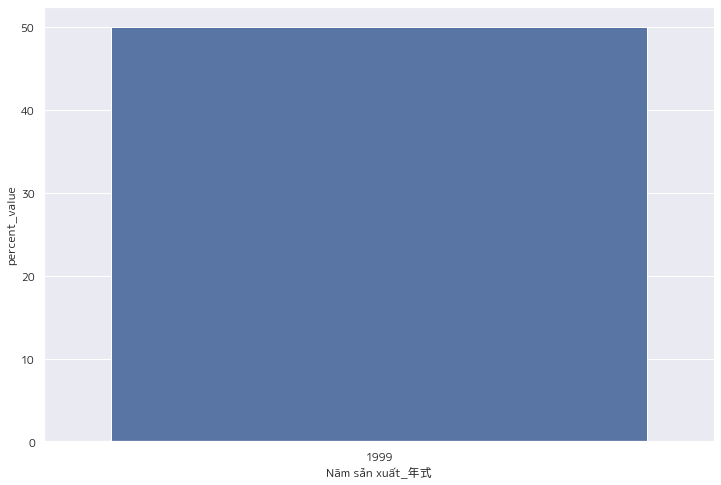

In [550]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_MT, ci= None)

# Tên xe  =  ｸﾗｳﾝ

In [551]:
df_ｸﾗｳﾝ = df_spec[df_spec['Tên xe_車名'] == 'ｸﾗｳﾝ']
df_ｸﾗｳﾝ.nunique()

Tên xe_車名                  1
Model xe_車輌型式             28
Engine model_エンジン型式       17
Truyền động 1_駆動1          3
Truyền động 2_駆動2          3
TM_TM                      3
Năm sản xuất_年式           25
D/G_Ｄ／Ｇ                    2
Thành tích bán ra_販売実績    45
dtype: int64

In [552]:
for col in df_ｸﾗｳﾝ.columns:
    print(str(col) + ": "+str(df_ｸﾗｳﾝ[col].unique()))

Tên xe_車名: ['ｸﾗｳﾝ']
Model xe_車輌型式: ['JZS171' 'JZS155' 'JZS151' 'GS136' 'GS151' 'JZS179' 'JZS173' 'GRS183'
 'GS131' 'GRS182' 'JZS153' 'GS130' 'GS171' 'JZS175' 'JZS157' 'GRS180'
 'JKS175' 'GS141' 'UZS131' 'GRS200' 'GRS181' 'GXS12' 'JZS130' 'JZS145'
 'JZS141' 'LS130' 'LS151' 'MS137']
Engine model_エンジン型式: ['1JZ-GE' '2JZ-GE' '1JZ-GE VVT-i' '1G-FE' '3GR-FSE' '1JZ-GTE' '2JZ-FSE'
 '4GR-FSE' '1JZ-FSE' '1UZ-FE' '1G-EU' '1G-GE' '1G-GZE' '1JZ-GTTE' '2L-THE'
 '2L-TE' '7M-GE']
Truyền động 1_駆動1: ['FR' 'W/O' 'FF']
Truyền động 2_駆動2: ['2WD' '4WD' 'W/O']
TM_TM: ['AT' 'MT' 'W/O']
Năm sản xuất_年式: [1999 1996 1998 1997 2000 2003 1995 2001 2007 1990 2006    0 2004 2002
 1985 1991 2008 2009 2005 2015 1994 1989 1992 1993 1988]
D/G_Ｄ／Ｇ: ['G' 'D']
Thành tích bán ra_販売実績: [ 10000.   35000.   30000.    5000.   28000.   45000.   25000.   65000.
  17000.   26000.   70000.   40000.   38000.  130000.  120370.   55000.
  12000.   50000.   60000.   75000.    8000.  160000.  150000.   80000.
  85000.  270000.   39500. 

<ipython-input-553-65cc9fb8d0c2>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 60)
<ipython-input-553-65cc9fb8d0c2>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 60)
<ipython-input-553-65cc9fb8d0c2>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticks(),size =60)


Text(0.5, 0, 'Model xe_車輌型式')

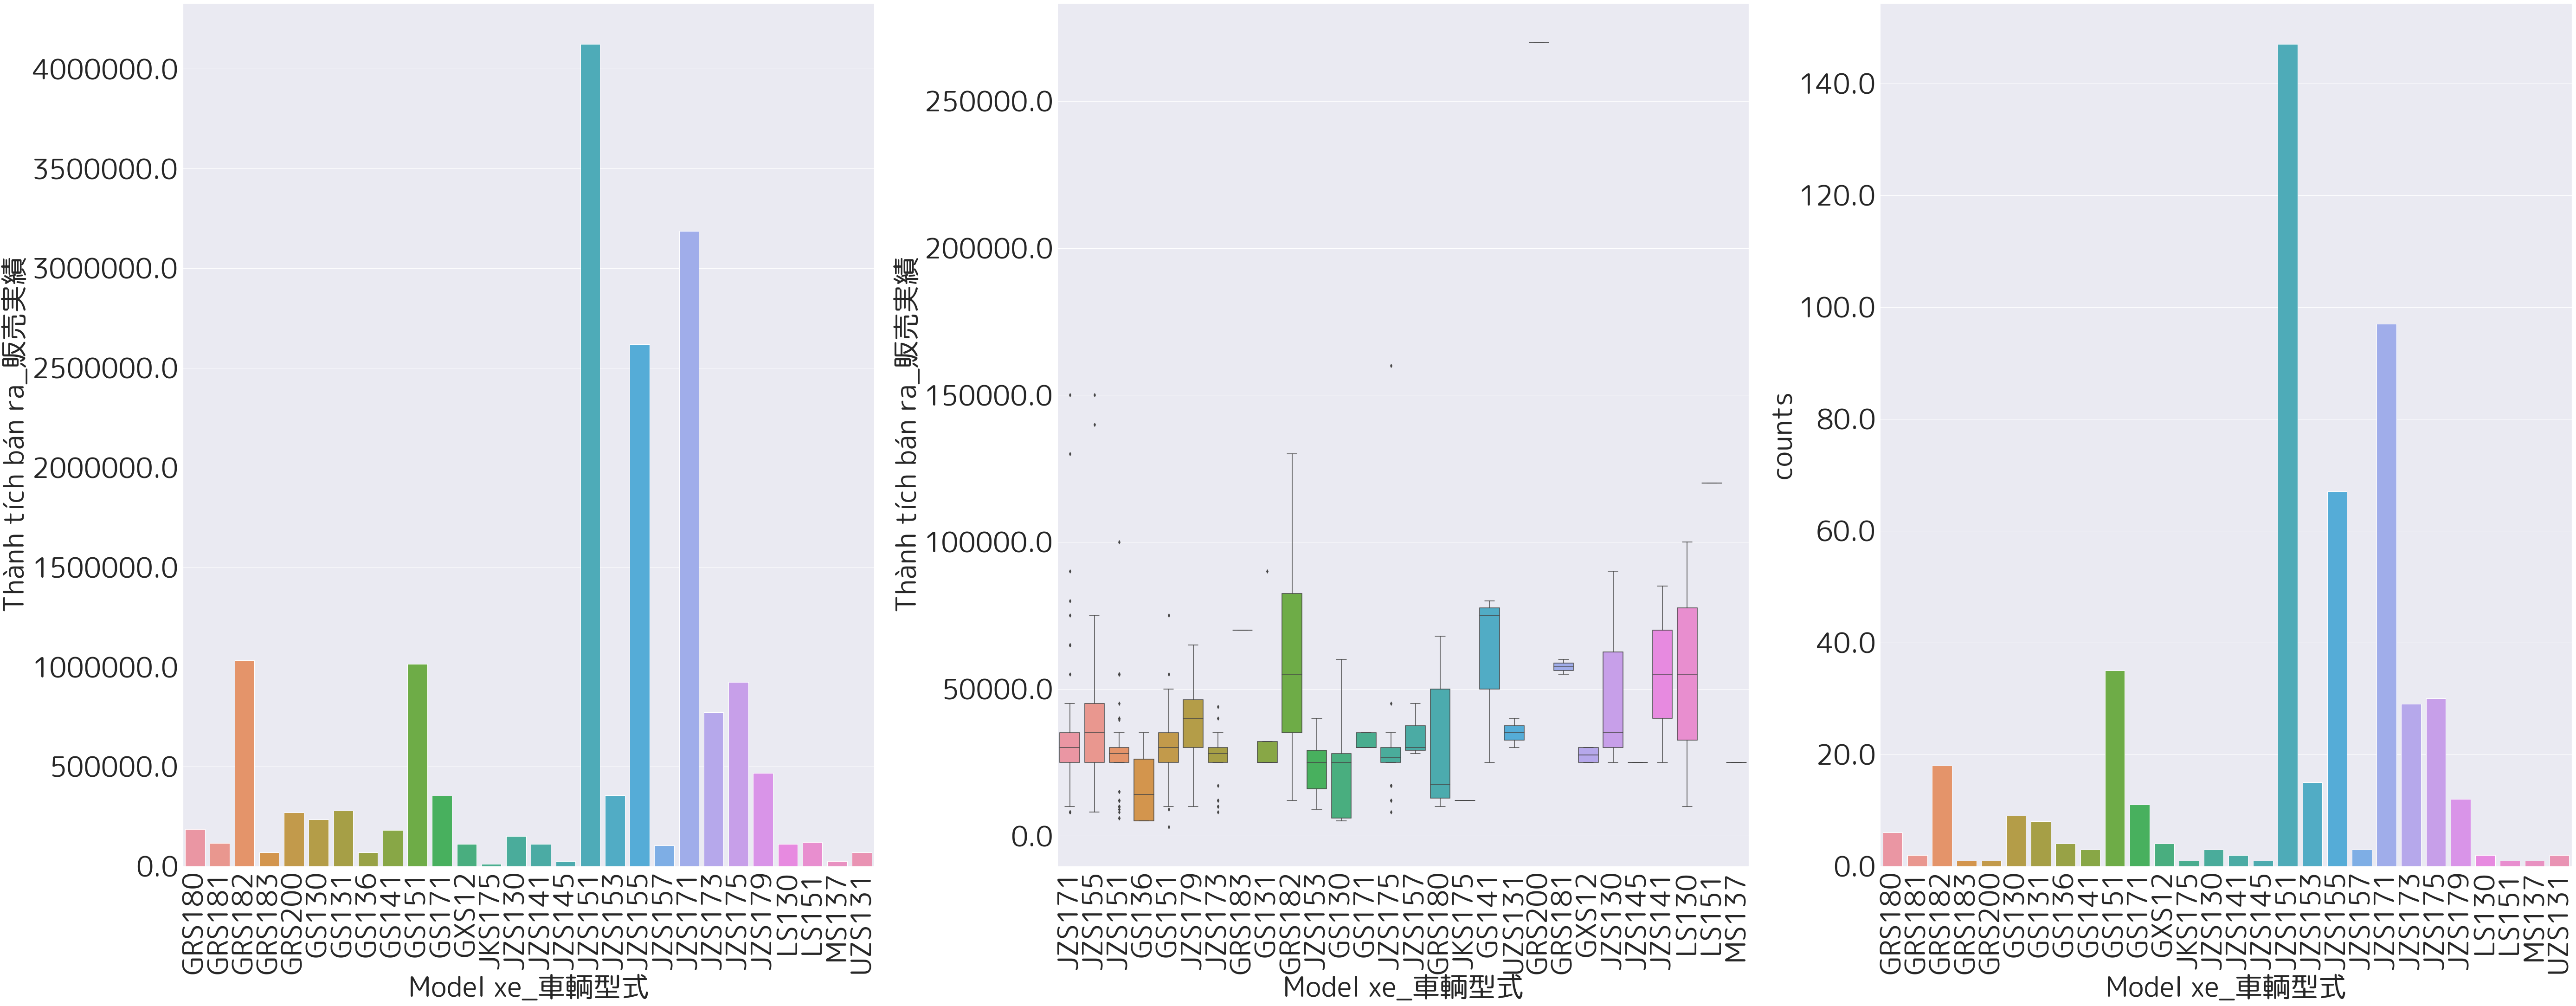

In [553]:
count_model =df_ｸﾗｳﾝ.groupby(['Model xe_車輌型式'])['Model xe_車輌型式'].count().reset_index(name='counts')
sum_model = df_ｸﾗｳﾝ.groupby(['Model xe_車輌型式'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
fig, axs = plt.subplots(1, 3, sharex=False, figsize=(77, 30),constrained_layout=True)
p = sns.barplot(x='Model xe_車輌型式',y='sum',data=sum_model,ax=axs[0],ci=None)
q = sns.boxplot(x='Model xe_車輌型式',y='Thành tích bán ra_販売実績',data=df_ｸﾗｳﾝ,ax=axs[1])
r = sns.barplot(x='Model xe_車輌型式',y='counts',data=count_model,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =60,rotation=90)
q.set_xticklabels(q.get_xticklabels(),size =60,rotation=90)
r.set_xticklabels(r.get_xticklabels(),size =60,rotation=90)
p.set_yticklabels(p.get_yticks(), size = 60)
q.set_yticklabels(q.get_yticks(), size = 60)
r.set_yticklabels(r.get_yticks(),size =60)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 60)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 60)
r.set_ylabel("counts",fontsize = 60)
p.set_xlabel("Model xe_車輌型式",fontsize = 60)
q.set_xlabel("Model xe_車輌型式",fontsize = 60)
r.set_xlabel("Model xe_車輌型式",fontsize = 60)

# Model xe  = JZS151

In [554]:
df_JZS151 = df_ｸﾗｳﾝ[df_ｸﾗｳﾝ['Model xe_車輌型式'] == 'JZS151']
for col in df_JZS151.columns:
    print(str(col) + ": "+str(df_JZS151[col].unique()))

Tên xe_車名: ['ｸﾗｳﾝ']
Model xe_車輌型式: ['JZS151']
Engine model_エンジン型式: ['1JZ-GE VVT-i' '1JZ-GE']
Truyền động 1_駆動1: ['FR']
Truyền động 2_駆動2: ['2WD' '4WD']
TM_TM: ['AT']
Năm sản xuất_年式: [1998 1996 1995    0 1997 1999 2007 2008]
D/G_Ｄ／Ｇ: ['G']
Thành tích bán ra_販売実績: [ 30000.  28000.  45000.  25000.  10000.  35000.  12000.  55000.  39500.
  40000.   9000.   6000.  27000.  15000. 100000.   8000.]


In [555]:
df_group = df_JZS151.groupby(['Engine model_エンジン型式','Truyền động 1_駆動1','Truyền động 2_駆動2','TM_TM','Năm sản xuất_年式']).agg(revenue = ('Thành tích bán ra_販売実績', 'sum'),count = ('Engine model_エンジン型式','count'))
df_group

revenue  \
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式              
1JZ-GE              FR                2WD               AT    0                 100000.0   
                                                              1995              155000.0   
                                                              1996              516000.0   
                                                              1997             1344000.0   
                                                              1998              809000.0   
                                                              1999              839500.0   
                                                              2007               30000.0   
                                                              2008               28000.0   
                                      4WD               AT    1998               47000.0   
1JZ-GE VVT-i        FR                2WD               AT    1996               30000.0   
                                                              1997               95000.0   
                                                              1998               95000.0   
                                                              1999               35000.0   

                                                                               count  
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式         
1JZ-GE              FR                2WD               AT    0                    4  
                                                              1995                 5  
                                                              1996                16  
                                                              1997                48  
                                                              1998                27  
                                                              1999                32  
                                                              2007                 1  
                                                              2008                 1  
                                      4WD               AT    1998                 2  
1JZ-GE VVT-i        FR                2WD               AT    1996                 1  
                                                              1997                 4  
                                                              1998                 4  
                                                              1999                 2

In [556]:
df_dt_em = df_group.groupby(['Engine model_エンジン型式'])['revenue'].sum().reset_index()
df_dt_em['percent_value'] = round(df_dt_em['revenue']/df_dt_em['revenue'].sum()*100,2)

<AxesSubplot:xlabel='Engine model_エンジン型式', ylabel='percent_value'>

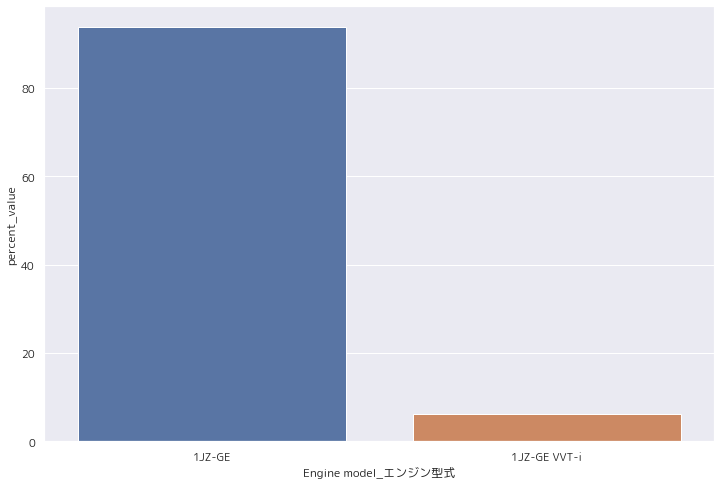

In [557]:
plt.figure(figsize=(12,8))
sns.barplot(x='Engine model_エンジン型式',y='percent_value',data=df_dt_em, ci=None)

# Engine model = 1JZ-GE

In [558]:
df_1JZ_GE = df_group.loc[('1JZ-GE')]
df_1JZ_GE['percent_value'] = round(df_1JZ_GE['revenue']/df_1JZ_GE['revenue'].sum()*100,2)
df_1JZ_GE

<ipython-input-558-fee3a68b6b1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1JZ_GE['percent_value'] = round(df_1JZ_GE['revenue']/df_1JZ_GE['revenue'].sum()*100,2)


revenue  count  \
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                     
FR                2WD               AT    0                 100000.0      4   
                                          1995              155000.0      5   
                                          1996              516000.0     16   
                                          1997             1344000.0     48   
                                          1998              809000.0     27   
                                          1999              839500.0     32   
                                          2007               30000.0      1   
                                          2008               28000.0      1   
                  4WD               AT    1998               47000.0      2   

                                                           percent_value  
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                 
FR                2WD               AT    0                         2.58  
                                          1995                      4.01  
                                          1996                     13.34  
                                          1997                     34.74  
                                          1998                     20.91  
                                          1999                     21.70  
                                          2007                      0.78  
                                          2008                      0.72  
                  4WD               AT    1998                      1.21

<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

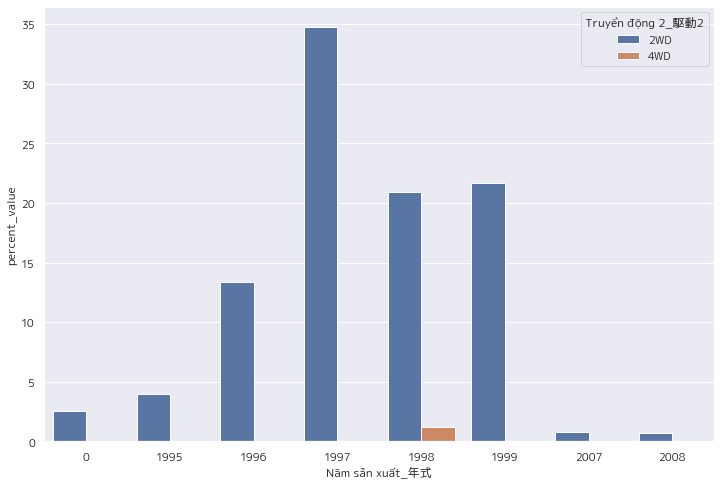

In [559]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',hue='Truyền động 2_駆動2',data=df_1JZ_GE.reset_index(), ci= None)

# Engine Model = 1JZ-GE VVT-i

In [560]:
df_1JZ_GE_VVT_i = df_group.loc[('1JZ-GE VVT-i')]
df_1JZ_GE_VVT_i['percent_value'] = round(df_1JZ_GE_VVT_i['revenue']/df_1JZ_GE_VVT_i['revenue'].sum()*100,2)
df_1JZ_GE_VVT_i

<ipython-input-560-657f6d895f58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1JZ_GE_VVT_i['percent_value'] = round(df_1JZ_GE_VVT_i['revenue']/df_1JZ_GE_VVT_i['revenue'].sum()*100,2)


revenue  count  \
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                   
FR                2WD               AT    1996             30000.0      1   
                                          1997             95000.0      4   
                                          1998             95000.0      4   
                                          1999             35000.0      2   

                                                           percent_value  
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                 
FR                2WD               AT    1996                     11.76  
                                          1997                     37.25  
                                          1998                     37.25  
                                          1999                     13.73

<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

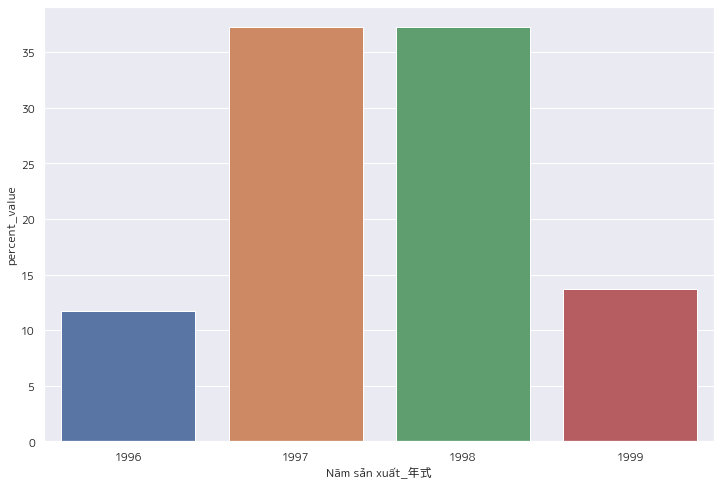

In [561]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_1JZ_GE_VVT_i.reset_index(), ci= None)

# Model xe = JZS171

In [562]:
df_JZS171 = df_ｸﾗｳﾝ[df_ｸﾗｳﾝ['Model xe_車輌型式'] == 'JZS171']
for col in df_JZS171.columns:
    print(str(col) + ": "+str(df_JZS171[col].unique()))

Tên xe_車名: ['ｸﾗｳﾝ']
Model xe_車輌型式: ['JZS171']
Engine model_エンジン型式: ['1JZ-GE' '1JZ-GE VVT-i' '1JZ-GTE' '1JZ-FSE' '1JZ-GTTE']
Truyền động 1_駆動1: ['FR']
Truyền động 2_駆動2: ['2WD']
TM_TM: ['AT']
Năm sản xuất_年式: [1999 2000 2001 2002    0 2003]
D/G_Ｄ／Ｇ: ['G']
Thành tích bán ra_販売実績: [ 10000.  30000.  17000.  26000.  25000.  55000.  28000.  35000. 150000.
  12000.  39500.  40000.  90000.  75000.  65000.  80000.   8000.  45000.
 130000.]


In [563]:
df_group = df_JZS171.groupby(['Engine model_エンジン型式','Truyền động 1_駆動1','Truyền động 2_駆動2','TM_TM','Năm sản xuất_年式']).agg(revenue = ('Thành tích bán ra_販売実績', 'sum'),count = ('Engine model_エンジン型式','count'))
df_group

revenue  \
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式             
1JZ-FSE             FR                2WD               AT    0                  8000.0   
                                                              1999              28000.0   
                                                              2001             136000.0   
                                                              2002             141000.0   
                                                              2003              35000.0   
1JZ-GE              FR                2WD               AT    0                162500.0   
                                                              1999             346000.0   
                                                              2000             915000.0   
                                                              2001             449000.0   
                                                              2002              30000.0   
                                                              2003              28000.0   
1JZ-GE VVT-i        FR                2WD               AT    2000             253000.0   
                                                              2001              30000.0   
1JZ-GTE             FR                2WD               AT    1999             170000.0   
                                                              2000              55000.0   
                                                              2002             335000.0   
1JZ-GTTE            FR                2WD               AT    2000              65000.0   

                                                                               count  
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式         
1JZ-FSE             FR                2WD               AT    0                    1  
                                                              1999                 1  
                                                              2001                 5  
                                                              2002                 5  
                                                              2003                 1  
1JZ-GE              FR                2WD               AT    0                    5  
                                                              1999                15  
                                                              2000                28  
                                                              2001                16  
                                                              2002                 1  
                                                              2003                 1  
1JZ-GE VVT-i        FR                2WD               AT    2000                 9  
                                                              2001                 1  
1JZ-GTE             FR                2WD               AT    1999                 2  
                                                              2000                 1  
                                                              2002                 4  
1JZ-GTTE            FR                2WD               AT    2000                 1

In [564]:
df_dt_em = df_group.groupby('Engine model_エンジン型式')['revenue'].sum().reset_index(name='sum')
df_dt_em['percent_value']  = round(df_dt_em['sum']/df_group['revenue'].sum()*100,2)
df_dt_em

,Engine model_エンジン型式,sum,percent_value
0,1JZ-FSE,348000.0,10.92
1,1JZ-GE,1930500.0,60.58
2,1JZ-GE VVT-i,283000.0,8.88
3,1JZ-GTE,560000.0,17.57
4,1JZ-GTTE,65000.0,2.04


<AxesSubplot:xlabel='Engine model_エンジン型式', ylabel='percent_value'>

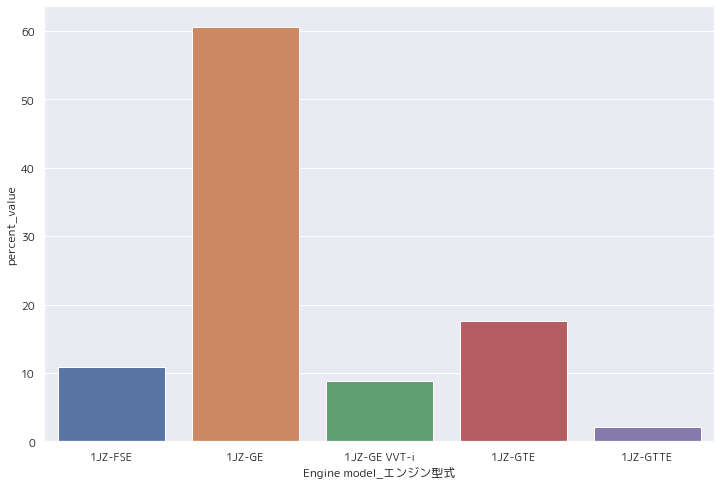

In [565]:
plt.figure(figsize=(12,8))
sns.barplot(x='Engine model_エンジン型式',y='percent_value',data=df_dt_em, ci= None)

# Engine Model = 1JZ-GE

In [566]:
df_1JZ_GE  = df_group.loc[('1JZ-GE')]
df_1JZ_GE['percent_value'] = round(df_1JZ_GE['revenue']/df_1JZ_GE['revenue'].sum()*100,2)
df_1JZ_GE

<ipython-input-566-774e08cbcd63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1JZ_GE['percent_value'] = round(df_1JZ_GE['revenue']/df_1JZ_GE['revenue'].sum()*100,2)


revenue  count  \
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                    
FR                2WD               AT    0                162500.0      5   
                                          1999             346000.0     15   
                                          2000             915000.0     28   
                                          2001             449000.0     16   
                                          2002              30000.0      1   
                                          2003              28000.0      1   

                                                           percent_value  
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                 
FR                2WD               AT    0                         8.42  
                                          1999                     17.92  
                                          2000                     47.40  
                                          2001                     23.26  
                                          2002                      1.55  
                                          2003                      1.45

<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

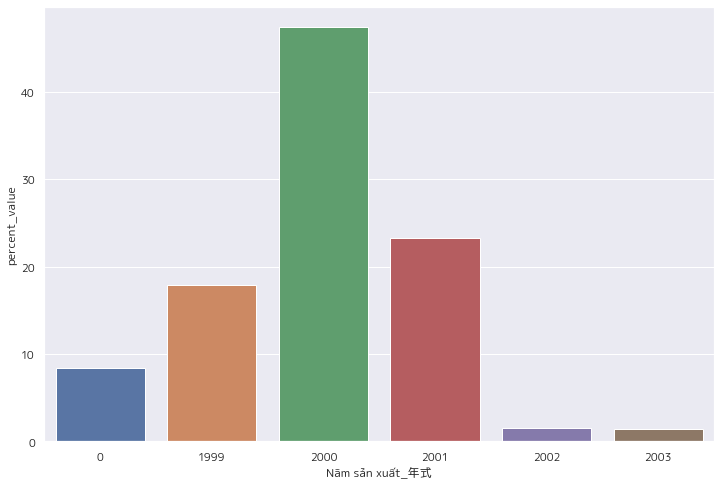

In [567]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_1JZ_GE.reset_index(), ci= None)

# Engine model = 1JZ-GTE

In [568]:
df_1JZ_GTE  = df_group.loc[('1JZ-GTE')]
df_1JZ_GTE['percent_value'] = round(df_1JZ_GTE['revenue']/df_1JZ_GTE['revenue'].sum()*100,2)
df_1JZ_GTE

<ipython-input-568-8d205f588d04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1JZ_GTE['percent_value'] = round(df_1JZ_GTE['revenue']/df_1JZ_GTE['revenue'].sum()*100,2)


revenue  count  \
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                    
FR                2WD               AT    1999             170000.0      2   
                                          2000              55000.0      1   
                                          2002             335000.0      4   

                                                           percent_value  
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                 
FR                2WD               AT    1999                     30.36  
                                          2000                      9.82  
                                          2002                     59.82

<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

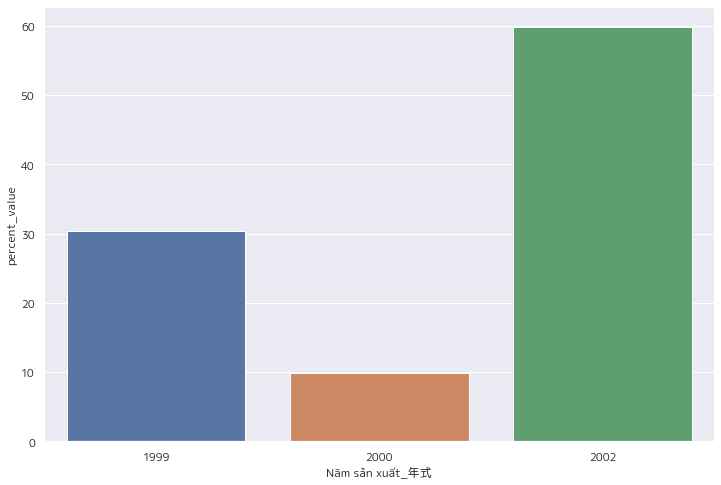

In [569]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_1JZ_GTE.reset_index(), ci= None)

# Engine model  = 1JZ-FSE

In [570]:
df_1JZ_FSE  = df_group.loc[('1JZ-FSE')]
df_1JZ_FSE['percent_value'] = round(df_1JZ_FSE['revenue']/df_1JZ_FSE['revenue'].sum()*100,2)
df_1JZ_FSE

<ipython-input-570-a552a4c1f0b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1JZ_FSE['percent_value'] = round(df_1JZ_FSE['revenue']/df_1JZ_FSE['revenue'].sum()*100,2)


revenue  count  \
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                    
FR                2WD               AT    0                  8000.0      1   
                                          1999              28000.0      1   
                                          2001             136000.0      5   
                                          2002             141000.0      5   
                                          2003              35000.0      1   

                                                           percent_value  
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                 
FR                2WD               AT    0                         2.30  
                                          1999                      8.05  
                                          2001                     39.08  
                                          2002                     40.52  
                                          2003                     10.06

<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

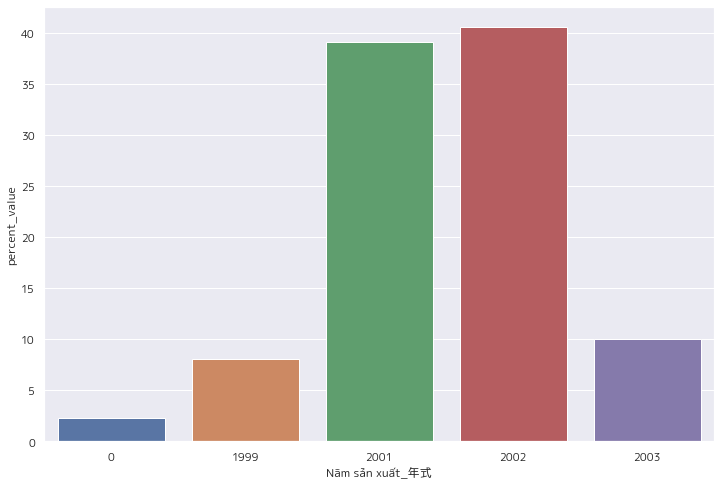

In [571]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_1JZ_FSE.reset_index(), ci= None)

# Engine model  = 1JZ-GE VVT-i

In [572]:
df_1JZ_G_VVT_i  = df_group.loc[('1JZ-GE VVT-i')]
df_1JZ_G_VVT_i['percent_value'] = round(df_1JZ_G_VVT_i['revenue']/df_1JZ_G_VVT_i['revenue'].sum()*100,2)
df_1JZ_G_VVT_i

<ipython-input-572-86844f76be39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1JZ_G_VVT_i['percent_value'] = round(df_1JZ_G_VVT_i['revenue']/df_1JZ_G_VVT_i['revenue'].sum()*100,2)


revenue  count  \
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                    
FR                2WD               AT    2000             253000.0      9   
                                          2001              30000.0      1   

                                                           percent_value  
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                 
FR                2WD               AT    2000                      89.4  
                                          2001                      10.6

<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

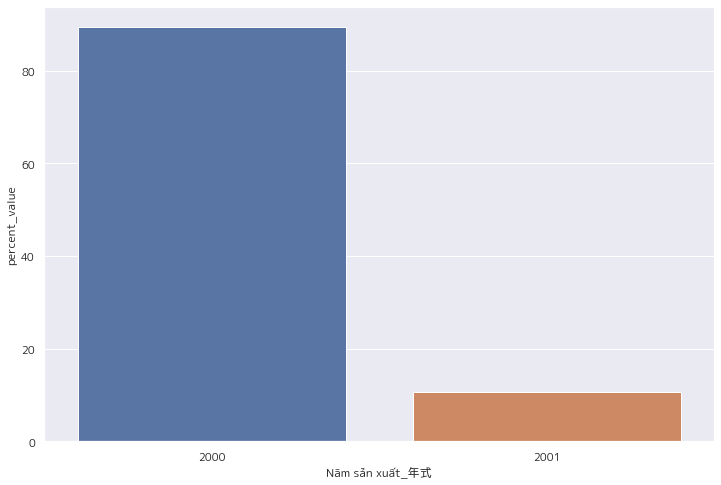

In [573]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_1JZ_G_VVT_i.reset_index(), ci= None)

# Model xe = JZS155

In [574]:
df_JZS155 = df_ｸﾗｳﾝ[df_ｸﾗｳﾝ['Model xe_車輌型式'] == 'JZS155']
for col in df_JZS155.columns:
    print(str(col) + ": "+str(df_JZS155[col].unique()))

Tên xe_車名: ['ｸﾗｳﾝ']
Model xe_車輌型式: ['JZS155']
Engine model_エンジン型式: ['2JZ-GE']
Truyền động 1_駆動1: ['FR' 'FF']
Truyền động 2_駆動2: ['2WD']
TM_TM: ['AT']
Năm sản xuất_年式: [1996 1998 2000 1995 1999 1997]
D/G_Ｄ／Ｇ: ['G']
Thành tích bán ra_販売実績: [ 35000.  45000.  25000.  40000.  38000.  10000.  28000.  50000.  55000.
   8000.  30000.  75000.  12000.  65000. 140000. 150000.]


In [575]:
df_group = df_JZS155.groupby(['Engine model_エンジン型式','Truyền động 1_駆動1','Truyền động 2_駆動2','TM_TM','Năm sản xuất_年式']).agg(revenue = ('Thành tích bán ra_販売実績', 'sum'),count = ('Engine model_エンジン型式','count'))
df_group

revenue  \
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式             
2JZ-GE              FF                2WD               AT    1997              25000.0   
                    FR                2WD               AT    1995             428000.0   
                                                              1996             321000.0   
                                                              1997             509000.0   
                                                              1998             950000.0   
                                                              1999             277000.0   
                                                              2000             108000.0   

                                                                               count  
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式         
2JZ-GE              FF                2WD               AT    1997                 1  
                    FR                2WD               AT    1995                 8  
                                                              1996                10  
                                                              1997                13  
                                                              1998                25  
                                                              1999                 7  
                                                              2000                 3

In [576]:
df_td1 = df_group.groupby(['Truyền động 1_駆動1'])['revenue','count'].sum()
df_td1['percent_value'] = round(df_td1['revenue']/df_td1['revenue'].sum()*100,2)
df_td1

<ipython-input-576-0c53d7bfd59a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_td1 = df_group.groupby(['Truyền động 1_駆動1'])['revenue','count'].sum()


,revenue,count,percent_value
Truyền động 1_駆動1,,,
FF,25000.0,1,0.95
FR,2593000.0,66,99.05


<AxesSubplot:xlabel='Truyền động 1_駆動1', ylabel='percent_value'>

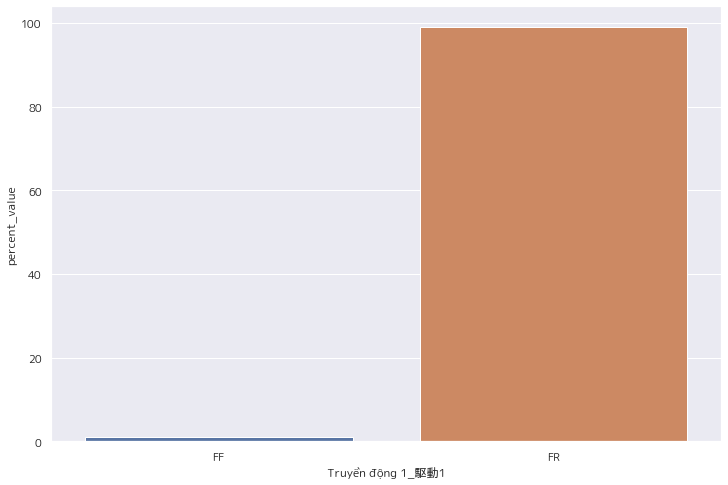

In [577]:
plt.figure(figsize=(12,8))
sns.barplot(x='Truyền động 1_駆動1',y='percent_value',data=df_td1.reset_index(), ci= None)

In [578]:
df_FR = df_group.loc[('2JZ-GE','FR')]
df_FR['percent_value'] = round(df_FR['revenue']/df_FR['revenue'].sum()*100,2)
df_FR

<ipython-input-578-c81057e3cec8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FR['percent_value'] = round(df_FR['revenue']/df_FR['revenue'].sum()*100,2)


revenue  count  percent_value
Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                                
2WD               AT    1995             428000.0      8          16.51
                        1996             321000.0     10          12.38
                        1997             509000.0     13          19.63
                        1998             950000.0     25          36.64
                        1999             277000.0      7          10.68
                        2000             108000.0      3           4.17

<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

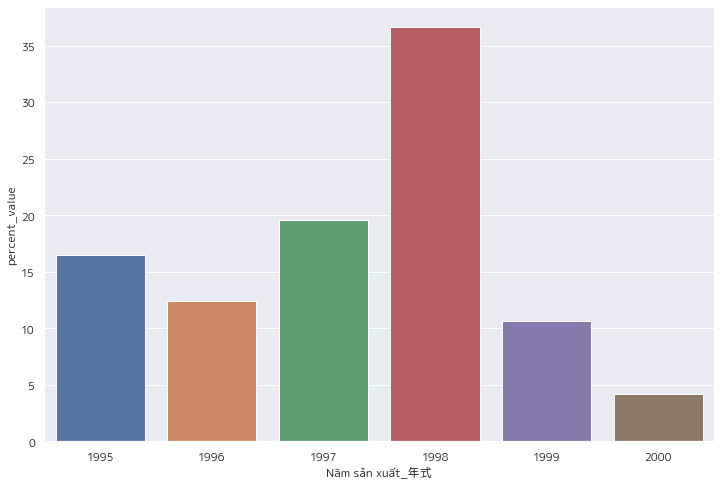

In [579]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_FR.reset_index(), ci= None)

# Tên xe  = マークII

In [580]:
df_マークII = df_spec[df_spec['Tên xe_車名'] == 'マークII']
df_マークII.nunique()

Tên xe_車名                  1
Model xe_車輌型式             16
Engine model_エンジン型式       11
Truyền động 1_駆動1          3
Truyền động 2_駆動2          4
TM_TM                      4
Năm sản xuất_年式           22
D/G_Ｄ／Ｇ                    3
Thành tích bán ra_販売実績    48
dtype: int64

In [581]:
for col in df_マークII.columns:
    print(str(col) + ": "+str(df_マークII[col].unique()))

Tên xe_車名: ['マークII']
Model xe_車輌型式: ['LX90' 'JZX110' 'GX100' 'GX110' 'GX90' 'JZX93' 'JZX115' 'JZX100' 'GX81'
 'JZX90' 'JZX101' 'GX105' 'JZX105' 'GX115' 'GX70' 'SX90']
Engine model_エンジン型式: ['2LII-TE' '1JZ-FSE' '1G-FE' '1G-EU' '1JZ-GE' '1JZ-GE VVT-i' '1G-GE'
 '2JZ-GE' '1JZ-GTE' '1G-GZE' '4S-FE']
Truyền động 1_駆動1: ['FR' 'FF' 'W/O']
Truyền động 2_駆動2: ['2WD' '4WD' 'W/O' 0]
TM_TM: ['AT' 'W/O' 'MT' 0]
Năm sản xuất_年式: [ 1994  2002  1996  2001  1999  1998  1995  2000  1997  1992     0  1993
  2004  2003  1991  2007  1988  2005  2011  2006 20000  1990]
D/G_Ｄ／Ｇ: ['D' 'G' 0]
Thành tích bán ra_販売実績: [110000.  35000.  28000. 100000.  30000.  10000.  25000.  13000.  40000.
   9000.  55000.  20000.  12000.  45000. 126000.  50000. 170000. 140000.
   8000. 120000.  95000.  27500. 132000. 146150. 152800.  77300.  14000.
  39500. 158000.  38000.  70000. 115000. 130000.  85000.  60000.  75000.
  18574.  80000. 160000. 162000.  32000.  23000.  24000. 105000.  26000.
 150000.  22000.   3000.]


<ipython-input-582-a62e91451001>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 60)
<ipython-input-582-a62e91451001>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 60)
<ipython-input-582-a62e91451001>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  r.set_yticklabels(r.get_yticks(),size =60)


Text(0.5, 0, 'Model xe_車輌型式')

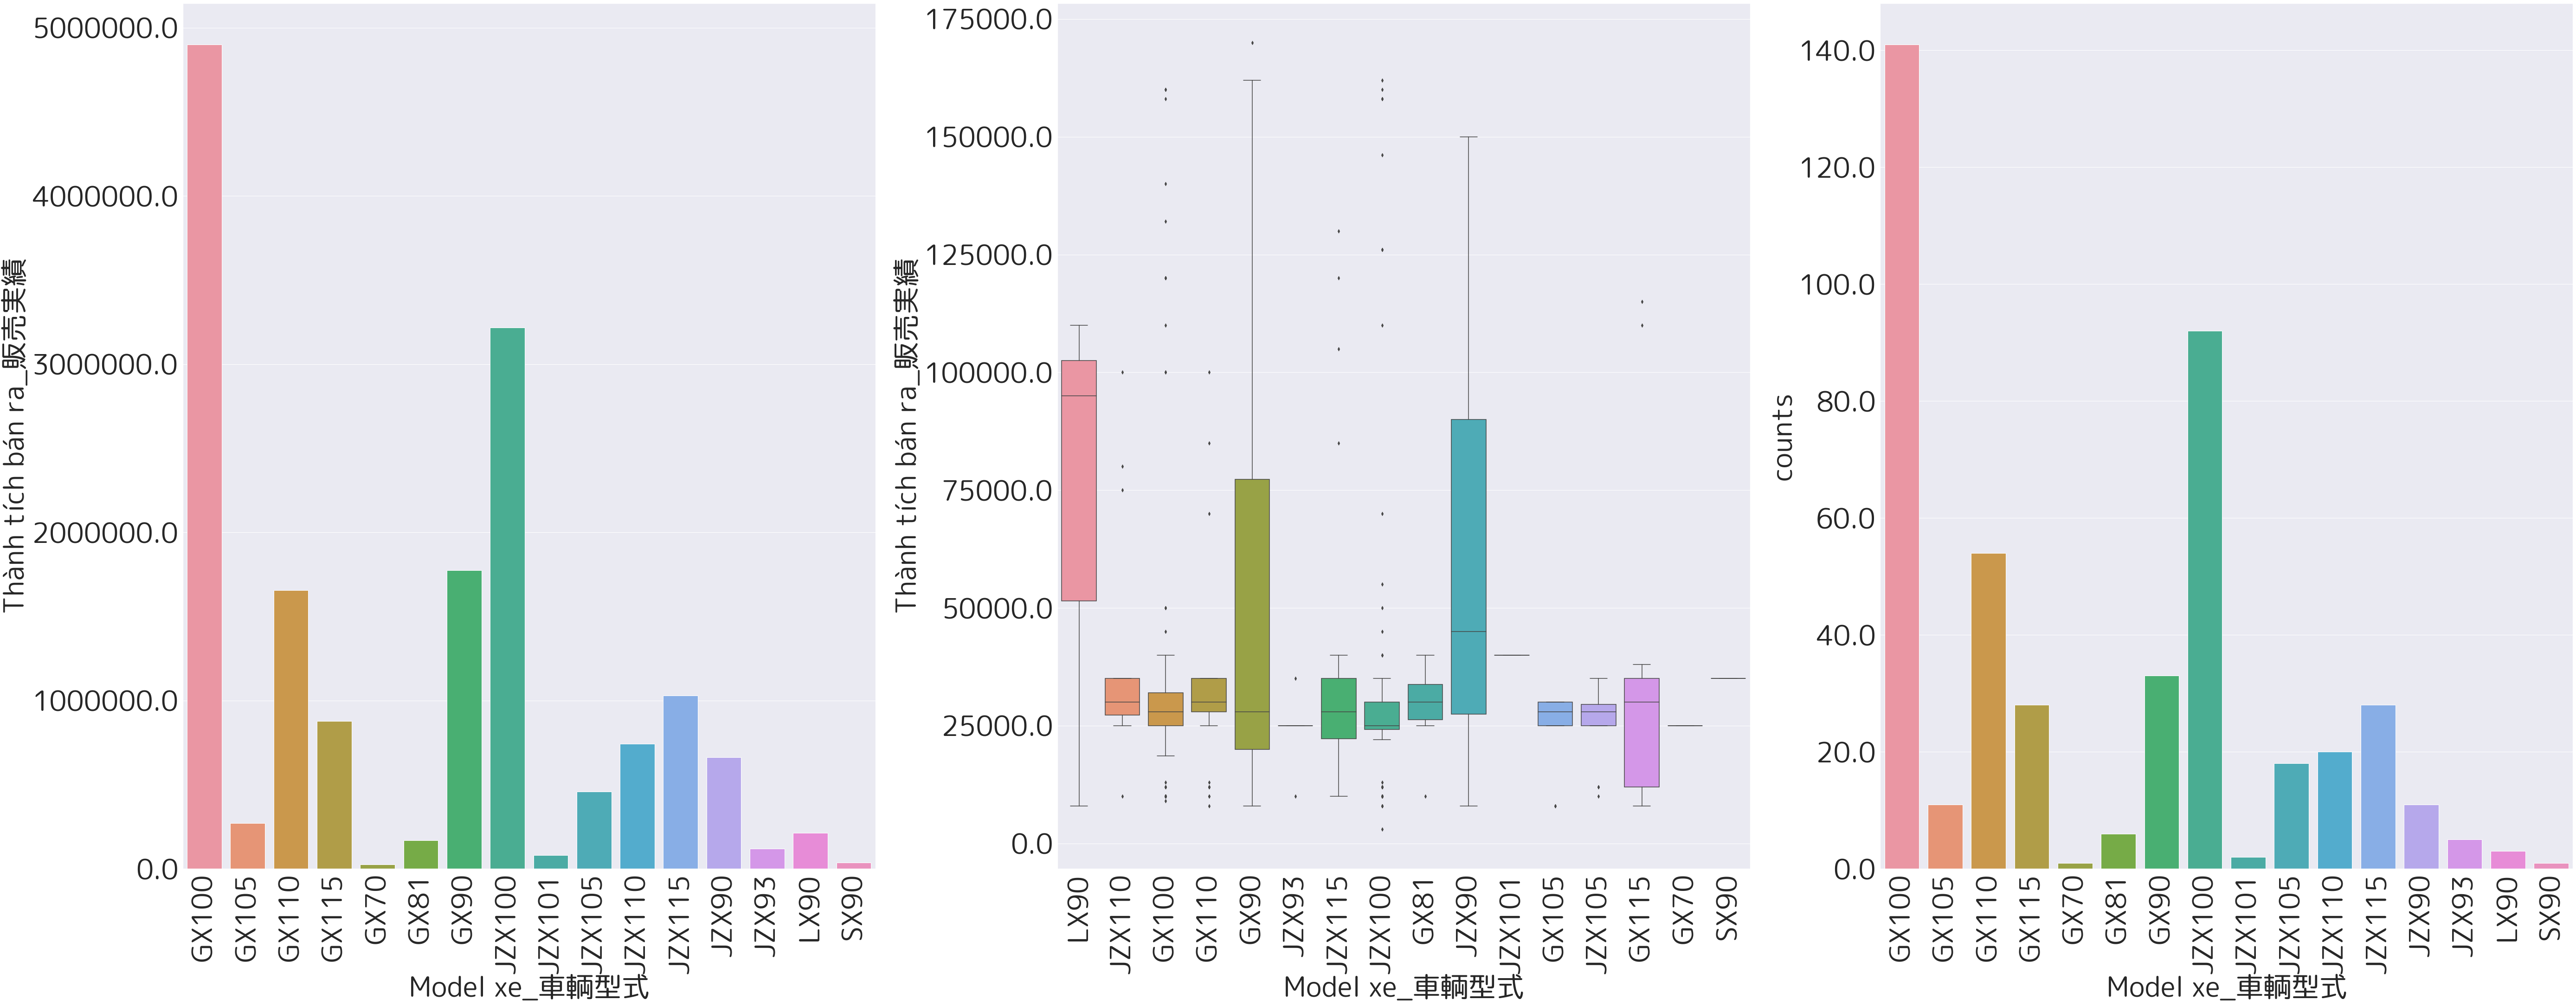

In [582]:
count_model =df_マークII.groupby(['Model xe_車輌型式'])['Model xe_車輌型式'].count().reset_index(name='counts')
sum_model = df_マークII.groupby(['Model xe_車輌型式'])['Thành tích bán ra_販売実績'].sum().reset_index(name='sum')
fig, axs = plt.subplots(1, 3, sharex=False, figsize=(77, 30),constrained_layout=True)
p = sns.barplot(x='Model xe_車輌型式',y='sum',data=sum_model,ax=axs[0],ci=None)
q = sns.boxplot(x='Model xe_車輌型式',y='Thành tích bán ra_販売実績',data=df_マークII,ax=axs[1])
r = sns.barplot(x='Model xe_車輌型式',y='counts',data=count_model,ax=axs[2],ci=None)
p.set_xticklabels(p.get_xticklabels(),size =60,rotation=90)
q.set_xticklabels(q.get_xticklabels(),size =60,rotation=90)
r.set_xticklabels(r.get_xticklabels(),size =60,rotation=90)
p.set_yticklabels(p.get_yticks(), size = 60)
q.set_yticklabels(q.get_yticks(), size = 60)
r.set_yticklabels(r.get_yticks(),size =60)
p.set_ylabel("Thành tích bán ra_販売実績",fontsize = 60)
q.set_ylabel("Thành tích bán ra_販売実績",fontsize = 60)
r.set_ylabel("counts",fontsize = 60)
p.set_xlabel("Model xe_車輌型式",fontsize = 60)
q.set_xlabel("Model xe_車輌型式",fontsize = 60)
r.set_xlabel("Model xe_車輌型式",fontsize = 60)

# Model xe = GX100

In [583]:
df_GX100 = df_マークII[df_マークII['Model xe_車輌型式'] == 'GX100']
for col in df_GX100.columns:
    print(str(col) + ": "+str(df_GX100[col].unique()))

Tên xe_車名: ['マークII']
Model xe_車輌型式: ['GX100']
Engine model_エンジン型式: ['1G-FE' '1G-EU']
Truyền động 1_駆動1: ['FR' 'FF']
Truyền động 2_駆動2: ['2WD']
TM_TM: ['AT' 'MT']
Năm sản xuất_年式: [1996 1999 1998 2000 1997    0]
D/G_Ｄ／Ｇ: ['G' 0]
Thành tích bán ra_販売実績: [ 28000.  30000.  10000.  25000.  20000.  12000.  45000. 110000.  35000.
  50000. 140000. 132000. 120000.  40000. 100000.   9000.  13000.  18574.
 158000. 160000.  32000.  23000.  24000.  26000.]


In [584]:
df_group = df_GX100.groupby(['Engine model_エンジン型式','Truyền động 1_駆動1','Truyền động 2_駆動2','TM_TM','D/G_Ｄ／Ｇ',
                             
                             'Năm sản xuất_年式']).agg(revenue = ('Thành tích bán ra_販売実績', 'sum'),count = ('Engine model_エンジン型式','count'))
df_group

revenue  \
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM D/G_Ｄ／Ｇ Năm sản xuất_年式              
1G-EU               FR                2WD               AT    G       1998               28000.0   
                                                                      1999               30000.0   
1G-FE               FF                2WD               AT    G       1998               28000.0   
                                                                      2000              135000.0   
                    FR                2WD               AT    0       1998               28000.0   
                                                              G       0                  10000.0   
                                                                      1996              860000.0   
                                                                      1997              805000.0   
                                                                      1998             1160000.0   
                                                                      1999             1028574.0   
                                                                      2000              754000.0   
                                                        MT    G       1999               35000.0   

                                                                                       count  
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM D/G_Ｄ／Ｇ Năm sản xuất_年式         
1G-EU               FR                2WD               AT    G       1998                 1  
                                                                      1999                 1  
1G-FE               FF                2WD               AT    G       1998                 1  
                                                                      2000                 2  
                    FR                2WD               AT    0       1998                 1  
                                                              G       0                    1  
                                                                      1996                19  
                                                                      1997                19  
                                                                      1998                35  
                                                                      1999                36  
                                                                      2000                24  
                                                        MT    G       1999                 1

In [585]:
df_em = df_group.groupby(['Engine model_エンジン型式'])['revenue','count'].sum()
df_em['percent_value'] = round(df_em['revenue']/df_em['revenue'].sum()*100,2)
df_em

<ipython-input-585-96f3e04d7bec>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_em = df_group.groupby(['Engine model_エンジン型式'])['revenue','count'].sum()


,revenue,count,percent_value
Engine model_エンジン型式,,,
1G-EU,58000.0,2,1.18
1G-FE,4843574.0,139,98.82


<AxesSubplot:xlabel='Engine model_エンジン型式', ylabel='percent_value'>

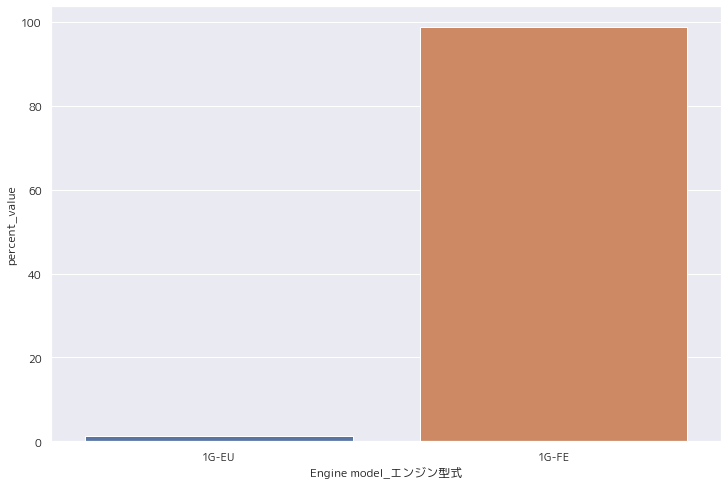

In [586]:
plt.figure(figsize=(12,8))
sns.barplot(x='Engine model_エンジン型式',y='percent_value',data=df_em.reset_index(), ci= None)

In [587]:
df_1G_FE = df_group.loc[('1G-FE')]
df_1G_FE['percent_value'] = round(df_1G_FE['revenue']/df_1G_FE['revenue'].sum()*100,2)
df_1G_FE

<ipython-input-587-da07402eb7b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1G_FE['percent_value'] = round(df_1G_FE['revenue']/df_1G_FE['revenue'].sum()*100,2)


revenue  \
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM D/G_Ｄ／Ｇ Năm sản xuất_年式              
FF                2WD               AT    G       1998               28000.0   
                                                  2000              135000.0   
FR                2WD               AT    0       1998               28000.0   
                                          G       0                  10000.0   
                                                  1996              860000.0   
                                                  1997              805000.0   
                                                  1998             1160000.0   
                                                  1999             1028574.0   
                                                  2000              754000.0   
                                    MT    G       1999               35000.0   

                                                                   count  \
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM D/G_Ｄ／Ｇ Năm sản xuất_年式          
FF                2WD               AT    G       1998                 1   
                                                  2000                 2   
FR                2WD               AT    0       1998                 1   
                                          G       0                    1   
                                                  1996                19   
                                                  1997                19   
                                                  1998                35   
                                                  1999                36   
                                                  2000                24   
                                    MT    G       1999                 1   

                                                                   percent_value  
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM D/G_Ｄ／Ｇ Năm sản xuất_年式                 
FF                2WD               AT    G       1998                      0.58  
                                                  2000                      2.79  
FR                2WD               AT    0       1998                      0.58  
                                          G       0                         0.21  
                                                  1996                     17.76  
                                                  1997                     16.62  
                                                  1998                     23.95  
                                                  1999                     21.24  
                                                  2000                     15.57  
                                    MT    G       1999                      0.72

In [588]:
df_AT = df_1G_FE.groupby(['Truyền động 1_駆動1'])['revenue','count'].sum()
df_AT['percent_value'] = round(df_AT['revenue']/df_AT['revenue'].sum()*100,2)
df_AT

<ipython-input-588-76340f1c387c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_AT = df_1G_FE.groupby(['Truyền động 1_駆動1'])['revenue','count'].sum()


,revenue,count,percent_value
Truyền động 1_駆動1,,,
FF,163000.0,3,3.37
FR,4680574.0,136,96.63


<AxesSubplot:xlabel='Truyền động 1_駆動1', ylabel='percent_value'>

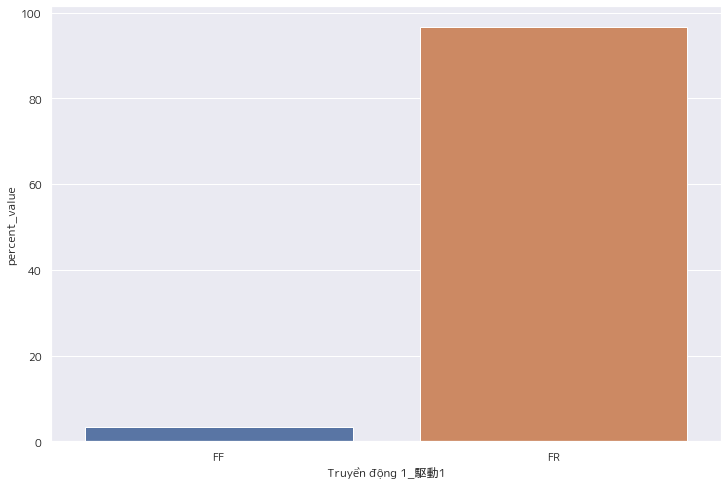

In [589]:
plt.figure(figsize=(12,8))
sns.barplot(x='Truyền động 1_駆動1',y='percent_value',data=df_AT.reset_index(), ci= None)

<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

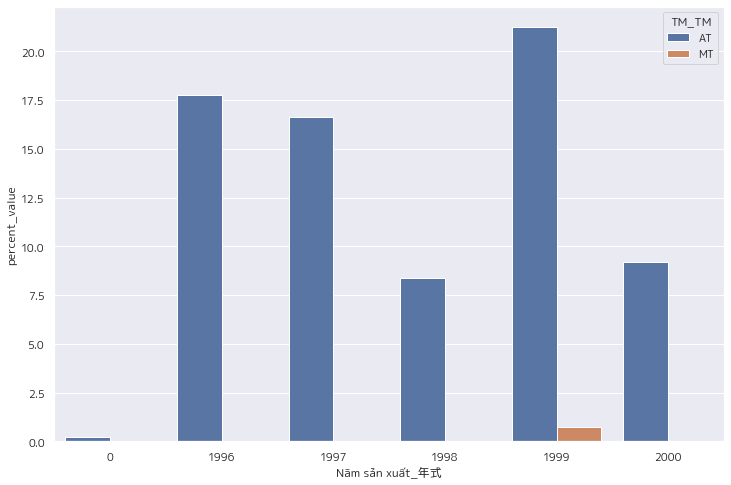

In [590]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',hue = 'TM_TM',data=df_1G_FE.reset_index(), ci= None)

# Model xe = JZX100

In [591]:
df_JZX100 = df_マークII[df_マークII['Model xe_車輌型式'] == 'JZX100']
for col in df_JZX100.columns:
    print(str(col) + ": "+str(df_JZX100[col].unique()))

Tên xe_車名: ['マークII']
Model xe_車輌型式: ['JZX100']
Engine model_エンジン型式: ['1JZ-GE VVT-i' '1JZ-GE' '1JZ-GTE']
Truyền động 1_駆動1: ['FR']
Truyền động 2_駆動2: ['2WD']
TM_TM: ['AT']
Năm sản xuất_年式: [1997 1999 1996 1998 2000]
D/G_Ｄ／Ｇ: ['G']
Thành tích bán ra_販売実績: [ 25000.  13000.  10000.  28000.  30000.  35000.  12000.  40000. 126000.
   8000. 146150.  50000. 158000.  55000.  70000. 110000.  45000. 162000.
 160000.  22000.   3000.]


In [592]:
df_group = df_JZX100.groupby(['Engine model_エンジン型式','Truyền động 1_駆動1','Truyền động 2_駆動2','TM_TM','Năm sản xuất_年式']).agg(revenue = ('Thành tích bán ra_販売実績', 'sum'),count = ('Engine model_エンジン型式','count'))
df_group

revenue  \
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式             
1JZ-GE              FR                2WD               AT    1996             283000.0   
                                                              1997             539000.0   
                                                              1998             404000.0   
                                                              1999              47000.0   
                                                              2000              22000.0   
1JZ-GE VVT-i        FR                2WD               AT    1996             642000.0   
                                                              1997             467150.0   
                                                              1998             173000.0   
                                                              1999             401000.0   
                                                              2000              60000.0   
1JZ-GTE             FR                2WD               AT    1996             180000.0   

                                                                               count  
Engine model_エンジン型式 Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式         
1JZ-GE              FR                2WD               AT    1996                 6  
                                                              1997                17  
                                                              1998                11  
                                                              1999                 3  
                                                              2000                 1  
1JZ-GE VVT-i        FR                2WD               AT    1996                16  
                                                              1997                13  
                                                              1998                 6  
                                                              1999                14  
                                                              2000                 3  
1JZ-GTE             FR                2WD               AT    1996                 2

In [593]:
df_em = df_group.groupby(['Engine model_エンジン型式'])['revenue','count'].sum().reset_index()
df_em['percent_value'] = round(df_em['revenue']/df_em['revenue'].sum()*100,2)
df_em

<ipython-input-593-4f0fdf3d4c81>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_em = df_group.groupby(['Engine model_エンジン型式'])['revenue','count'].sum().reset_index()


,Engine model_エンジン型式,revenue,count,percent_value
0,1JZ-GE,1295000.0,38,40.24
1,1JZ-GE VVT-i,1743150.0,52,54.17
2,1JZ-GTE,180000.0,2,5.59


<AxesSubplot:xlabel='Engine model_エンジン型式', ylabel='percent_value'>

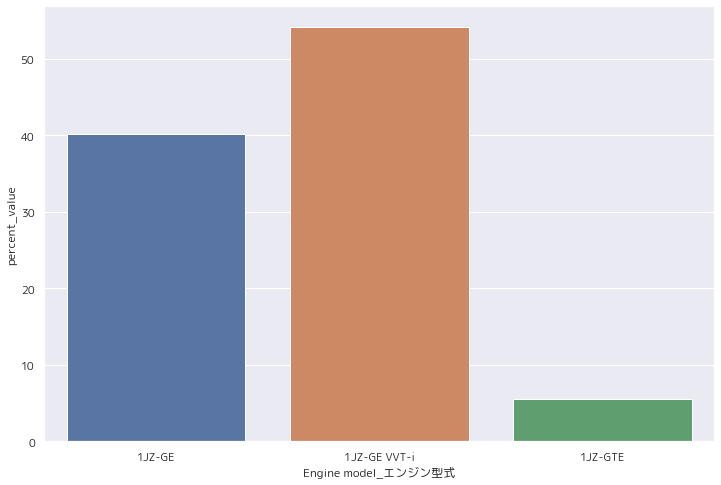

In [594]:
plt.figure(figsize=(12,8))
sns.barplot(x='Engine model_エンジン型式',y='percent_value',data=df_em, ci= None)

# Engine model = 1JZ-GE

In [595]:
df_1JZ_GE = df_group.loc[('1JZ-GE')]
df_1JZ_GE['percent_value'] = round(df_1JZ_GE['revenue']/df_1JZ_GE['revenue'].sum()*100,2)
df_1JZ_GE

<ipython-input-595-fee3a68b6b1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1JZ_GE['percent_value'] = round(df_1JZ_GE['revenue']/df_1JZ_GE['revenue'].sum()*100,2)


revenue  count  \
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                    
FR                2WD               AT    1996             283000.0      6   
                                          1997             539000.0     17   
                                          1998             404000.0     11   
                                          1999              47000.0      3   
                                          2000              22000.0      1   

                                                           percent_value  
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                 
FR                2WD               AT    1996                     21.85  
                                          1997                     41.62  
                                          1998                     31.20  
                                          1999                      3.63  
                                          2000                      1.70

<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

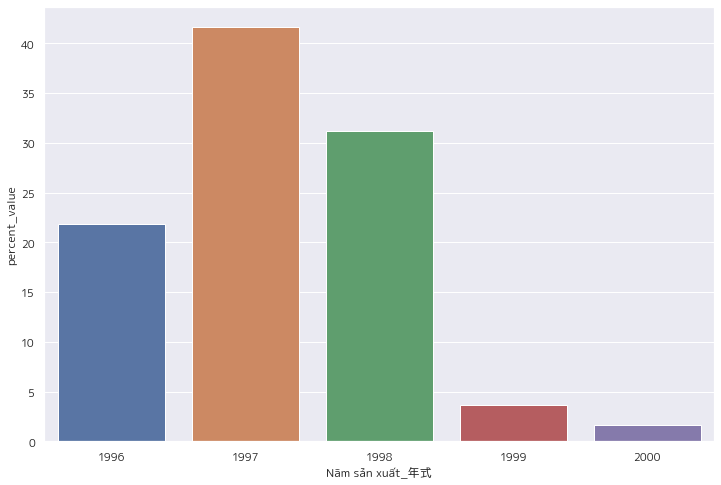

In [596]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_1JZ_GE.reset_index(), ci= None)

# Engine model = 1JZ-GE VVT-i

In [597]:
df_1JZ_GE_VVT_i = df_group.loc[('1JZ-GE VVT-i')]
df_1JZ_GE_VVT_i['percent_value'] = round(df_1JZ_GE_VVT_i['revenue']/df_1JZ_GE_VVT_i['revenue'].sum()*100,2)
df_1JZ_GE_VVT_i

<ipython-input-597-657f6d895f58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1JZ_GE_VVT_i['percent_value'] = round(df_1JZ_GE_VVT_i['revenue']/df_1JZ_GE_VVT_i['revenue'].sum()*100,2)


revenue  count  \
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                    
FR                2WD               AT    1996             642000.0     16   
                                          1997             467150.0     13   
                                          1998             173000.0      6   
                                          1999             401000.0     14   
                                          2000              60000.0      3   

                                                           percent_value  
Truyền động 1_駆動1 Truyền động 2_駆動2 TM_TM Năm sản xuất_年式                 
FR                2WD               AT    1996                     36.83  
                                          1997                     26.80  
                                          1998                      9.92  
                                          1999                     23.00  
                                          2000                      3.44

<AxesSubplot:xlabel='Năm sản xuất_年式', ylabel='percent_value'>

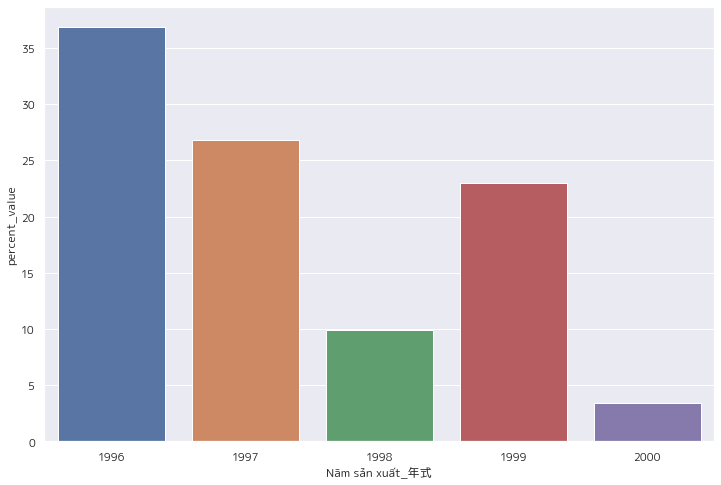

In [598]:
plt.figure(figsize=(12,8))
sns.barplot(x='Năm sản xuất_年式',y='percent_value',data=df_1JZ_GE_VVT_i.reset_index(), ci= None)